In [1]:
import geopandas as gpd
from tqdm import tqdm
import libpysal as lp
import json
import pandas as pd
from matplotlib.patches import Patch  # used for the plot legends later

###  Get the data in the folder ./LCPS_data for pre-processing. Let's call this `retrieved data`.

In [2]:
def retrieve_data(sy):
    """
    Retrieve data for a given school year (sy)
    """
    data_dir = "./LCPS_data"
    # Read the data files
    schools = gpd.read_file('{}/LCPS_Sites_{}.shp'.format(data_dir, sy))
    students = gpd.read_file('{}/Students_{}.shp'.format(data_dir, sy))
    spas = gpd.read_file('{}/PlanningZones_{}.shp'.format(data_dir, sy))
    
    return schools, students, spas


In [3]:
sy = '2017_2018'

In [4]:
# raw_schools, raw_students, raw_spas = retrieve_data(sy)

###  Get the processed data from the folder ./data

In [5]:
#spas_processed = gpd.read_file('new_SPAs_2017_2018.json', driver='GeoJSON')
spas = gpd.read_file('./data/new_SPAs_2017_2018.json', driver='GeoJSON')
students = gpd.read_file('./data/new_Students_2017_2018.json', driver='GeoJSON')
schools = gpd.read_file('./data/new_Schools_2017_2018.json', driver='GeoJSON')




#new line to run the newly downloaded json files, should move around anywhere.
#new line to run the newly downloaded json files, should move around anywhere.

In [6]:
#students.head()
#schools.head()
spas.head()

#uncomment the one you want to see

,OBJECTID,COUNT_,SPA,ELEM_,INT_,HIGH_,ELEM_CODE,MID_CODE,HIGH_CODE,DISTRICT,...,HIGH_POP_N,HIGH_POP_P,TOT_POP_A,TOT_POP_W,TOT_POP_M2,TOT_POP_B,TOT_POP_H,TOT_POP_N,TOT_POP_P,geometry
0,1,5.0,WL03.4,126,205,311,LOV,HRM,WHS,WL,...,0,0,1,37,0,2,7,0,0,"POLYGON ((11725868.086 7152149.054, 11725870.6..."
1,2,5.0,WL03,126,205,311,LOV,HRM,WHS,WL,...,0,0,0,83,5,0,6,1,0,"POLYGON ((11726805.147 7160565.439, 11726826.6..."
2,3,5.0,WL27.2,118,202,305,HAM,BRM,LVH,WL,...,0,0,0,11,0,1,5,0,0,"POLYGON ((11720159.464 7099502.139, 11720172.1..."
3,4,5.0,WL32.1,132,205,311,MTV,HRM,WHS,WL,...,0,0,8,205,14,8,23,1,0,"POLYGON ((11694466.485 7097608.657, 11694418.5..."
4,5,5.0,WL02,126,205,311,LOV,HRM,WHS,WL,...,0,0,9,170,3,0,5,0,0,"POLYGON ((11715899.154 7166497.655, 11715932.1..."


### Initial Heat (Chloropeth) Maps of Ethnic Populations

In [7]:
# grade='TOT'
# cols = ['TOT_POP_A' , 'TOT_POP_W' , 'TOT_POP_M2' ,
#              'TOT_POP_B' , 'TOT_POP_H' , 'TOT_POP_N' , 'TOT_POP_P', 'TOT_POP']
# spas_heatmap = spas.loc[:, ['TOT_POP_A' , 'TOT_POP_W' , 'TOT_POP_M2' ,
#              'TOT_POP_B' , 'TOT_POP_H' , 'TOT_POP_N' , 'TOT_POP_P', 'TOT_POP', 'geometry']]
# spas_heatmap.loc[:, cols] = spas_heatmap.loc[:, cols].div(spas_heatmap.TOT_POP, axis=0)
# spas_heatmap.replace(float('NaN'), 0, inplace=True)
# spas_heatmap

In [8]:
total_asians = 'TOT_POP_A'
total_whites = 'TOT_POP_W'
total_blacks = 'TOT_POP_B'
total_mixed = 'TOT_POP_M2'
total_hispanics = 'TOT_POP_H'
total_natives = 'TOT_POP_N'
total_pacifics = 'TOT_POP_P'
total_non_whites = 'TOT_POP_NW'

cols = [total_asians, total_whites, total_blacks, total_mixed, total_hispanics, total_natives, total_pacifics]
spas_heatmap = spas.loc[:, [total_asians, total_whites, total_blacks, total_mixed, total_hispanics, total_natives, total_pacifics, 'TOT_POP', 'geometry']]
spas_heatmap.loc[:, cols] = spas_heatmap.loc[:, cols].div(spas_heatmap.TOT_POP, axis=0)
spas_heatmap.replace(float('NaN'), 0, inplace=True)

spas_heatmap.loc[:, total_non_whites] = spas_heatmap.loc[:, total_asians] +  spas_heatmap.loc[:,total_blacks] +  spas_heatmap.loc[:,total_mixed] \
                            + spas_heatmap.loc[:,total_hispanics] + spas_heatmap.loc[:,total_natives] + spas_heatmap.loc[:,total_pacifics]
spas_heatmap.head()

,TOT_POP_A,TOT_POP_W,TOT_POP_B,TOT_POP_M2,TOT_POP_H,TOT_POP_N,TOT_POP_P,TOT_POP,geometry,TOT_POP_NW
0,0.021277,0.787234,0.042553,0.000000,0.148936,0.000000,0.0,47,"POLYGON ((11725868.086 7152149.054, 11725870.6...",0.212766
1,0.000000,0.873684,0.000000,0.052632,0.063158,0.010526,0.0,95,"POLYGON ((11726805.147 7160565.439, 11726826.6...",0.126316
2,0.000000,0.647059,0.058824,0.000000,0.294118,0.000000,0.0,17,"POLYGON ((11720159.464 7099502.139, 11720172.1...",0.352941
3,0.030888,0.791506,0.030888,0.054054,0.088803,0.003861,0.0,259,"POLYGON ((11694466.485 7097608.657, 11694418.5...",0.208494
4,0.048128,0.909091,0.000000,0.016043,0.026738,0.000000,0.0,187,"POLYGON ((11715899.154 7166497.655, 11715932.1...",0.090909


Text(0.5, 1, 'Whites')

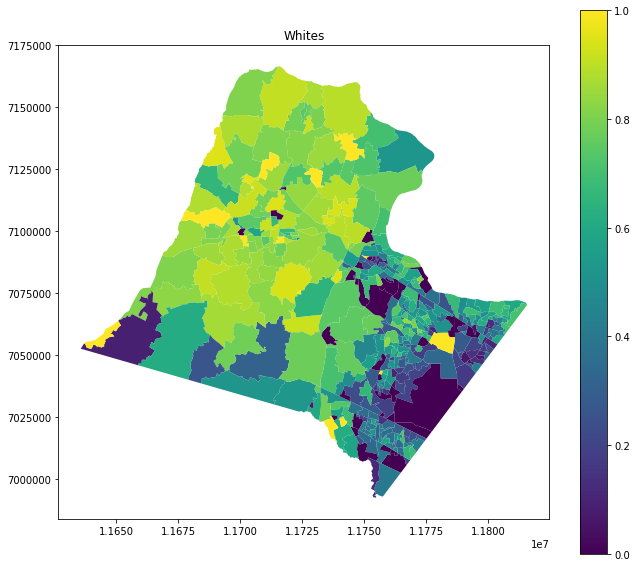

In [257]:
ax = spas_heatmap.plot(column=total_whites, legend=True, figsize=(11,10))
ax.set_title('Whites')

Text(0.5, 1, 'Non-Whites')

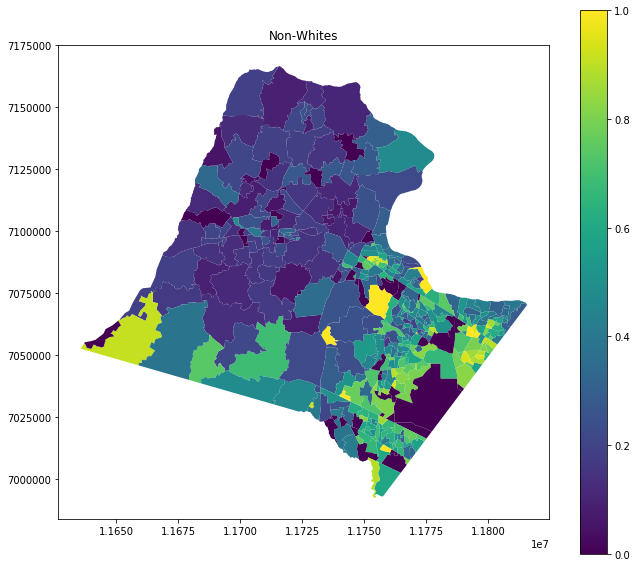

In [10]:
ax = spas_heatmap.plot(column=total_non_whites, legend=True, figsize=(11,10))
ax.set_title('Non-Whites')

## Analysis Using New SPAs Data

In [11]:
spas.keys()

Index(['OBJECTID', 'COUNT_', 'SPA', 'ELEM_', 'INT_', 'HIGH_', 'ELEM_CODE',
       'MID_CODE', 'HIGH_CODE', 'DISTRICT', 'UTILITIES', 'SHAPE_Leng',
       'SHAPE_Area', 'STDYAREA_1', 'DISTRICT_1', 'PLANNING_Z', 'ELEM', 'MID',
       'HIGH', 'UTILITIE_1', 'DISTRICT_2', 'MID_2018', 'HIGH_2018', 'PK', 'KG',
       'GR1', 'GR2', 'GR3', 'GR4', 'GR5', 'GR6', 'GR7', 'GR8', 'GR9', 'GR10',
       'GR11', 'GR12', 'TOTAL_KG_5', 'TOTAL_6_8', 'TOTAL_9_12', 'TOTAL_KG_1',
       'TOTAL_PK_1', 'ELEM_POP', 'MID_POP', 'HIGH_POP', 'TOT_POP',
       'ELEM_POP_A', 'ELEM_POP_W', 'ELEM_POP_M2', 'ELEM_POP_B', 'ELEM_POP_H',
       'ELEM_POP_N', 'ELEM_POP_P', 'MID_POP_A', 'MID_POP_W', 'MID_POP_M2',
       'MID_POP_B', 'MID_POP_H', 'MID_POP_N', 'MID_POP_P', 'HIGH_POP_A',
       'HIGH_POP_W', 'HIGH_POP_M2', 'HIGH_POP_B', 'HIGH_POP_H', 'HIGH_POP_N',
       'HIGH_POP_P', 'TOT_POP_A', 'TOT_POP_W', 'TOT_POP_M2', 'TOT_POP_B',
       'TOT_POP_H', 'TOT_POP_N', 'TOT_POP_P', 'geometry'],
      dtype='object')

In [12]:
# Choose possible grade level; ELEM, MID, HIGH for SPAs

grade = 'ELEM'
asians = '{}_POP_A'.format(grade)
whites = '{}_POP_W'.format(grade)
mixed = '{}_POP_M2'.format(grade)
blacks = '{}_POP_B'.format(grade)
hispanics = '{}_POP_H'.format(grade)
natives = '{}_POP_N'.format(grade)
pacifics = '{}_POP_P'.format(grade)
non_whites = '{}_POP_NW'.format(grade)


spas_ethnic = spas[['{}_CODE'.format(grade) , asians, whites, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade)]]
spas_ethnic.loc[:, non_whites] = spas_ethnic.loc[:, asians] +  spas_ethnic.loc[:,blacks] +  spas_ethnic.loc[:,mixed] \
                            + spas_ethnic.loc[:,hispanics] + spas_ethnic.loc[:,natives] + spas_ethnic.loc[:,pacifics]
spas_grouped_raw = spas_ethnic.groupby(['{}_CODE'.format(grade) ]).sum()
spas_grouped = spas_grouped_raw.div(spas_grouped_raw['{}_POP'.format(grade)], axis=0)
spas_grouped.drop([asians, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade)], axis='columns', inplace=True)
spas_grouped.head()

#when generalizing one place to change and use the FORMAT style

C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ELEM_POP_W,ELEM_POP_NW
ELEM_CODE,,
ALD,0.596939,0.403061
ALG,0.640177,0.359823
ARC,0.381497,0.618503
ASH,0.490939,0.509061
BAL,0.553398,0.446602


In [13]:
#NOTE: Run this only once or start from the previous cell on subsequent runs - since we use iterrows and create a new column, the calculated value will change on the next runs

import itertools

abs_diffs = []
for row in spas_grouped.iterrows():
#     print([val for val in itertools.permutations(row[1], 2)])
#     break
    diffs = [abs(val[1] - val[0]) for val in itertools.permutations(row[1], 2)]
    total = sum(diffs)/2
    abs_diffs.append(total)

spas_grouped.loc[:,'ABS_DIFF'] = abs_diffs
spas_grouped.head()
    
# def sumPairs(lst): 
      
#     diffs = []
#     for i, x in enumerate(lst):
#         for j, y in enumerate(lst):
#             if i != j: 
#                 diffs.append(abs(x-y))
              
#     return int(sum(diffs)/2)    

# def sumPairs(lst): 
#     diffs = [abs(e[1] - e[0]) for e in itertools.permutations(lst, 2)]
#     return int(sum(diffs)/2)


,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
ELEM_CODE,,,
ALD,0.596939,0.403061,0.193878
ALG,0.640177,0.359823,0.280353
ARC,0.381497,0.618503,0.237006
ASH,0.490939,0.509061,0.018122
BAL,0.553398,0.446602,0.106796


In [14]:
segregated_abs_diff = spas_grouped[spas_grouped['ABS_DIFF'] > 0.7]
segregated_abs_diff

#Absolute difference. For groups where absolute differences is greater than 70% we marked as outliers

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
ELEM_CODE,,,
GUI,0.079687,0.920312,0.840625
LIN,0.884211,0.115789,0.768421
SUG,0.135400,0.864600,0.729201
SUL,0.111111,0.888889,0.777778


In [15]:
ind_diss = 0.5 * sum(abs(spas_grouped[whites]/spas_grouped[whites].sum() - spas_grouped[non_whites]/spas_grouped[non_whites].sum()))
ind_diss

0.3092111479501929

In [16]:
from numpy import log

entropy = -(spas_grouped[non_whites]*log(spas_grouped[non_whites]) + spas_grouped[whites]*log(spas_grouped[whites]))
entropy.replace(float('NaN'),0, inplace=True)

spas_grouped.loc[:,'ENTROPY_IND'] = entropy

segregated_entropy = spas_grouped[spas_grouped['ENTROPY_IND'] < 0.4]
segregated_entropy

# The maximum value for the entropy index (ENTROPY_IND) is ln(k), or ln 2 = 0.69. ie. a comparison between whites and non-whites
# • Districts with higher values of ENTROPY_IND are more diverse.
# • A district with ENTROPY_IND = 0.69 would have equal proportions of all groups.
# • A district with ENTROPY_IND = 0 contains only a single group
# • A lower ENTROPY_IND value depicts more segregation

# The ENTROPY_IND is a more valid segregation index and it gives a better view of segregation than the upper extreme whiskers even though some of the 
#districts that came up on the box plot coincided with that of the ENTROPY_IND.
# The ENTROPY_IND is for multiple criteria but because of the proportion of the pacific islanders which were almost insignificant and kept giving 
# making the ENTROPY_IND 0, making the necessary adjustment and treating whites and non-whites made more sense.

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF,ENTROPY_IND
ELEM_CODE,,,,
GUI,0.079687,0.920312,0.840625,0.278005
LIN,0.884211,0.115789,0.768421,0.358451
SUG,0.135400,0.864600,0.729201,0.396524
SUL,0.111111,0.888889,0.777778,0.348832


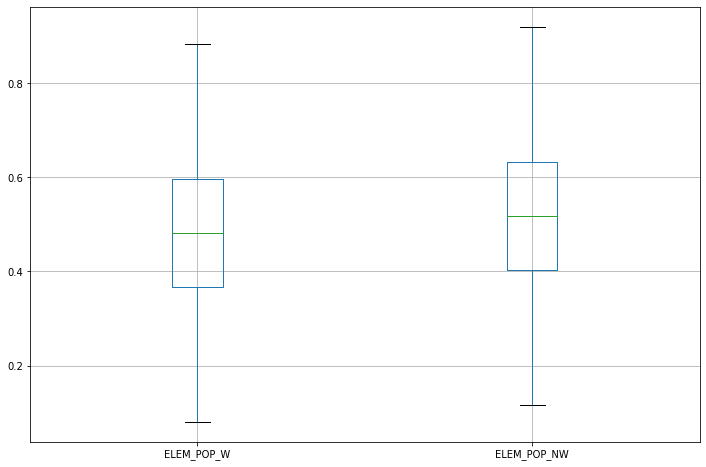

In [17]:
ax, props = spas_grouped.boxplot(column=[whites, non_whites], figsize=(12,8), return_type='both')

## Conclusions for Original Data


Overall, using the dissimilarity index (0.3), there does not appear to be much segregation within the districts.

However, individually, using the absolute differences (0.7 cut-off) and entropy index (0.4 cut-off), there seems to be evidence of segregation in 4 districts; GUI, LIN, SUL and SUG. 


In [18]:
segregated_abs_diff

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
ELEM_CODE,,,
GUI,0.079687,0.920312,0.840625
LIN,0.884211,0.115789,0.768421
SUG,0.135400,0.864600,0.729201
SUL,0.111111,0.888889,0.777778


In [19]:
segregated_entropy

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF,ENTROPY_IND
ELEM_CODE,,,,
GUI,0.079687,0.920312,0.840625,0.278005
LIN,0.884211,0.115789,0.768421,0.358451
SUG,0.135400,0.864600,0.729201,0.396524
SUL,0.111111,0.888889,0.777778,0.348832


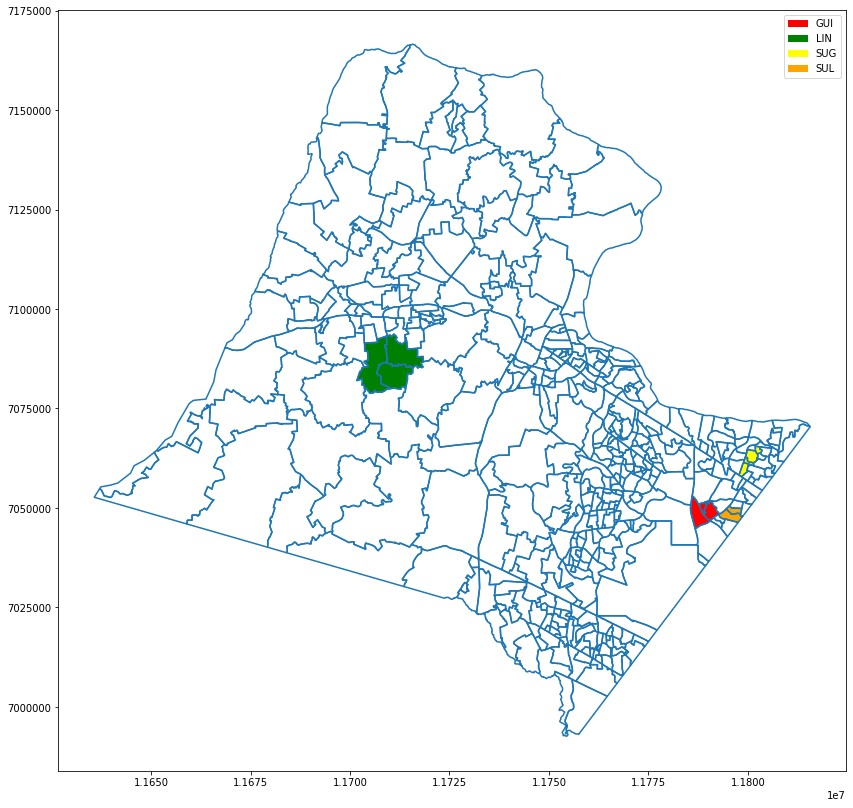

In [20]:
legend_handles = [Patch(facecolor='red', label='GUI'),
                Patch(facecolor='green', label='LIN'),
                Patch(facecolor='yellow', label='SUG'),
                Patch(facecolor='orange', label='SUL')]

ax = spas.boundary.plot(figsize=(15,14))
spas[spas['ELEM_CODE'] == 'GUI'].plot(ax=ax, color='red')
spas[spas['ELEM_CODE'] == 'LIN'].plot(ax=ax, color='green')
spas[spas['ELEM_CODE'] == 'SUG'].plot(ax=ax, color='yellow')
spas[spas['ELEM_CODE'] == 'SUL'].plot(ax=ax, color='orange')
# ax.legend
ax.legend(handles=legend_handles)

# Comparison to data generated by Algorithms

In [21]:
#spas_processed = gpd.read_file('new_SPAs_2017_2018.json', driver='GeoJSON')
# sa = json.loads('./results/SA/run7_ES_SA.json')
# shc = gpd.read_file('./results/SHC/run7_ES_SHC.json', driver='GeoJSON')
# ts = gpd.read_file('./results/TS/run7_ES_TS.json', driver='GeoJSON')

import json

def retrieve_output_data(algo, level, plan):
    output_df = pd.DataFrame({"SPA": [], "NEW_{}_CODE".format(grade): []})  #grade is a global variable
    result_dir = 'results'
    #Load the file as json. 
    with open('{}/{}/run7_{}_{}.json'.format(result_dir, algo, level, algo)) as file:
        #readlines() reads the file as string and loads() loads it into a dict
        obj = json.loads(''.join(file.readlines()))

        #Then iterate its items() as key value pairs
        for spa_code, elem_code in obj[str(plan)]['info']['Final']['zoneIds'].items():
            output_df.loc[len(output_df.index)] = [spa_code, elem_code]

    return output_df
#new line to run the newly downloaded json files, should move around anywhere.

In [22]:
import numpy as np
interested_districts = ["GUI", "SUL", "LIN", "FHR", "HAM", "KWC", "WAT", "EVE", "FDE"]
data_array = np.zeros([25, 2*len(interested_districts)])
# data_array = np.array([])

# Try to make dynamic later

## Output Plan 1

### Simulated Annealing (SA)

In [23]:
sa_output_df = retrieve_output_data('SA', 'ES', 1)
sa_output_df.head()

#To change everything down to SHC or TS

,SPA,NEW_ELEM_CODE
0,CL01,LUC
1,CL02,LUC
2,CL02.1,LUC
3,CL03,LEE
4,CL04,FHR


In [24]:
new_spas_sa = pd.merge(spas, sa_output_df, on='SPA')
new_spas_sa.head()

,OBJECTID,COUNT_,SPA,ELEM_,INT_,HIGH_,ELEM_CODE,MID_CODE,HIGH_CODE,DISTRICT,...,HIGH_POP_P,TOT_POP_A,TOT_POP_W,TOT_POP_M2,TOT_POP_B,TOT_POP_H,TOT_POP_N,TOT_POP_P,geometry,NEW_ELEM_CODE
0,1,5.0,WL03.4,126,205,311,LOV,HRM,WHS,WL,...,0,1,37,0,2,7,0,0,"POLYGON ((11725868.086 7152149.054, 11725870.6...",LOV
1,2,5.0,WL03,126,205,311,LOV,HRM,WHS,WL,...,0,0,83,5,0,6,1,0,"POLYGON ((11726805.147 7160565.439, 11726826.6...",LOV
2,3,5.0,WL27.2,118,202,305,HAM,BRM,LVH,WL,...,0,0,11,0,1,5,0,0,"POLYGON ((11720159.464 7099502.139, 11720172.1...",KWC
3,4,5.0,WL32.1,132,205,311,MTV,HRM,WHS,WL,...,0,8,205,14,8,23,1,0,"POLYGON ((11694466.485 7097608.657, 11694418.5...",RHL
4,5,5.0,WL02,126,205,311,LOV,HRM,WHS,WL,...,0,9,170,3,0,5,0,0,"POLYGON ((11715899.154 7166497.655, 11715932.1...",LOV


In [25]:
new_spas_sa_ethnic = new_spas_sa[['NEW_{}_CODE'.format(grade) , asians, whites, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade), 'geometry']]
new_spas_sa_ethnic.loc[:, non_whites] = new_spas_sa_ethnic.loc[:, asians] +  new_spas_sa_ethnic.loc[:,blacks] +  new_spas_sa_ethnic.loc[:,mixed] \
                            + new_spas_sa_ethnic.loc[:,hispanics] + new_spas_sa_ethnic.loc[:,natives] + new_spas_sa_ethnic.loc[:,pacifics]
new_spas_sa_grouped_raw = new_spas_sa_ethnic.groupby(['NEW_{}_CODE'.format(grade) ]).sum()
new_spas_sa_grouped = new_spas_sa_grouped_raw.div(new_spas_sa_grouped_raw['ELEM_POP'], axis=0)
new_spas_sa_grouped.drop([asians, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade)], axis='columns', inplace=True)
new_spas_sa_grouped.head()

#when generalizing one place to change and use the FORMAT style

C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ELEM_POP_W,ELEM_POP_NW
NEW_ELEM_CODE,,
ALD,0.558587,0.441413
ALG,0.437313,0.562687
ASH,0.368353,0.631647
BAL,0.633448,0.366552
BAN,0.757339,0.242661


In [26]:
vals = np.concatenate([new_spas_sa_grouped.loc[i,:].values for i in interested_districts])
data_array[0,:] = vals

In [27]:
#NOTE: Run this only once or start from the previous cell on subsequent runs - since we use iterrows and create a new column, the calculated value will change on the next runs

import itertools

abs_diffs = []
for row in new_spas_sa_grouped.iterrows():
#     print([val for val in itertools.permutations(row[1], 2)])
#     break
    diffs = [abs(val[1] - val[0]) for val in itertools.permutations(row[1], 2)]
    total = sum(diffs)/2
    abs_diffs.append(total)

new_spas_sa_grouped.loc[:,'ABS_DIFF'] = abs_diffs
new_spas_sa_grouped.head()



,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
ALD,0.558587,0.441413,0.117175
ALG,0.437313,0.562687,0.125373
ASH,0.368353,0.631647,0.263294
BAL,0.633448,0.366552,0.266896
BAN,0.757339,0.242661,0.514677


In [28]:
segregated_abs_diff_sa1 = new_spas_sa_grouped[new_spas_sa_grouped['ABS_DIFF'] > 0.7]
segregated_abs_diff_sa1

#Absolute difference. For groups where absolute differences is greater than 70% we marked as outliers

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
FDE,0.091954,0.908046,0.816092
GUI,0.069565,0.930435,0.860870
SUL,0.115502,0.884498,0.768997


In [29]:
ind_diss_sa1 = 0.5 * sum(abs(new_spas_sa_grouped[whites]/new_spas_sa_grouped[whites].sum() - new_spas_sa_grouped[non_whites]/new_spas_sa_grouped[non_whites].sum()))
ind_diss_sa1

0.3411405684367161

In [30]:
from numpy import log

entropy = -(new_spas_sa_grouped[non_whites]*log(new_spas_sa_grouped[non_whites]) + new_spas_sa_grouped[whites]*log(new_spas_sa_grouped[whites]))
entropy.replace(float('NaN'),0, inplace=True)

new_spas_sa_grouped.loc[:,'ENTROPY_IND'] = entropy

segregated_entropy_sa1 = new_spas_sa_grouped[new_spas_sa_grouped['ENTROPY_IND'] < 0.4]
segregated_entropy_sa1

# The maximum value for the entropy index (ENTROPY_IND) is ln(k), or ln 2 = 0.69. ie. a comparison between whites and non-whites
# • Districts with higher values of ENTROPY_IND are more diverse.
# • A district with ENTROPY_IND = 0.69 would have equal proportions of all groups.
# • A district with ENTROPY_IND = 0 contains only a single group
# • A lower ENTROPY_IND value depicts more segregation

# The ENTROPY_IND is a more valid segregation index and it gives a better view of segregation than the upper extreme whiskers even though some of the 
#districts that came up on the box plot coincided with that of the ENTROPY_IND.
# The ENTROPY_IND is for multiple criteria but because of the proportion of the pacific islanders which were almost insignificant and kept giving 
# making the ENTROPY_IND 0, making the necessary adjustment and treating whites and non-whites made more sense.

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF,ENTROPY_IND
NEW_ELEM_CODE,,,,
FDE,0.091954,0.908046,0.816092,0.307036
GUI,0.069565,0.930435,0.860870,0.252513
SUL,0.115502,0.884498,0.768997,0.357865


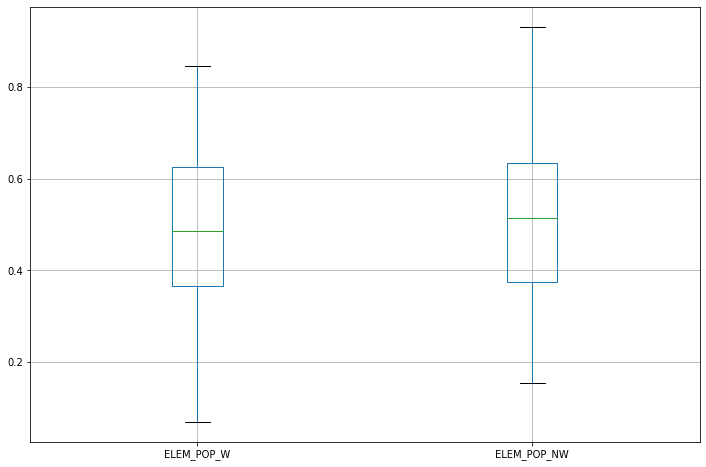

In [31]:
ax, props = new_spas_sa_grouped.boxplot(column=[whites, non_whites], figsize=(12,8), return_type='both')


## Output Plan 2

### Simulated Annealing (SA)

In [32]:
sa_output_df = retrieve_output_data('SA', 'ES', 2)
sa_output_df.head()

#To change everything down to SHC or TS

,SPA,NEW_ELEM_CODE
0,CL01,LUC
1,CL02,LUC
2,CL02.1,LUC
3,CL03,LUC
4,CL04,LEE


In [33]:
new_spas_sa = pd.merge(spas, sa_output_df, on='SPA')
new_spas_sa.head()

,OBJECTID,COUNT_,SPA,ELEM_,INT_,HIGH_,ELEM_CODE,MID_CODE,HIGH_CODE,DISTRICT,...,HIGH_POP_P,TOT_POP_A,TOT_POP_W,TOT_POP_M2,TOT_POP_B,TOT_POP_H,TOT_POP_N,TOT_POP_P,geometry,NEW_ELEM_CODE
0,1,5.0,WL03.4,126,205,311,LOV,HRM,WHS,WL,...,0,1,37,0,2,7,0,0,"POLYGON ((11725868.086 7152149.054, 11725870.6...",WAT
1,2,5.0,WL03,126,205,311,LOV,HRM,WHS,WL,...,0,0,83,5,0,6,1,0,"POLYGON ((11726805.147 7160565.439, 11726826.6...",LOV
2,3,5.0,WL27.2,118,202,305,HAM,BRM,LVH,WL,...,0,0,11,0,1,5,0,0,"POLYGON ((11720159.464 7099502.139, 11720172.1...",HAM
3,4,5.0,WL32.1,132,205,311,MTV,HRM,WHS,WL,...,0,8,205,14,8,23,1,0,"POLYGON ((11694466.485 7097608.657, 11694418.5...",RHL
4,5,5.0,WL02,126,205,311,LOV,HRM,WHS,WL,...,0,9,170,3,0,5,0,0,"POLYGON ((11715899.154 7166497.655, 11715932.1...",LOV


In [34]:
new_spas_sa_ethnic = new_spas_sa[['NEW_{}_CODE'.format(grade) , asians, whites, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade), 'geometry']]
new_spas_sa_ethnic.loc[:, non_whites] = new_spas_sa_ethnic.loc[:, asians] +  new_spas_sa_ethnic.loc[:,blacks] +  new_spas_sa_ethnic.loc[:,mixed] \
                            + new_spas_sa_ethnic.loc[:,hispanics] + new_spas_sa_ethnic.loc[:,natives] + new_spas_sa_ethnic.loc[:,pacifics]
new_spas_sa_grouped_raw = new_spas_sa_ethnic.groupby(['NEW_{}_CODE'.format(grade) ]).sum()
new_spas_sa_grouped = new_spas_sa_grouped_raw.div(new_spas_sa_grouped_raw['ELEM_POP'], axis=0)
new_spas_sa_grouped.drop([asians, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade)], axis='columns', inplace=True)
new_spas_sa_grouped.head()

#when generalizing one place to change and use the FORMAT style

C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ELEM_POP_W,ELEM_POP_NW
NEW_ELEM_CODE,,
ALD,0.580645,0.419355
ALG,0.609848,0.390152
ASH,0.434783,0.565217
BAL,0.383747,0.616253
BAN,0.450980,0.549020


In [35]:
vals = np.concatenate([new_spas_sa_grouped.loc[i,:].values for i in interested_districts])
data_array[1,:] = vals

In [36]:
#NOTE: Run this only once or start from the previous cell on subsequent runs - since we use iterrows and create a new column, the calculated value will change on the next runs

import itertools

abs_diffs = []
for row in new_spas_sa_grouped.iterrows():
#     print([val for val in itertools.permutations(row[1], 2)])
#     break
    diffs = [abs(val[1] - val[0]) for val in itertools.permutations(row[1], 2)]
    total = sum(diffs)/2
    abs_diffs.append(total)

new_spas_sa_grouped.loc[:,'ABS_DIFF'] = abs_diffs
new_spas_sa_grouped.head()



,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
ALD,0.580645,0.419355,0.161290
ALG,0.609848,0.390152,0.219697
ASH,0.434783,0.565217,0.130435
BAL,0.383747,0.616253,0.232506
BAN,0.450980,0.549020,0.098039


In [37]:
segregated_abs_diff_sa2 = new_spas_sa_grouped[new_spas_sa_grouped['ABS_DIFF'] > 0.7]
segregated_abs_diff_sa2

#Absolute difference. For groups where absolute differences is greater than 70% we marked as outliers

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
GUI,0.133333,0.866667,0.733333
SUL,0.111111,0.888889,0.777778


In [38]:
ind_diss_sa2 = 0.5 * sum(abs(new_spas_sa_grouped[whites]/new_spas_sa_grouped[whites].sum() - new_spas_sa_grouped[non_whites]/new_spas_sa_grouped[non_whites].sum()))
ind_diss_sa2

0.3185294639996755

In [39]:
from numpy import log

entropy = -(new_spas_sa_grouped[non_whites]*log(new_spas_sa_grouped[non_whites]) + new_spas_sa_grouped[whites]*log(new_spas_sa_grouped[whites]))
entropy.replace(float('NaN'),0, inplace=True)

new_spas_sa_grouped.loc[:,'ENTROPY_IND'] = entropy

segregated_entropy_sa2 = new_spas_sa_grouped[new_spas_sa_grouped['ENTROPY_IND'] < 0.4]
segregated_entropy_sa2

# The maximum value for the entropy index (ENTROPY_IND) is ln(k), or ln 2 = 0.69. ie. a comparison between whites and non-whites
# • Districts with higher values of ENTROPY_IND are more diverse.
# • A district with ENTROPY_IND = 0.69 would have equal proportions of all groups.
# • A district with ENTROPY_IND = 0 contains only a single group
# • A lower ENTROPY_IND value depicts more segregation

# The ENTROPY_IND is a more valid segregation index and it gives a better view of segregation than the upper extreme whiskers even though some of the 
#districts that came up on the box plot coincided with that of the ENTROPY_IND.
# The ENTROPY_IND is for multiple criteria but because of the proportion of the pacific islanders which were almost insignificant and kept giving 
# making the ENTROPY_IND 0, making the necessary adjustment and treating whites and non-whites made more sense.

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF,ENTROPY_IND
NEW_ELEM_CODE,,,,
GUI,0.133333,0.866667,0.733333,0.392674
SUL,0.111111,0.888889,0.777778,0.348832


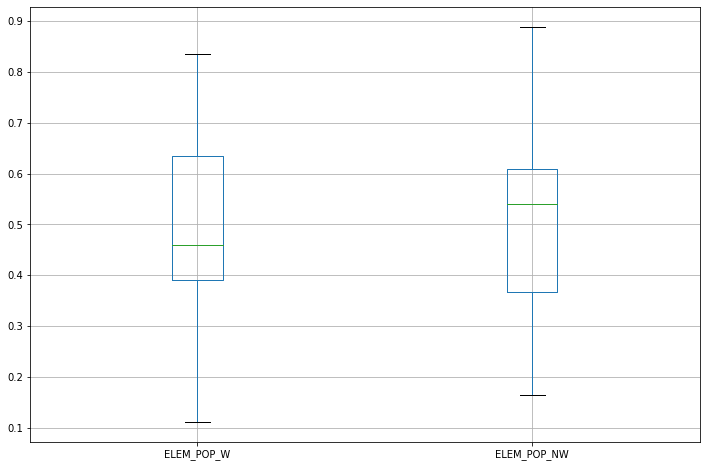

In [40]:
ax, props = new_spas_sa_grouped.boxplot(column=[whites, non_whites], figsize=(12,8), return_type='both')


## Output Plan 3

### Simulated Annealing (SA)

In [41]:
sa_output_df = retrieve_output_data('SA', 'ES', 3)
sa_output_df.head()

#To change everything down to SHC or TS

,SPA,NEW_ELEM_CODE
0,CL01,LUC
1,CL02,LUC
2,CL02.1,LUC
3,CL03,LUC
4,CL04,FHR


In [42]:
new_spas_sa = pd.merge(spas, sa_output_df, on='SPA')
new_spas_sa.head()

,OBJECTID,COUNT_,SPA,ELEM_,INT_,HIGH_,ELEM_CODE,MID_CODE,HIGH_CODE,DISTRICT,...,HIGH_POP_P,TOT_POP_A,TOT_POP_W,TOT_POP_M2,TOT_POP_B,TOT_POP_H,TOT_POP_N,TOT_POP_P,geometry,NEW_ELEM_CODE
0,1,5.0,WL03.4,126,205,311,LOV,HRM,WHS,WL,...,0,1,37,0,2,7,0,0,"POLYGON ((11725868.086 7152149.054, 11725870.6...",LOV
1,2,5.0,WL03,126,205,311,LOV,HRM,WHS,WL,...,0,0,83,5,0,6,1,0,"POLYGON ((11726805.147 7160565.439, 11726826.6...",LOV
2,3,5.0,WL27.2,118,202,305,HAM,BRM,LVH,WL,...,0,0,11,0,1,5,0,0,"POLYGON ((11720159.464 7099502.139, 11720172.1...",HAM
3,4,5.0,WL32.1,132,205,311,MTV,HRM,WHS,WL,...,0,8,205,14,8,23,1,0,"POLYGON ((11694466.485 7097608.657, 11694418.5...",RHL
4,5,5.0,WL02,126,205,311,LOV,HRM,WHS,WL,...,0,9,170,3,0,5,0,0,"POLYGON ((11715899.154 7166497.655, 11715932.1...",LOV


In [43]:
new_spas_sa_ethnic = new_spas_sa[['NEW_{}_CODE'.format(grade) , asians, whites, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade), 'geometry']]
new_spas_sa_ethnic.loc[:, non_whites] = new_spas_sa_ethnic.loc[:, asians] +  new_spas_sa_ethnic.loc[:,blacks] +  new_spas_sa_ethnic.loc[:,mixed] \
                            + new_spas_sa_ethnic.loc[:,hispanics] + new_spas_sa_ethnic.loc[:,natives] + new_spas_sa_ethnic.loc[:,pacifics]
new_spas_sa_grouped_raw = new_spas_sa_ethnic.groupby(['NEW_{}_CODE'.format(grade) ]).sum()
new_spas_sa_grouped = new_spas_sa_grouped_raw.div(new_spas_sa_grouped_raw['ELEM_POP'], axis=0)
new_spas_sa_grouped.drop([asians, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade)], axis='columns', inplace=True)
new_spas_sa_grouped.head()

#when generalizing one place to change and use the FORMAT style

C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ELEM_POP_W,ELEM_POP_NW
NEW_ELEM_CODE,,
ALD,0.595186,0.404814
ALG,0.481700,0.518300
ASH,0.478678,0.521322
BAL,0.656740,0.343260
BAN,0.694779,0.305221


In [44]:
vals = np.concatenate([new_spas_sa_grouped.loc[i,:].values for i in interested_districts])
data_array[2,:] = vals

In [45]:
#NOTE: Run this only once or start from the previous cell on subsequent runs - since we use iterrows and create a new column, the calculated value will change on the next runs

import itertools

abs_diffs = []
for row in new_spas_sa_grouped.iterrows():
#     print([val for val in itertools.permutations(row[1], 2)])
#     break
    diffs = [abs(val[1] - val[0]) for val in itertools.permutations(row[1], 2)]
    total = sum(diffs)/2
    abs_diffs.append(total)

new_spas_sa_grouped.loc[:,'ABS_DIFF'] = abs_diffs
new_spas_sa_grouped.head()



,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
ALD,0.595186,0.404814,0.190372
ALG,0.481700,0.518300,0.036600
ASH,0.478678,0.521322,0.042644
BAL,0.656740,0.343260,0.313480
BAN,0.694779,0.305221,0.389558


In [46]:
segregated_abs_diff_sa3 = new_spas_sa_grouped[new_spas_sa_grouped['ABS_DIFF'] > 0.7]
segregated_abs_diff_sa3

#Absolute difference. For groups where absolute differences is greater than 70% we marked as outliers

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
SUL,0.120053,0.879947,0.759894
WAT,0.893939,0.106061,0.787879


In [47]:
ind_diss_sa3 = 0.5 * sum(abs(new_spas_sa_grouped[whites]/new_spas_sa_grouped[whites].sum() - new_spas_sa_grouped[non_whites]/new_spas_sa_grouped[non_whites].sum()))
ind_diss_sa3

0.31927487928917014

In [48]:
from numpy import log

entropy = -(new_spas_sa_grouped[non_whites]*log(new_spas_sa_grouped[non_whites]) + new_spas_sa_grouped[whites]*log(new_spas_sa_grouped[whites]))
entropy.replace(float('NaN'),0, inplace=True)

new_spas_sa_grouped.loc[:,'ENTROPY_IND'] = entropy

segregated_entropy_sa3 = new_spas_sa_grouped[new_spas_sa_grouped['ENTROPY_IND'] < 0.4]
segregated_entropy_sa3

# The maximum value for the entropy index (ENTROPY_IND) is ln(k), or ln 2 = 0.69. ie. a comparison between whites and non-whites
# • Districts with higher values of ENTROPY_IND are more diverse.
# • A district with ENTROPY_IND = 0.69 would have equal proportions of all groups.
# • A district with ENTROPY_IND = 0 contains only a single group
# • A lower ENTROPY_IND value depicts more segregation

# The ENTROPY_IND is a more valid segregation index and it gives a better view of segregation than the upper extreme whiskers even though some of the 
#districts that came up on the box plot coincided with that of the ENTROPY_IND.
# The ENTROPY_IND is for multiple criteria but because of the proportion of the pacific islanders which were almost insignificant and kept giving 
# making the ENTROPY_IND 0, making the necessary adjustment and treating whites and non-whites made more sense.

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF,ENTROPY_IND
NEW_ELEM_CODE,,,,
SUL,0.120053,0.879947,0.759894,0.367030
WAT,0.893939,0.106061,0.787879,0.338199


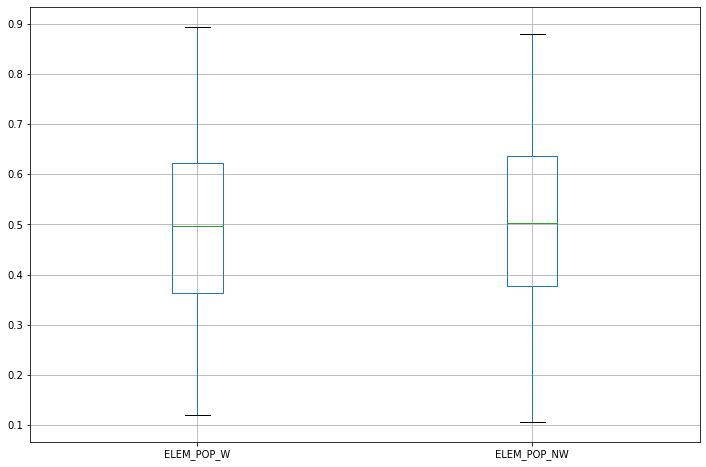

In [49]:
ax, props = new_spas_sa_grouped.boxplot(column=[whites, non_whites], figsize=(12,8), return_type='both')


## Output Plan 4

### Simulated Annealing (SA)

In [50]:
sa_output_df = retrieve_output_data('SA', 'ES', 4)
sa_output_df.head()

#To change everything down to SHC or TS

,SPA,NEW_ELEM_CODE
0,CL01,LOV
1,CL02,LUC
2,CL02.1,LUC
3,CL03,LUC
4,CL04,LUC


In [51]:
new_spas_sa = pd.merge(spas, sa_output_df, on='SPA')
new_spas_sa.head()

,OBJECTID,COUNT_,SPA,ELEM_,INT_,HIGH_,ELEM_CODE,MID_CODE,HIGH_CODE,DISTRICT,...,HIGH_POP_P,TOT_POP_A,TOT_POP_W,TOT_POP_M2,TOT_POP_B,TOT_POP_H,TOT_POP_N,TOT_POP_P,geometry,NEW_ELEM_CODE
0,1,5.0,WL03.4,126,205,311,LOV,HRM,WHS,WL,...,0,1,37,0,2,7,0,0,"POLYGON ((11725868.086 7152149.054, 11725870.6...",LUC
1,2,5.0,WL03,126,205,311,LOV,HRM,WHS,WL,...,0,0,83,5,0,6,1,0,"POLYGON ((11726805.147 7160565.439, 11726826.6...",LOV
2,3,5.0,WL27.2,118,202,305,HAM,BRM,LVH,WL,...,0,0,11,0,1,5,0,0,"POLYGON ((11720159.464 7099502.139, 11720172.1...",KWC
3,4,5.0,WL32.1,132,205,311,MTV,HRM,WHS,WL,...,0,8,205,14,8,23,1,0,"POLYGON ((11694466.485 7097608.657, 11694418.5...",EME
4,5,5.0,WL02,126,205,311,LOV,HRM,WHS,WL,...,0,9,170,3,0,5,0,0,"POLYGON ((11715899.154 7166497.655, 11715932.1...",LUC


In [52]:
new_spas_sa_ethnic = new_spas_sa[['NEW_{}_CODE'.format(grade) , asians, whites, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade), 'geometry']]
new_spas_sa_ethnic.loc[:, non_whites] = new_spas_sa_ethnic.loc[:, asians] +  new_spas_sa_ethnic.loc[:,blacks] +  new_spas_sa_ethnic.loc[:,mixed] \
                            + new_spas_sa_ethnic.loc[:,hispanics] + new_spas_sa_ethnic.loc[:,natives] + new_spas_sa_ethnic.loc[:,pacifics]
new_spas_sa_grouped_raw = new_spas_sa_ethnic.groupby(['NEW_{}_CODE'.format(grade) ]).sum()
new_spas_sa_grouped = new_spas_sa_grouped_raw.div(new_spas_sa_grouped_raw['ELEM_POP'], axis=0)
new_spas_sa_grouped.drop([asians, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade)], axis='columns', inplace=True)
new_spas_sa_grouped.head()

#when generalizing one place to change and use the FORMAT style

C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ELEM_POP_W,ELEM_POP_NW
NEW_ELEM_CODE,,
ALD,0.596234,0.403766
ALG,0.594421,0.405579
ASH,0.409146,0.590854
BAL,0.302824,0.697176
BAN,0.700000,0.300000


In [53]:
vals = np.concatenate([new_spas_sa_grouped.loc[i,:].values for i in interested_districts])
data_array[3,:] = vals

In [54]:
#NOTE: Run this only once or start from the previous cell on subsequent runs - since we use iterrows and create a new column, the calculated value will change on the next runs

import itertools

abs_diffs = []
for row in new_spas_sa_grouped.iterrows():
#     print([val for val in itertools.permutations(row[1], 2)])
#     break
    diffs = [abs(val[1] - val[0]) for val in itertools.permutations(row[1], 2)]
    total = sum(diffs)/2
    abs_diffs.append(total)

new_spas_sa_grouped.loc[:,'ABS_DIFF'] = abs_diffs
new_spas_sa_grouped.head()



,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
ALD,0.596234,0.403766,0.192469
ALG,0.594421,0.405579,0.188841
ASH,0.409146,0.590854,0.181709
BAL,0.302824,0.697176,0.394352
BAN,0.700000,0.300000,0.400000


In [55]:
segregated_abs_diff_sa4 = new_spas_sa_grouped[new_spas_sa_grouped['ABS_DIFF'] > 0.7]
segregated_abs_diff_sa4

#Absolute difference. For groups where absolute differences is greater than 70% we marked as outliers

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
FHR,0.877551,0.122449,0.755102
GUI,0.147378,0.852622,0.705244
LIN,0.877193,0.122807,0.754386
SUL,0.113475,0.886525,0.773050


In [56]:
ind_diss_sa4 = 0.5 * sum(abs(new_spas_sa_grouped[whites]/new_spas_sa_grouped[whites].sum() - new_spas_sa_grouped[non_whites]/new_spas_sa_grouped[non_whites].sum()))
ind_diss_sa4

0.3538578383566726

In [57]:
from numpy import log

entropy = -(new_spas_sa_grouped[non_whites]*log(new_spas_sa_grouped[non_whites]) + new_spas_sa_grouped[whites]*log(new_spas_sa_grouped[whites]))
entropy.replace(float('NaN'),0, inplace=True)

new_spas_sa_grouped.loc[:,'ENTROPY_IND'] = entropy

segregated_entropy_sa4 = new_spas_sa_grouped[new_spas_sa_grouped['ENTROPY_IND'] < 0.4]
segregated_entropy_sa4

# The maximum value for the entropy index (ENTROPY_IND) is ln(k), or ln 2 = 0.69. ie. a comparison between whites and non-whites
# • Districts with higher values of ENTROPY_IND are more diverse.
# • A district with ENTROPY_IND = 0.69 would have equal proportions of all groups.
# • A district with ENTROPY_IND = 0 contains only a single group
# • A lower ENTROPY_IND value depicts more segregation

# The ENTROPY_IND is a more valid segregation index and it gives a better view of segregation than the upper extreme whiskers even though some of the 
#districts that came up on the box plot coincided with that of the ENTROPY_IND.
# The ENTROPY_IND is for multiple criteria but because of the proportion of the pacific islanders which were almost insignificant and kept giving 
# making the ENTROPY_IND 0, making the necessary adjustment and treating whites and non-whites made more sense.

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF,ENTROPY_IND
NEW_ELEM_CODE,,,,
FHR,0.877551,0.122449,0.755102,0.371776
LIN,0.877193,0.122807,0.754386,0.372481
SUL,0.113475,0.886525,0.773050,0.353720


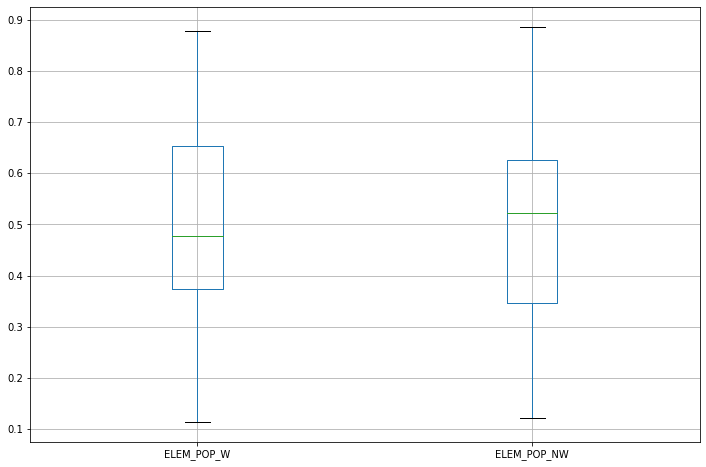

In [58]:
ax, props = new_spas_sa_grouped.boxplot(column=[whites, non_whites], figsize=(12,8), return_type='both')


## Output Plan 5

### Simulated Annealing (SA)

In [59]:
sa_output_df = retrieve_output_data('SA', 'ES', 5)
sa_output_df.head()

#To change everything down to SHC or TS

,SPA,NEW_ELEM_CODE
0,CL01,LUC
1,CL02,LUC
2,CL02.1,LUC
3,CL03,WAT
4,CL04,FHR


In [60]:
new_spas_sa = pd.merge(spas, sa_output_df, on='SPA')
new_spas_sa.head()

,OBJECTID,COUNT_,SPA,ELEM_,INT_,HIGH_,ELEM_CODE,MID_CODE,HIGH_CODE,DISTRICT,...,HIGH_POP_P,TOT_POP_A,TOT_POP_W,TOT_POP_M2,TOT_POP_B,TOT_POP_H,TOT_POP_N,TOT_POP_P,geometry,NEW_ELEM_CODE
0,1,5.0,WL03.4,126,205,311,LOV,HRM,WHS,WL,...,0,1,37,0,2,7,0,0,"POLYGON ((11725868.086 7152149.054, 11725870.6...",LOV
1,2,5.0,WL03,126,205,311,LOV,HRM,WHS,WL,...,0,0,83,5,0,6,1,0,"POLYGON ((11726805.147 7160565.439, 11726826.6...",LOV
2,3,5.0,WL27.2,118,202,305,HAM,BRM,LVH,WL,...,0,0,11,0,1,5,0,0,"POLYGON ((11720159.464 7099502.139, 11720172.1...",WAT
3,4,5.0,WL32.1,132,205,311,MTV,HRM,WHS,WL,...,0,8,205,14,8,23,1,0,"POLYGON ((11694466.485 7097608.657, 11694418.5...",EME
4,5,5.0,WL02,126,205,311,LOV,HRM,WHS,WL,...,0,9,170,3,0,5,0,0,"POLYGON ((11715899.154 7166497.655, 11715932.1...",LOV


In [61]:
new_spas_sa_ethnic = new_spas_sa[['NEW_{}_CODE'.format(grade) , asians, whites, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade), 'geometry']]
new_spas_sa_ethnic.loc[:, non_whites] = new_spas_sa_ethnic.loc[:, asians] +  new_spas_sa_ethnic.loc[:,blacks] +  new_spas_sa_ethnic.loc[:,mixed] \
                            + new_spas_sa_ethnic.loc[:,hispanics] + new_spas_sa_ethnic.loc[:,natives] + new_spas_sa_ethnic.loc[:,pacifics]
new_spas_sa_grouped_raw = new_spas_sa_ethnic.groupby(['NEW_{}_CODE'.format(grade) ]).sum()
new_spas_sa_grouped = new_spas_sa_grouped_raw.div(new_spas_sa_grouped_raw['ELEM_POP'], axis=0)
new_spas_sa_grouped.drop([asians, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade)], axis='columns', inplace=True)
new_spas_sa_grouped.head()

#when generalizing one place to change and use the FORMAT style

C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ELEM_POP_W,ELEM_POP_NW
NEW_ELEM_CODE,,
ALD,0.660784,0.339216
ALG,0.467449,0.532551
ASH,0.533557,0.466443
BAL,0.548176,0.451824
BAN,0.754591,0.245409


In [62]:
vals = np.concatenate([new_spas_sa_grouped.loc[i,:].values for i in interested_districts])
data_array[4,:] = vals

In [63]:
#NOTE: Run this only once or start from the previous cell on subsequent runs - since we use iterrows and create a new column, the calculated value will change on the next runs

import itertools

abs_diffs = []
for row in new_spas_sa_grouped.iterrows():
#     print([val for val in itertools.permutations(row[1], 2)])
#     break
    diffs = [abs(val[1] - val[0]) for val in itertools.permutations(row[1], 2)]
    total = sum(diffs)/2
    abs_diffs.append(total)

new_spas_sa_grouped.loc[:,'ABS_DIFF'] = abs_diffs
new_spas_sa_grouped.head()



,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
ALD,0.660784,0.339216,0.321569
ALG,0.467449,0.532551,0.065101
ASH,0.533557,0.466443,0.067114
BAL,0.548176,0.451824,0.096352
BAN,0.754591,0.245409,0.509182


In [64]:
segregated_abs_diff_sa5 = new_spas_sa_grouped[new_spas_sa_grouped['ABS_DIFF'] > 0.7]
segregated_abs_diff_sa5

#Absolute difference. For groups where absolute differences is greater than 70% we marked as outliers

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
GUI,0.094523,0.905477,0.810954
HAM,0.863636,0.136364,0.727273
SUL,0.138075,0.861925,0.723849


In [65]:
ind_diss_sa5 = 0.5 * sum(abs(new_spas_sa_grouped[whites]/new_spas_sa_grouped[whites].sum() - new_spas_sa_grouped[non_whites]/new_spas_sa_grouped[non_whites].sum()))
ind_diss_sa5

0.3362985692728846

In [66]:
from numpy import log

entropy = -(new_spas_sa_grouped[non_whites]*log(new_spas_sa_grouped[non_whites]) + new_spas_sa_grouped[whites]*log(new_spas_sa_grouped[whites]))
entropy.replace(float('NaN'),0, inplace=True)

new_spas_sa_grouped.loc[:,'ENTROPY_IND'] = entropy

segregated_entropy_sa5 = new_spas_sa_grouped[new_spas_sa_grouped['ENTROPY_IND'] < 0.4]
segregated_entropy_sa5

# The maximum value for the entropy index (ENTROPY_IND) is ln(k), or ln 2 = 0.69. ie. a comparison between whites and non-whites
# • Districts with higher values of ENTROPY_IND are more diverse.
# • A district with ENTROPY_IND = 0.69 would have equal proportions of all groups.
# • A district with ENTROPY_IND = 0 contains only a single group
# • A lower ENTROPY_IND value depicts more segregation

# The ENTROPY_IND is a more valid segregation index and it gives a better view of segregation than the upper extreme whiskers even though some of the 
#districts that came up on the box plot coincided with that of the ENTROPY_IND.
# The ENTROPY_IND is for multiple criteria but because of the proportion of the pacific islanders which were almost insignificant and kept giving 
# making the ENTROPY_IND 0, making the necessary adjustment and treating whites and non-whites made more sense.

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF,ENTROPY_IND
NEW_ELEM_CODE,,,,
GUI,0.094523,0.905477,0.810954,0.312879
HAM,0.863636,0.136364,0.727273,0.398307


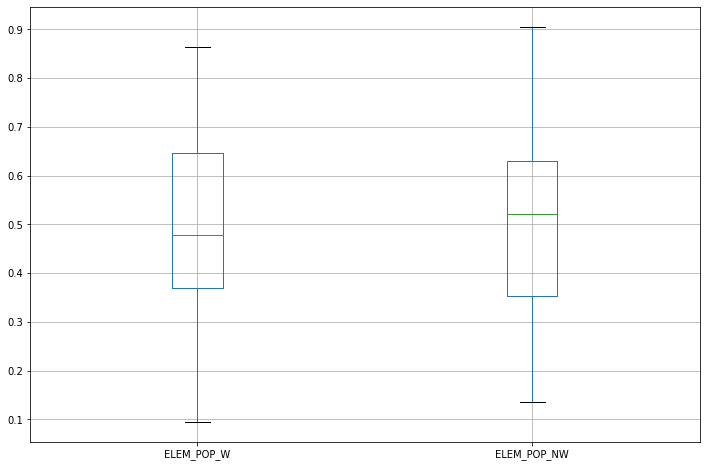

In [67]:
ax, props = new_spas_sa_grouped.boxplot(column=[whites, non_whites], figsize=(12,8), return_type='both')


## Output Plan 6

### Simulated Annealing (SA)

In [68]:
sa_output_df = retrieve_output_data('SA', 'ES', 6)
sa_output_df.head()

#To change everything down to SHC or TS

,SPA,NEW_ELEM_CODE
0,CL01,LUC
1,CL02,LUC
2,CL02.1,WAT
3,CL03,LUC
4,CL04,LUC


In [69]:
new_spas_sa = pd.merge(spas, sa_output_df, on='SPA')
new_spas_sa.head()

,OBJECTID,COUNT_,SPA,ELEM_,INT_,HIGH_,ELEM_CODE,MID_CODE,HIGH_CODE,DISTRICT,...,HIGH_POP_P,TOT_POP_A,TOT_POP_W,TOT_POP_M2,TOT_POP_B,TOT_POP_H,TOT_POP_N,TOT_POP_P,geometry,NEW_ELEM_CODE
0,1,5.0,WL03.4,126,205,311,LOV,HRM,WHS,WL,...,0,1,37,0,2,7,0,0,"POLYGON ((11725868.086 7152149.054, 11725870.6...",MTV
1,2,5.0,WL03,126,205,311,LOV,HRM,WHS,WL,...,0,0,83,5,0,6,1,0,"POLYGON ((11726805.147 7160565.439, 11726826.6...",LOV
2,3,5.0,WL27.2,118,202,305,HAM,BRM,LVH,WL,...,0,0,11,0,1,5,0,0,"POLYGON ((11720159.464 7099502.139, 11720172.1...",FHR
3,4,5.0,WL32.1,132,205,311,MTV,HRM,WHS,WL,...,0,8,205,14,8,23,1,0,"POLYGON ((11694466.485 7097608.657, 11694418.5...",RHL
4,5,5.0,WL02,126,205,311,LOV,HRM,WHS,WL,...,0,9,170,3,0,5,0,0,"POLYGON ((11715899.154 7166497.655, 11715932.1...",LOV


In [70]:
new_spas_sa_ethnic = new_spas_sa[['NEW_{}_CODE'.format(grade) , asians, whites, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade), 'geometry']]
new_spas_sa_ethnic.loc[:, non_whites] = new_spas_sa_ethnic.loc[:, asians] +  new_spas_sa_ethnic.loc[:,blacks] +  new_spas_sa_ethnic.loc[:,mixed] \
                            + new_spas_sa_ethnic.loc[:,hispanics] + new_spas_sa_ethnic.loc[:,natives] + new_spas_sa_ethnic.loc[:,pacifics]
new_spas_sa_grouped_raw = new_spas_sa_ethnic.groupby(['NEW_{}_CODE'.format(grade) ]).sum()
new_spas_sa_grouped = new_spas_sa_grouped_raw.div(new_spas_sa_grouped_raw['ELEM_POP'], axis=0)
new_spas_sa_grouped.drop([asians, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade)], axis='columns', inplace=True)
new_spas_sa_grouped.head()

#when generalizing one place to change and use the FORMAT style

C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ELEM_POP_W,ELEM_POP_NW
NEW_ELEM_CODE,,
ALD,0.481013,0.518987
ALG,0.428360,0.571640
ASH,0.476048,0.523952
BAL,0.522926,0.477074
BAN,0.725552,0.274448


In [71]:
vals = np.concatenate([new_spas_sa_grouped.loc[i,:].values for i in interested_districts])
data_array[5,:] = vals

In [72]:
#NOTE: Run this only once or start from the previous cell on subsequent runs - since we use iterrows and create a new column, the calculated value will change on the next runs

import itertools

abs_diffs = []
for row in new_spas_sa_grouped.iterrows():
#     print([val for val in itertools.permutations(row[1], 2)])
#     break
    diffs = [abs(val[1] - val[0]) for val in itertools.permutations(row[1], 2)]
    total = sum(diffs)/2
    abs_diffs.append(total)

new_spas_sa_grouped.loc[:,'ABS_DIFF'] = abs_diffs
new_spas_sa_grouped.head()



,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
ALD,0.481013,0.518987,0.037975
ALG,0.428360,0.571640,0.143279
ASH,0.476048,0.523952,0.047904
BAL,0.522926,0.477074,0.045852
BAN,0.725552,0.274448,0.451104


In [73]:
segregated_abs_diff_sa6 = new_spas_sa_grouped[new_spas_sa_grouped['ABS_DIFF'] > 0.7]
segregated_abs_diff_sa6

#Absolute difference. For groups where absolute differences is greater than 70% we marked as outliers

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
HAM,0.856209,0.143791,0.712418
KWC,0.914286,0.085714,0.828571
SUL,0.109551,0.890449,0.780899


In [74]:
ind_diss_sa6 = 0.5 * sum(abs(new_spas_sa_grouped[whites]/new_spas_sa_grouped[whites].sum() - new_spas_sa_grouped[non_whites]/new_spas_sa_grouped[non_whites].sum()))
ind_diss_sa6

0.3374409932157744

In [75]:
from numpy import log

entropy = -(new_spas_sa_grouped[non_whites]*log(new_spas_sa_grouped[non_whites]) + new_spas_sa_grouped[whites]*log(new_spas_sa_grouped[whites]))
entropy.replace(float('NaN'),0, inplace=True)

new_spas_sa_grouped.loc[:,'ENTROPY_IND'] = entropy

segregated_entropy_sa6 = new_spas_sa_grouped[new_spas_sa_grouped['ENTROPY_IND'] < 0.4]
segregated_entropy_sa6

# The maximum value for the entropy index (ENTROPY_IND) is ln(k), or ln 2 = 0.69. ie. a comparison between whites and non-whites
# • Districts with higher values of ENTROPY_IND are more diverse.
# • A district with ENTROPY_IND = 0.69 would have equal proportions of all groups.
# • A district with ENTROPY_IND = 0 contains only a single group
# • A lower ENTROPY_IND value depicts more segregation

# The ENTROPY_IND is a more valid segregation index and it gives a better view of segregation than the upper extreme whiskers even though some of the 
#districts that came up on the box plot coincided with that of the ENTROPY_IND.
# The ENTROPY_IND is for multiple criteria but because of the proportion of the pacific islanders which were almost insignificant and kept giving 
# making the ENTROPY_IND 0, making the necessary adjustment and treating whites and non-whites made more sense.

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF,ENTROPY_IND
NEW_ELEM_CODE,,,,
KWC,0.914286,0.085714,0.828571,0.292508
SUL,0.109551,0.890449,0.780899,0.345575


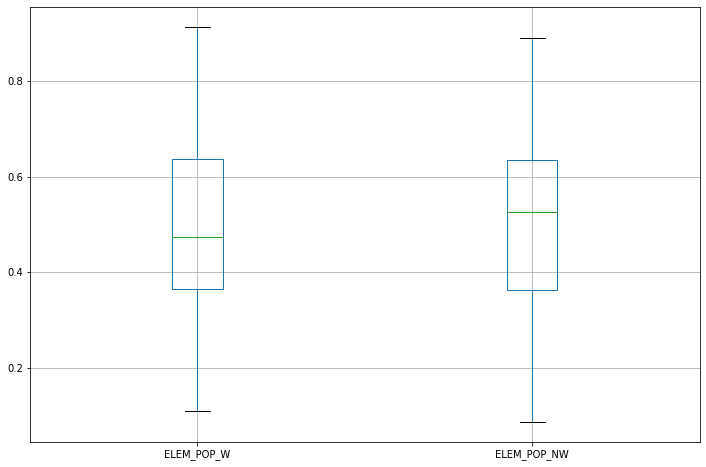

In [76]:
ax, props = new_spas_sa_grouped.boxplot(column=[whites, non_whites], figsize=(12,8), return_type='both')


## Output Plan 7

### Simulated Annealing (SA)

In [77]:
sa_output_df = retrieve_output_data('SA', 'ES', 7)
sa_output_df.head()

#To change everything down to SHC or TS

,SPA,NEW_ELEM_CODE
0,CL01,LUC
1,CL02,LUC
2,CL02.1,LUC
3,CL03,LUC
4,CL04,LUC


In [78]:
new_spas_sa = pd.merge(spas, sa_output_df, on='SPA')
new_spas_sa.head()

,OBJECTID,COUNT_,SPA,ELEM_,INT_,HIGH_,ELEM_CODE,MID_CODE,HIGH_CODE,DISTRICT,...,HIGH_POP_P,TOT_POP_A,TOT_POP_W,TOT_POP_M2,TOT_POP_B,TOT_POP_H,TOT_POP_N,TOT_POP_P,geometry,NEW_ELEM_CODE
0,1,5.0,WL03.4,126,205,311,LOV,HRM,WHS,WL,...,0,1,37,0,2,7,0,0,"POLYGON ((11725868.086 7152149.054, 11725870.6...",LOV
1,2,5.0,WL03,126,205,311,LOV,HRM,WHS,WL,...,0,0,83,5,0,6,1,0,"POLYGON ((11726805.147 7160565.439, 11726826.6...",LUC
2,3,5.0,WL27.2,118,202,305,HAM,BRM,LVH,WL,...,0,0,11,0,1,5,0,0,"POLYGON ((11720159.464 7099502.139, 11720172.1...",HAM
3,4,5.0,WL32.1,132,205,311,MTV,HRM,WHS,WL,...,0,8,205,14,8,23,1,0,"POLYGON ((11694466.485 7097608.657, 11694418.5...",RHL
4,5,5.0,WL02,126,205,311,LOV,HRM,WHS,WL,...,0,9,170,3,0,5,0,0,"POLYGON ((11715899.154 7166497.655, 11715932.1...",LOV


In [79]:
new_spas_sa_ethnic = new_spas_sa[['NEW_{}_CODE'.format(grade) , asians, whites, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade), 'geometry']]
new_spas_sa_ethnic.loc[:, non_whites] = new_spas_sa_ethnic.loc[:, asians] +  new_spas_sa_ethnic.loc[:,blacks] +  new_spas_sa_ethnic.loc[:,mixed] \
                            + new_spas_sa_ethnic.loc[:,hispanics] + new_spas_sa_ethnic.loc[:,natives] + new_spas_sa_ethnic.loc[:,pacifics]
new_spas_sa_grouped_raw = new_spas_sa_ethnic.groupby(['NEW_{}_CODE'.format(grade) ]).sum()
new_spas_sa_grouped = new_spas_sa_grouped_raw.div(new_spas_sa_grouped_raw['ELEM_POP'], axis=0)
new_spas_sa_grouped.drop([asians, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade)], axis='columns', inplace=True)
new_spas_sa_grouped.head()

#when generalizing one place to change and use the FORMAT style

C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ELEM_POP_W,ELEM_POP_NW
NEW_ELEM_CODE,,
ALD,0.493421,0.506579
ALG,0.471111,0.528889
ASH,0.421687,0.578313
BAL,0.380868,0.619132
BAN,0.653696,0.346304


In [80]:
vals = np.concatenate([new_spas_sa_grouped.loc[i,:].values for i in interested_districts])
data_array[6,:] = vals

In [81]:
#NOTE: Run this only once or start from the previous cell on subsequent runs - since we use iterrows and create a new column, the calculated value will change on the next runs

import itertools

abs_diffs = []
for row in new_spas_sa_grouped.iterrows():
#     print([val for val in itertools.permutations(row[1], 2)])
#     break
    diffs = [abs(val[1] - val[0]) for val in itertools.permutations(row[1], 2)]
    total = sum(diffs)/2
    abs_diffs.append(total)

new_spas_sa_grouped.loc[:,'ABS_DIFF'] = abs_diffs
new_spas_sa_grouped.head()



,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
ALD,0.493421,0.506579,0.013158
ALG,0.471111,0.528889,0.057778
ASH,0.421687,0.578313,0.156627
BAL,0.380868,0.619132,0.238264
BAN,0.653696,0.346304,0.307393


In [82]:
segregated_abs_diff_sa7 = new_spas_sa_grouped[new_spas_sa_grouped['ABS_DIFF'] > 0.7]
segregated_abs_diff_sa7

#Absolute difference. For groups where absolute differences is greater than 70% we marked as outliers

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
GUI,0.069565,0.930435,0.860870
HAM,0.887500,0.112500,0.775000
SUL,0.122396,0.877604,0.755208


In [83]:
ind_diss_sa7 = 0.5 * sum(abs(new_spas_sa_grouped[whites]/new_spas_sa_grouped[whites].sum() - new_spas_sa_grouped[non_whites]/new_spas_sa_grouped[non_whites].sum()))
ind_diss_sa7

0.32283176057848634

In [84]:
from numpy import log

entropy = -(new_spas_sa_grouped[non_whites]*log(new_spas_sa_grouped[non_whites]) + new_spas_sa_grouped[whites]*log(new_spas_sa_grouped[whites]))
entropy.replace(float('NaN'),0, inplace=True)

new_spas_sa_grouped.loc[:,'ENTROPY_IND'] = entropy

segregated_entropy_sa7 = new_spas_sa_grouped[new_spas_sa_grouped['ENTROPY_IND'] < 0.4]
segregated_entropy_sa7

# The maximum value for the entropy index (ENTROPY_IND) is ln(k), or ln 2 = 0.69. ie. a comparison between whites and non-whites
# • Districts with higher values of ENTROPY_IND are more diverse.
# • A district with ENTROPY_IND = 0.69 would have equal proportions of all groups.
# • A district with ENTROPY_IND = 0 contains only a single group
# • A lower ENTROPY_IND value depicts more segregation

# The ENTROPY_IND is a more valid segregation index and it gives a better view of segregation than the upper extreme whiskers even though some of the 
#districts that came up on the box plot coincided with that of the ENTROPY_IND.
# The ENTROPY_IND is for multiple criteria but because of the proportion of the pacific islanders which were almost insignificant and kept giving 
# making the ENTROPY_IND 0, making the necessary adjustment and treating whites and non-whites made more sense.

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF,ENTROPY_IND
NEW_ELEM_CODE,,,,
GUI,0.069565,0.930435,0.860870,0.252513
HAM,0.887500,0.112500,0.775000,0.351710
SUL,0.122396,0.877604,0.755208,0.371671


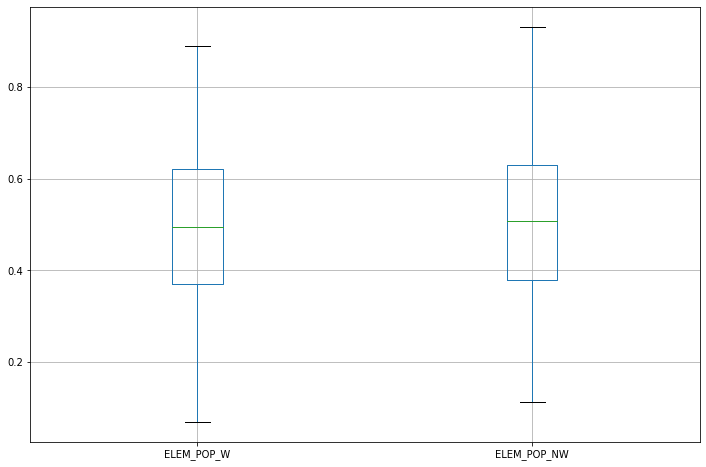

In [85]:
ax, props = new_spas_sa_grouped.boxplot(column=[whites, non_whites], figsize=(12,8), return_type='both')


## Output Plan 8

### Simulated Annealing (SA)

In [86]:
sa_output_df = retrieve_output_data('SA', 'ES', 8)
sa_output_df.head()

#To change everything down to SHC or TS

,SPA,NEW_ELEM_CODE
0,CL01,LUC
1,CL02,LUC
2,CL02.1,WAT
3,CL03,LUC
4,CL04,WAT


In [87]:
new_spas_sa = pd.merge(spas, sa_output_df, on='SPA')
new_spas_sa.head()

,OBJECTID,COUNT_,SPA,ELEM_,INT_,HIGH_,ELEM_CODE,MID_CODE,HIGH_CODE,DISTRICT,...,HIGH_POP_P,TOT_POP_A,TOT_POP_W,TOT_POP_M2,TOT_POP_B,TOT_POP_H,TOT_POP_N,TOT_POP_P,geometry,NEW_ELEM_CODE
0,1,5.0,WL03.4,126,205,311,LOV,HRM,WHS,WL,...,0,1,37,0,2,7,0,0,"POLYGON ((11725868.086 7152149.054, 11725870.6...",LOV
1,2,5.0,WL03,126,205,311,LOV,HRM,WHS,WL,...,0,0,83,5,0,6,1,0,"POLYGON ((11726805.147 7160565.439, 11726826.6...",LOV
2,3,5.0,WL27.2,118,202,305,HAM,BRM,LVH,WL,...,0,0,11,0,1,5,0,0,"POLYGON ((11720159.464 7099502.139, 11720172.1...",HAM
3,4,5.0,WL32.1,132,205,311,MTV,HRM,WHS,WL,...,0,8,205,14,8,23,1,0,"POLYGON ((11694466.485 7097608.657, 11694418.5...",EME
4,5,5.0,WL02,126,205,311,LOV,HRM,WHS,WL,...,0,9,170,3,0,5,0,0,"POLYGON ((11715899.154 7166497.655, 11715932.1...",LOV


In [88]:
new_spas_sa_ethnic = new_spas_sa[['NEW_{}_CODE'.format(grade) , asians, whites, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade), 'geometry']]
new_spas_sa_ethnic.loc[:, non_whites] = new_spas_sa_ethnic.loc[:, asians] +  new_spas_sa_ethnic.loc[:,blacks] +  new_spas_sa_ethnic.loc[:,mixed] \
                            + new_spas_sa_ethnic.loc[:,hispanics] + new_spas_sa_ethnic.loc[:,natives] + new_spas_sa_ethnic.loc[:,pacifics]
new_spas_sa_grouped_raw = new_spas_sa_ethnic.groupby(['NEW_{}_CODE'.format(grade) ]).sum()
new_spas_sa_grouped = new_spas_sa_grouped_raw.div(new_spas_sa_grouped_raw['ELEM_POP'], axis=0)
new_spas_sa_grouped.drop([asians, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade)], axis='columns', inplace=True)
new_spas_sa_grouped.head()

#when generalizing one place to change and use the FORMAT style

C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ELEM_POP_W,ELEM_POP_NW
NEW_ELEM_CODE,,
ALD,0.592593,0.407407
ALG,0.546875,0.453125
ASH,0.449925,0.550075
BAL,0.560201,0.439799
BAN,0.435714,0.564286


In [89]:
vals = np.concatenate([new_spas_sa_grouped.loc[i,:].values for i in interested_districts])
data_array[7,:] = vals

In [90]:
#NOTE: Run this only once or start from the previous cell on subsequent runs - since we use iterrows and create a new column, the calculated value will change on the next runs

import itertools

abs_diffs = []
for row in new_spas_sa_grouped.iterrows():
#     print([val for val in itertools.permutations(row[1], 2)])
#     break
    diffs = [abs(val[1] - val[0]) for val in itertools.permutations(row[1], 2)]
    total = sum(diffs)/2
    abs_diffs.append(total)

new_spas_sa_grouped.loc[:,'ABS_DIFF'] = abs_diffs
new_spas_sa_grouped.head()



,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
ALD,0.592593,0.407407,0.185185
ALG,0.546875,0.453125,0.093750
ASH,0.449925,0.550075,0.100149
BAL,0.560201,0.439799,0.120401
BAN,0.435714,0.564286,0.128571


In [91]:
segregated_abs_diff_sa8 = new_spas_sa_grouped[new_spas_sa_grouped['ABS_DIFF'] > 0.7]
segregated_abs_diff_sa8

#Absolute difference. For groups where absolute differences is greater than 70% we marked as outliers

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
EVE,0.855828,0.144172,0.711656
FDE,0.121751,0.878249,0.756498
GUI,0.069565,0.930435,0.860870
LIN,0.862876,0.137124,0.725753
SUL,0.127168,0.872832,0.745665


In [92]:
ind_diss_sa8 = 0.5 * sum(abs(new_spas_sa_grouped[whites]/new_spas_sa_grouped[whites].sum() - new_spas_sa_grouped[non_whites]/new_spas_sa_grouped[non_whites].sum()))
ind_diss_sa8

0.35414229645700784

In [93]:
from numpy import log

entropy = -(new_spas_sa_grouped[non_whites]*log(new_spas_sa_grouped[non_whites]) + new_spas_sa_grouped[whites]*log(new_spas_sa_grouped[whites]))
entropy.replace(float('NaN'),0, inplace=True)

new_spas_sa_grouped.loc[:,'ENTROPY_IND'] = entropy

segregated_entropy_sa8 = new_spas_sa_grouped[new_spas_sa_grouped['ENTROPY_IND'] < 0.4]
segregated_entropy_sa8

# The maximum value for the entropy index (ENTROPY_IND) is ln(k), or ln 2 = 0.69. ie. a comparison between whites and non-whites
# • Districts with higher values of ENTROPY_IND are more diverse.
# • A district with ENTROPY_IND = 0.69 would have equal proportions of all groups.
# • A district with ENTROPY_IND = 0 contains only a single group
# • A lower ENTROPY_IND value depicts more segregation

# The ENTROPY_IND is a more valid segregation index and it gives a better view of segregation than the upper extreme whiskers even though some of the 
#districts that came up on the box plot coincided with that of the ENTROPY_IND.
# The ENTROPY_IND is for multiple criteria but because of the proportion of the pacific islanders which were almost insignificant and kept giving 
# making the ENTROPY_IND 0, making the necessary adjustment and treating whites and non-whites made more sense.

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF,ENTROPY_IND
NEW_ELEM_CODE,,,,
FDE,0.121751,0.878249,0.756498,0.370399
GUI,0.069565,0.930435,0.860870,0.252513
LIN,0.862876,0.137124,0.725753,0.399708
SUL,0.127168,0.872832,0.745665,0.380967


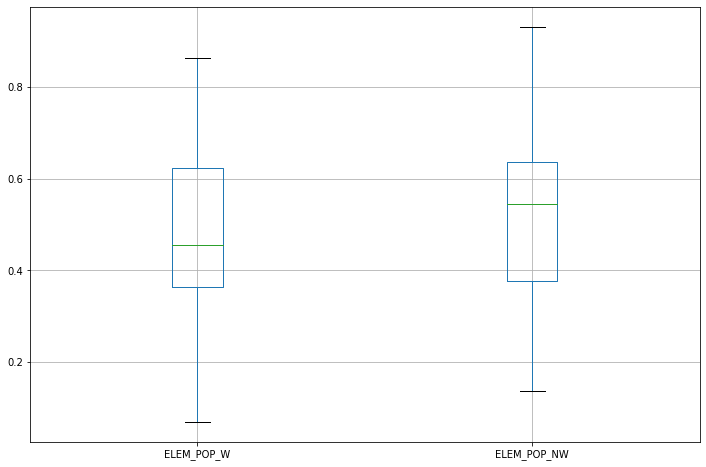

In [94]:
ax, props = new_spas_sa_grouped.boxplot(column=[whites, non_whites], figsize=(12,8), return_type='both')


## Output Plan 9

### Simulated Annealing (SA)

In [95]:
sa_output_df = retrieve_output_data('SA', 'ES', 9)
sa_output_df.head()

#To change everything down to SHC or TS

,SPA,NEW_ELEM_CODE
0,CL01,LUC
1,CL02,LUC
2,CL02.1,LUC
3,CL03,LUC
4,CL04,WAT


In [96]:
new_spas_sa = pd.merge(spas, sa_output_df, on='SPA')
new_spas_sa.head()

,OBJECTID,COUNT_,SPA,ELEM_,INT_,HIGH_,ELEM_CODE,MID_CODE,HIGH_CODE,DISTRICT,...,HIGH_POP_P,TOT_POP_A,TOT_POP_W,TOT_POP_M2,TOT_POP_B,TOT_POP_H,TOT_POP_N,TOT_POP_P,geometry,NEW_ELEM_CODE
0,1,5.0,WL03.4,126,205,311,LOV,HRM,WHS,WL,...,0,1,37,0,2,7,0,0,"POLYGON ((11725868.086 7152149.054, 11725870.6...",LOV
1,2,5.0,WL03,126,205,311,LOV,HRM,WHS,WL,...,0,0,83,5,0,6,1,0,"POLYGON ((11726805.147 7160565.439, 11726826.6...",LOV
2,3,5.0,WL27.2,118,202,305,HAM,BRM,LVH,WL,...,0,0,11,0,1,5,0,0,"POLYGON ((11720159.464 7099502.139, 11720172.1...",KWC
3,4,5.0,WL32.1,132,205,311,MTV,HRM,WHS,WL,...,0,8,205,14,8,23,1,0,"POLYGON ((11694466.485 7097608.657, 11694418.5...",RHL
4,5,5.0,WL02,126,205,311,LOV,HRM,WHS,WL,...,0,9,170,3,0,5,0,0,"POLYGON ((11715899.154 7166497.655, 11715932.1...",LOV


In [97]:
new_spas_sa_ethnic = new_spas_sa[['NEW_{}_CODE'.format(grade) , asians, whites, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade), 'geometry']]
new_spas_sa_ethnic.loc[:, non_whites] = new_spas_sa_ethnic.loc[:, asians] +  new_spas_sa_ethnic.loc[:,blacks] +  new_spas_sa_ethnic.loc[:,mixed] \
                            + new_spas_sa_ethnic.loc[:,hispanics] + new_spas_sa_ethnic.loc[:,natives] + new_spas_sa_ethnic.loc[:,pacifics]
new_spas_sa_grouped_raw = new_spas_sa_ethnic.groupby(['NEW_{}_CODE'.format(grade) ]).sum()
new_spas_sa_grouped = new_spas_sa_grouped_raw.div(new_spas_sa_grouped_raw['ELEM_POP'], axis=0)
new_spas_sa_grouped.drop([asians, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade)], axis='columns', inplace=True)
new_spas_sa_grouped.head()

#when generalizing one place to change and use the FORMAT style

C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ELEM_POP_W,ELEM_POP_NW
NEW_ELEM_CODE,,
ALD,0.603550,0.396450
ALG,0.548344,0.451656
ASH,0.503401,0.496599
BAL,0.474099,0.525901
BAN,0.730769,0.269231


In [98]:
vals = np.concatenate([new_spas_sa_grouped.loc[i,:].values for i in interested_districts])
data_array[8,:] = vals

In [99]:
#NOTE: Run this only once or start from the previous cell on subsequent runs - since we use iterrows and create a new column, the calculated value will change on the next runs

import itertools

abs_diffs = []
for row in new_spas_sa_grouped.iterrows():
#     print([val for val in itertools.permutations(row[1], 2)])
#     break
    diffs = [abs(val[1] - val[0]) for val in itertools.permutations(row[1], 2)]
    total = sum(diffs)/2
    abs_diffs.append(total)

new_spas_sa_grouped.loc[:,'ABS_DIFF'] = abs_diffs
new_spas_sa_grouped.head()



,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
ALD,0.603550,0.396450,0.207101
ALG,0.548344,0.451656,0.096689
ASH,0.503401,0.496599,0.006803
BAL,0.474099,0.525901,0.051802
BAN,0.730769,0.269231,0.461538


In [100]:
segregated_abs_diff_sa9 = new_spas_sa_grouped[new_spas_sa_grouped['ABS_DIFF'] > 0.7]
segregated_abs_diff_sa9

#Absolute difference. For groups where absolute differences is greater than 70% we marked as outliers

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
GUI,0.088210,0.911790,0.823581
MTV,0.856089,0.143911,0.712177


In [101]:
ind_diss_sa9 = 0.5 * sum(abs(new_spas_sa_grouped[whites]/new_spas_sa_grouped[whites].sum() - new_spas_sa_grouped[non_whites]/new_spas_sa_grouped[non_whites].sum()))
ind_diss_sa9

0.3044650591987197

In [102]:
from numpy import log

entropy = -(new_spas_sa_grouped[non_whites]*log(new_spas_sa_grouped[non_whites]) + new_spas_sa_grouped[whites]*log(new_spas_sa_grouped[whites]))
entropy.replace(float('NaN'),0, inplace=True)

new_spas_sa_grouped.loc[:,'ENTROPY_IND'] = entropy

segregated_entropy_sa9 = new_spas_sa_grouped[new_spas_sa_grouped['ENTROPY_IND'] < 0.4]
segregated_entropy_sa9

# The maximum value for the entropy index (ENTROPY_IND) is ln(k), or ln 2 = 0.69. ie. a comparison between whites and non-whites
# • Districts with higher values of ENTROPY_IND are more diverse.
# • A district with ENTROPY_IND = 0.69 would have equal proportions of all groups.
# • A district with ENTROPY_IND = 0 contains only a single group
# • A lower ENTROPY_IND value depicts more segregation

# The ENTROPY_IND is a more valid segregation index and it gives a better view of segregation than the upper extreme whiskers even though some of the 
#districts that came up on the box plot coincided with that of the ENTROPY_IND.
# The ENTROPY_IND is for multiple criteria but because of the proportion of the pacific islanders which were almost insignificant and kept giving 
# making the ENTROPY_IND 0, making the necessary adjustment and treating whites and non-whites made more sense.

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF,ENTROPY_IND
NEW_ELEM_CODE,,,,
GUI,0.08821,0.91179,0.823581,0.298376


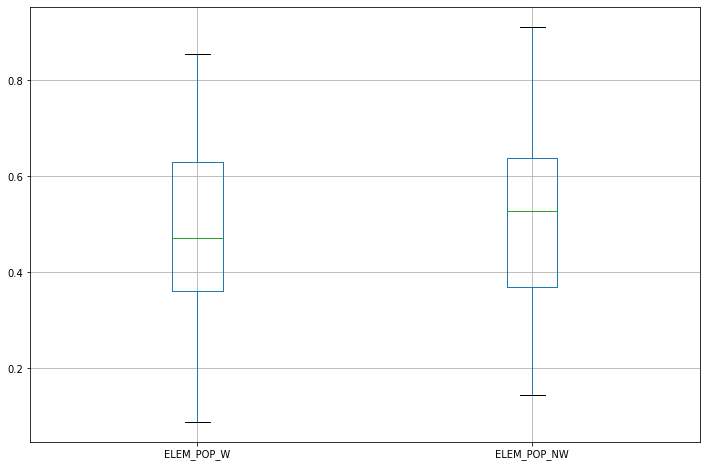

In [103]:
ax, props = new_spas_sa_grouped.boxplot(column=[whites, non_whites], figsize=(12,8), return_type='both')


## Output Plan 10

### Simulated Annealing (SA)

In [104]:
sa_output_df = retrieve_output_data('SA', 'ES', 10)
sa_output_df.head()

#To change everything down to SHC or TS

,SPA,NEW_ELEM_CODE
0,CL01,LOV
1,CL02,LUC
2,CL02.1,LUC
3,CL03,WAT
4,CL04,FHR


In [105]:
new_spas_sa = pd.merge(spas, sa_output_df, on='SPA')
new_spas_sa.head()

,OBJECTID,COUNT_,SPA,ELEM_,INT_,HIGH_,ELEM_CODE,MID_CODE,HIGH_CODE,DISTRICT,...,HIGH_POP_P,TOT_POP_A,TOT_POP_W,TOT_POP_M2,TOT_POP_B,TOT_POP_H,TOT_POP_N,TOT_POP_P,geometry,NEW_ELEM_CODE
0,1,5.0,WL03.4,126,205,311,LOV,HRM,WHS,WL,...,0,1,37,0,2,7,0,0,"POLYGON ((11725868.086 7152149.054, 11725870.6...",WAT
1,2,5.0,WL03,126,205,311,LOV,HRM,WHS,WL,...,0,0,83,5,0,6,1,0,"POLYGON ((11726805.147 7160565.439, 11726826.6...",LOV
2,3,5.0,WL27.2,118,202,305,HAM,BRM,LVH,WL,...,0,0,11,0,1,5,0,0,"POLYGON ((11720159.464 7099502.139, 11720172.1...",HAM
3,4,5.0,WL32.1,132,205,311,MTV,HRM,WHS,WL,...,0,8,205,14,8,23,1,0,"POLYGON ((11694466.485 7097608.657, 11694418.5...",RHL
4,5,5.0,WL02,126,205,311,LOV,HRM,WHS,WL,...,0,9,170,3,0,5,0,0,"POLYGON ((11715899.154 7166497.655, 11715932.1...",LOV


In [106]:
new_spas_sa_ethnic = new_spas_sa[['NEW_{}_CODE'.format(grade) , asians, whites, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade), 'geometry']]
new_spas_sa_ethnic.loc[:, non_whites] = new_spas_sa_ethnic.loc[:, asians] +  new_spas_sa_ethnic.loc[:,blacks] +  new_spas_sa_ethnic.loc[:,mixed] \
                            + new_spas_sa_ethnic.loc[:,hispanics] + new_spas_sa_ethnic.loc[:,natives] + new_spas_sa_ethnic.loc[:,pacifics]
new_spas_sa_grouped_raw = new_spas_sa_ethnic.groupby(['NEW_{}_CODE'.format(grade) ]).sum()
new_spas_sa_grouped = new_spas_sa_grouped_raw.div(new_spas_sa_grouped_raw['ELEM_POP'], axis=0)
new_spas_sa_grouped.drop([asians, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade)], axis='columns', inplace=True)
new_spas_sa_grouped.head()

#when generalizing one place to change and use the FORMAT style

C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ELEM_POP_W,ELEM_POP_NW
NEW_ELEM_CODE,,
ALD,0.604651,0.395349
ALG,0.533981,0.466019
ASH,0.503153,0.496847
BAL,0.477215,0.522785
BAN,0.763780,0.236220


In [107]:
vals = np.concatenate([new_spas_sa_grouped.loc[i,:].values for i in interested_districts])
data_array[9,:] = vals

In [108]:
#NOTE: Run this only once or start from the previous cell on subsequent runs - since we use iterrows and create a new column, the calculated value will change on the next runs

import itertools

abs_diffs = []
for row in new_spas_sa_grouped.iterrows():
#     print([val for val in itertools.permutations(row[1], 2)])
#     break
    diffs = [abs(val[1] - val[0]) for val in itertools.permutations(row[1], 2)]
    total = sum(diffs)/2
    abs_diffs.append(total)

new_spas_sa_grouped.loc[:,'ABS_DIFF'] = abs_diffs
new_spas_sa_grouped.head()



,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
ALD,0.604651,0.395349,0.209302
ALG,0.533981,0.466019,0.067961
ASH,0.503153,0.496847,0.006305
BAL,0.477215,0.522785,0.045570
BAN,0.763780,0.236220,0.527559


In [109]:
segregated_abs_diff_sa10 = new_spas_sa_grouped[new_spas_sa_grouped['ABS_DIFF'] > 0.7]
segregated_abs_diff_sa10

#Absolute difference. For groups where absolute differences is greater than 70% we marked as outliers

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
FDE,0.109347,0.890653,0.781305
SUL,0.128743,0.871257,0.742515


In [110]:
ind_diss_sa10 = 0.5 * sum(abs(new_spas_sa_grouped[whites]/new_spas_sa_grouped[whites].sum() - new_spas_sa_grouped[non_whites]/new_spas_sa_grouped[non_whites].sum()))
ind_diss_sa10

0.32154887812227184

In [111]:
from numpy import log

entropy = -(new_spas_sa_grouped[non_whites]*log(new_spas_sa_grouped[non_whites]) + new_spas_sa_grouped[whites]*log(new_spas_sa_grouped[whites]))
entropy.replace(float('NaN'),0, inplace=True)

new_spas_sa_grouped.loc[:,'ENTROPY_IND'] = entropy

segregated_entropy_sa10 = new_spas_sa_grouped[new_spas_sa_grouped['ENTROPY_IND'] < 0.4]
segregated_entropy_sa10

# The maximum value for the entropy index (ENTROPY_IND) is ln(k), or ln 2 = 0.69. ie. a comparison between whites and non-whites
# • Districts with higher values of ENTROPY_IND are more diverse.
# • A district with ENTROPY_IND = 0.69 would have equal proportions of all groups.
# • A district with ENTROPY_IND = 0 contains only a single group
# • A lower ENTROPY_IND value depicts more segregation

# The ENTROPY_IND is a more valid segregation index and it gives a better view of segregation than the upper extreme whiskers even though some of the 
#districts that came up on the box plot coincided with that of the ENTROPY_IND.
# The ENTROPY_IND is for multiple criteria but because of the proportion of the pacific islanders which were almost insignificant and kept giving 
# making the ENTROPY_IND 0, making the necessary adjustment and treating whites and non-whites made more sense.

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF,ENTROPY_IND
NEW_ELEM_CODE,,,,
FDE,0.109347,0.890653,0.781305,0.345149
SUL,0.128743,0.871257,0.742515,0.383989


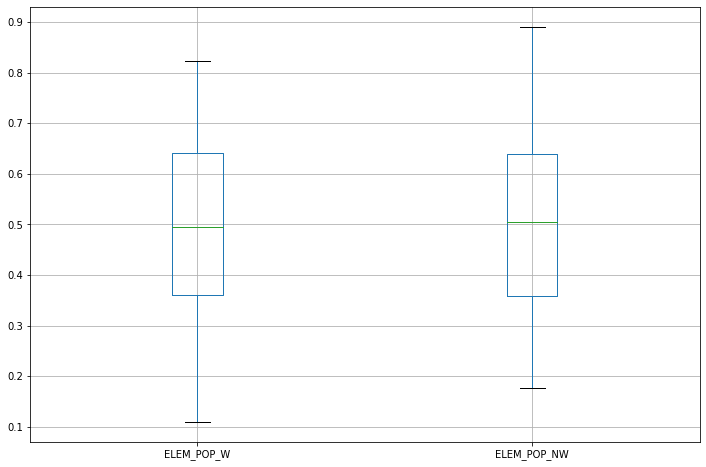

In [112]:
ax, props = new_spas_sa_grouped.boxplot(column=[whites, non_whites], figsize=(12,8), return_type='both')


## Output Plan 11

### Simulated Annealing (SA)

In [113]:
sa_output_df = retrieve_output_data('SA', 'ES', 11)
sa_output_df.head()

#To change everything down to SHC or TS

,SPA,NEW_ELEM_CODE
0,CL01,LUC
1,CL02,LUC
2,CL02.1,LUC
3,CL03,LUC
4,CL04,LUC


In [114]:
new_spas_sa = pd.merge(spas, sa_output_df, on='SPA')
new_spas_sa.head()

,OBJECTID,COUNT_,SPA,ELEM_,INT_,HIGH_,ELEM_CODE,MID_CODE,HIGH_CODE,DISTRICT,...,HIGH_POP_P,TOT_POP_A,TOT_POP_W,TOT_POP_M2,TOT_POP_B,TOT_POP_H,TOT_POP_N,TOT_POP_P,geometry,NEW_ELEM_CODE
0,1,5.0,WL03.4,126,205,311,LOV,HRM,WHS,WL,...,0,1,37,0,2,7,0,0,"POLYGON ((11725868.086 7152149.054, 11725870.6...",LOV
1,2,5.0,WL03,126,205,311,LOV,HRM,WHS,WL,...,0,0,83,5,0,6,1,0,"POLYGON ((11726805.147 7160565.439, 11726826.6...",LOV
2,3,5.0,WL27.2,118,202,305,HAM,BRM,LVH,WL,...,0,0,11,0,1,5,0,0,"POLYGON ((11720159.464 7099502.139, 11720172.1...",HAM
3,4,5.0,WL32.1,132,205,311,MTV,HRM,WHS,WL,...,0,8,205,14,8,23,1,0,"POLYGON ((11694466.485 7097608.657, 11694418.5...",RHL
4,5,5.0,WL02,126,205,311,LOV,HRM,WHS,WL,...,0,9,170,3,0,5,0,0,"POLYGON ((11715899.154 7166497.655, 11715932.1...",MTV


In [115]:
new_spas_sa_ethnic = new_spas_sa[['NEW_{}_CODE'.format(grade) , asians, whites, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade), 'geometry']]
new_spas_sa_ethnic.loc[:, non_whites] = new_spas_sa_ethnic.loc[:, asians] +  new_spas_sa_ethnic.loc[:,blacks] +  new_spas_sa_ethnic.loc[:,mixed] \
                            + new_spas_sa_ethnic.loc[:,hispanics] + new_spas_sa_ethnic.loc[:,natives] + new_spas_sa_ethnic.loc[:,pacifics]
new_spas_sa_grouped_raw = new_spas_sa_ethnic.groupby(['NEW_{}_CODE'.format(grade) ]).sum()
new_spas_sa_grouped = new_spas_sa_grouped_raw.div(new_spas_sa_grouped_raw['ELEM_POP'], axis=0)
new_spas_sa_grouped.drop([asians, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade)], axis='columns', inplace=True)
new_spas_sa_grouped.head()

#when generalizing one place to change and use the FORMAT style

C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ELEM_POP_W,ELEM_POP_NW
NEW_ELEM_CODE,,
ALD,0.673016,0.326984
ALG,0.389583,0.610417
ASH,0.479915,0.520085
BAL,0.631661,0.368339
BAN,0.611111,0.388889


In [116]:
vals = np.concatenate([new_spas_sa_grouped.loc[i,:].values for i in interested_districts])
data_array[10,:] = vals

In [117]:
#NOTE: Run this only once or start from the previous cell on subsequent runs - since we use iterrows and create a new column, the calculated value will change on the next runs

import itertools

abs_diffs = []
for row in new_spas_sa_grouped.iterrows():
#     print([val for val in itertools.permutations(row[1], 2)])
#     break
    diffs = [abs(val[1] - val[0]) for val in itertools.permutations(row[1], 2)]
    total = sum(diffs)/2
    abs_diffs.append(total)

new_spas_sa_grouped.loc[:,'ABS_DIFF'] = abs_diffs
new_spas_sa_grouped.head()



,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
ALD,0.673016,0.326984,0.346032
ALG,0.389583,0.610417,0.220833
ASH,0.479915,0.520085,0.040169
BAL,0.631661,0.368339,0.263323
BAN,0.611111,0.388889,0.222222


In [118]:
segregated_abs_diff_sa11 = new_spas_sa_grouped[new_spas_sa_grouped['ABS_DIFF'] > 0.7]
segregated_abs_diff_sa11

#Absolute difference. For groups where absolute differences is greater than 70% we marked as outliers

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
GUI,0.093470,0.906530,0.813060
MTV,0.854762,0.145238,0.709524
SUL,0.145995,0.854005,0.708010
WAT,0.863248,0.136752,0.726496


In [119]:
ind_diss_sa11 = 0.5 * sum(abs(new_spas_sa_grouped[whites]/new_spas_sa_grouped[whites].sum() - new_spas_sa_grouped[non_whites]/new_spas_sa_grouped[non_whites].sum()))
ind_diss_sa11

0.3280429844684689

In [120]:
from numpy import log

entropy = -(new_spas_sa_grouped[non_whites]*log(new_spas_sa_grouped[non_whites]) + new_spas_sa_grouped[whites]*log(new_spas_sa_grouped[whites]))
entropy.replace(float('NaN'),0, inplace=True)

new_spas_sa_grouped.loc[:,'ENTROPY_IND'] = entropy

segregated_entropy_sa11 = new_spas_sa_grouped[new_spas_sa_grouped['ENTROPY_IND'] < 0.4]
segregated_entropy_sa11

# The maximum value for the entropy index (ENTROPY_IND) is ln(k), or ln 2 = 0.69. ie. a comparison between whites and non-whites
# • Districts with higher values of ENTROPY_IND are more diverse.
# • A district with ENTROPY_IND = 0.69 would have equal proportions of all groups.
# • A district with ENTROPY_IND = 0 contains only a single group
# • A lower ENTROPY_IND value depicts more segregation

# The ENTROPY_IND is a more valid segregation index and it gives a better view of segregation than the upper extreme whiskers even though some of the 
#districts that came up on the box plot coincided with that of the ENTROPY_IND.
# The ENTROPY_IND is for multiple criteria but because of the proportion of the pacific islanders which were almost insignificant and kept giving 
# making the ENTROPY_IND 0, making the necessary adjustment and treating whites and non-whites made more sense.

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF,ENTROPY_IND
NEW_ELEM_CODE,,,,
GUI,0.093470,0.906530,0.813060,0.310493
WAT,0.863248,0.136752,0.726496,0.399024


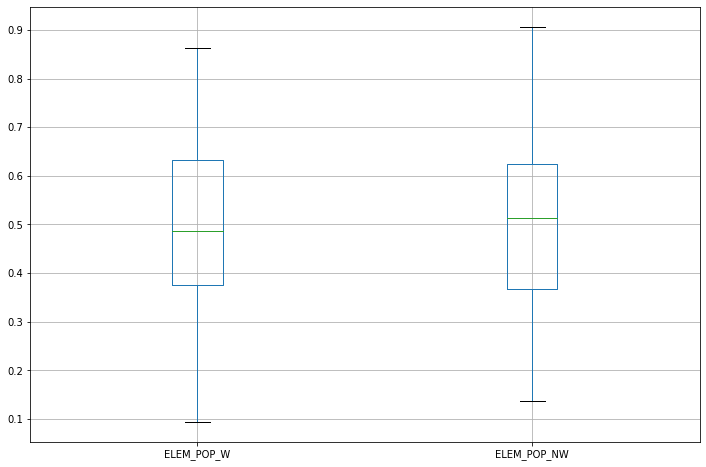

In [121]:
ax, props = new_spas_sa_grouped.boxplot(column=[whites, non_whites], figsize=(12,8), return_type='both')


## Output Plan 12

### Simulated Annealing (SA)

In [122]:
sa_output_df = retrieve_output_data('SA', 'ES', 12)
sa_output_df.head()

#To change everything down to SHC or TS

,SPA,NEW_ELEM_CODE
0,CL01,LUC
1,CL02,LUC
2,CL02.1,LUC
3,CL03,FHR
4,CL04,FHR


In [123]:
new_spas_sa = pd.merge(spas, sa_output_df, on='SPA')
new_spas_sa.head()

,OBJECTID,COUNT_,SPA,ELEM_,INT_,HIGH_,ELEM_CODE,MID_CODE,HIGH_CODE,DISTRICT,...,HIGH_POP_P,TOT_POP_A,TOT_POP_W,TOT_POP_M2,TOT_POP_B,TOT_POP_H,TOT_POP_N,TOT_POP_P,geometry,NEW_ELEM_CODE
0,1,5.0,WL03.4,126,205,311,LOV,HRM,WHS,WL,...,0,1,37,0,2,7,0,0,"POLYGON ((11725868.086 7152149.054, 11725870.6...",LOV
1,2,5.0,WL03,126,205,311,LOV,HRM,WHS,WL,...,0,0,83,5,0,6,1,0,"POLYGON ((11726805.147 7160565.439, 11726826.6...",LOV
2,3,5.0,WL27.2,118,202,305,HAM,BRM,LVH,WL,...,0,0,11,0,1,5,0,0,"POLYGON ((11720159.464 7099502.139, 11720172.1...",HAM
3,4,5.0,WL32.1,132,205,311,MTV,HRM,WHS,WL,...,0,8,205,14,8,23,1,0,"POLYGON ((11694466.485 7097608.657, 11694418.5...",RHL
4,5,5.0,WL02,126,205,311,LOV,HRM,WHS,WL,...,0,9,170,3,0,5,0,0,"POLYGON ((11715899.154 7166497.655, 11715932.1...",LOV


In [124]:
new_spas_sa_ethnic = new_spas_sa[['NEW_{}_CODE'.format(grade) , asians, whites, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade), 'geometry']]
new_spas_sa_ethnic.loc[:, non_whites] = new_spas_sa_ethnic.loc[:, asians] +  new_spas_sa_ethnic.loc[:,blacks] +  new_spas_sa_ethnic.loc[:,mixed] \
                            + new_spas_sa_ethnic.loc[:,hispanics] + new_spas_sa_ethnic.loc[:,natives] + new_spas_sa_ethnic.loc[:,pacifics]
new_spas_sa_grouped_raw = new_spas_sa_ethnic.groupby(['NEW_{}_CODE'.format(grade) ]).sum()
new_spas_sa_grouped = new_spas_sa_grouped_raw.div(new_spas_sa_grouped_raw['ELEM_POP'], axis=0)
new_spas_sa_grouped.drop([asians, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade)], axis='columns', inplace=True)
new_spas_sa_grouped.head()

#when generalizing one place to change and use the FORMAT style

C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ELEM_POP_W,ELEM_POP_NW
NEW_ELEM_CODE,,
ALD,0.621622,0.378378
ALG,0.582121,0.417879
ASH,0.455172,0.544828
BAL,0.435103,0.564897
BAN,0.760383,0.239617


In [125]:
vals = np.concatenate([new_spas_sa_grouped.loc[i,:].values for i in interested_districts])
data_array[11,:] = vals

In [126]:
#NOTE: Run this only once or start from the previous cell on subsequent runs - since we use iterrows and create a new column, the calculated value will change on the next runs

import itertools

abs_diffs = []
for row in new_spas_sa_grouped.iterrows():
#     print([val for val in itertools.permutations(row[1], 2)])
#     break
    diffs = [abs(val[1] - val[0]) for val in itertools.permutations(row[1], 2)]
    total = sum(diffs)/2
    abs_diffs.append(total)

new_spas_sa_grouped.loc[:,'ABS_DIFF'] = abs_diffs
new_spas_sa_grouped.head()



,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
ALD,0.621622,0.378378,0.243243
ALG,0.582121,0.417879,0.164241
ASH,0.455172,0.544828,0.089655
BAL,0.435103,0.564897,0.129794
BAN,0.760383,0.239617,0.520767


In [127]:
segregated_abs_diff_sa12 = new_spas_sa_grouped[new_spas_sa_grouped['ABS_DIFF'] > 0.7]
segregated_abs_diff_sa12

#Absolute difference. For groups where absolute differences is greater than 70% we marked as outliers

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
GUI,0.093795,0.906205,0.812410
KWC,0.870307,0.129693,0.740614
LIN,0.909871,0.090129,0.819742
SUL,0.138444,0.861556,0.723112


In [128]:
ind_diss_sa12 = 0.5 * sum(abs(new_spas_sa_grouped[whites]/new_spas_sa_grouped[whites].sum() - new_spas_sa_grouped[non_whites]/new_spas_sa_grouped[non_whites].sum()))
ind_diss_sa12

0.3366357188742663

In [129]:
from numpy import log

entropy = -(new_spas_sa_grouped[non_whites]*log(new_spas_sa_grouped[non_whites]) + new_spas_sa_grouped[whites]*log(new_spas_sa_grouped[whites]))
entropy.replace(float('NaN'),0, inplace=True)

new_spas_sa_grouped.loc[:,'ENTROPY_IND'] = entropy

segregated_entropy_sa12 = new_spas_sa_grouped[new_spas_sa_grouped['ENTROPY_IND'] < 0.4]
segregated_entropy_sa12

# The maximum value for the entropy index (ENTROPY_IND) is ln(k), or ln 2 = 0.69. ie. a comparison between whites and non-whites
# • Districts with higher values of ENTROPY_IND are more diverse.
# • A district with ENTROPY_IND = 0.69 would have equal proportions of all groups.
# • A district with ENTROPY_IND = 0 contains only a single group
# • A lower ENTROPY_IND value depicts more segregation

# The ENTROPY_IND is a more valid segregation index and it gives a better view of segregation than the upper extreme whiskers even though some of the 
#districts that came up on the box plot coincided with that of the ENTROPY_IND.
# The ENTROPY_IND is for multiple criteria but because of the proportion of the pacific islanders which were almost insignificant and kept giving 
# making the ENTROPY_IND 0, making the necessary adjustment and treating whites and non-whites made more sense.

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF,ENTROPY_IND
NEW_ELEM_CODE,,,,
GUI,0.093795,0.906205,0.812410,0.311231
KWC,0.870307,0.129693,0.740614,0.385802
LIN,0.909871,0.090129,0.819742,0.302836


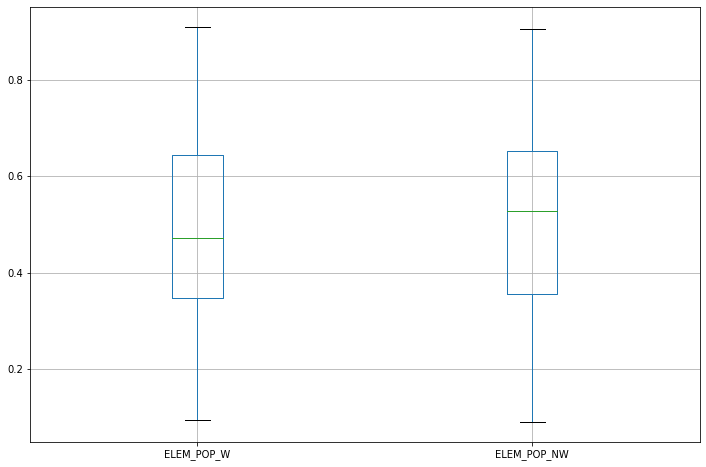

In [130]:
ax, props = new_spas_sa_grouped.boxplot(column=[whites, non_whites], figsize=(12,8), return_type='both')


## Output Plan 13

### Simulated Annealing (SA)

In [131]:
sa_output_df = retrieve_output_data('SA', 'ES', 13)
sa_output_df.head()

#To change everything down to SHC or TS

,SPA,NEW_ELEM_CODE
0,CL01,LUC
1,CL02,LUC
2,CL02.1,WAT
3,CL03,LUC
4,CL04,FHR


In [132]:
new_spas_sa = pd.merge(spas, sa_output_df, on='SPA')
new_spas_sa.head()

,OBJECTID,COUNT_,SPA,ELEM_,INT_,HIGH_,ELEM_CODE,MID_CODE,HIGH_CODE,DISTRICT,...,HIGH_POP_P,TOT_POP_A,TOT_POP_W,TOT_POP_M2,TOT_POP_B,TOT_POP_H,TOT_POP_N,TOT_POP_P,geometry,NEW_ELEM_CODE
0,1,5.0,WL03.4,126,205,311,LOV,HRM,WHS,WL,...,0,1,37,0,2,7,0,0,"POLYGON ((11725868.086 7152149.054, 11725870.6...",LOV
1,2,5.0,WL03,126,205,311,LOV,HRM,WHS,WL,...,0,0,83,5,0,6,1,0,"POLYGON ((11726805.147 7160565.439, 11726826.6...",LUC
2,3,5.0,WL27.2,118,202,305,HAM,BRM,LVH,WL,...,0,0,11,0,1,5,0,0,"POLYGON ((11720159.464 7099502.139, 11720172.1...",HAM
3,4,5.0,WL32.1,132,205,311,MTV,HRM,WHS,WL,...,0,8,205,14,8,23,1,0,"POLYGON ((11694466.485 7097608.657, 11694418.5...",EME
4,5,5.0,WL02,126,205,311,LOV,HRM,WHS,WL,...,0,9,170,3,0,5,0,0,"POLYGON ((11715899.154 7166497.655, 11715932.1...",LUC


In [133]:
new_spas_sa_ethnic = new_spas_sa[['NEW_{}_CODE'.format(grade) , asians, whites, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade), 'geometry']]
new_spas_sa_ethnic.loc[:, non_whites] = new_spas_sa_ethnic.loc[:, asians] +  new_spas_sa_ethnic.loc[:,blacks] +  new_spas_sa_ethnic.loc[:,mixed] \
                            + new_spas_sa_ethnic.loc[:,hispanics] + new_spas_sa_ethnic.loc[:,natives] + new_spas_sa_ethnic.loc[:,pacifics]
new_spas_sa_grouped_raw = new_spas_sa_ethnic.groupby(['NEW_{}_CODE'.format(grade) ]).sum()
new_spas_sa_grouped = new_spas_sa_grouped_raw.div(new_spas_sa_grouped_raw['ELEM_POP'], axis=0)
new_spas_sa_grouped.drop([asians, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade)], axis='columns', inplace=True)
new_spas_sa_grouped.head()

#when generalizing one place to change and use the FORMAT style

C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ELEM_POP_W,ELEM_POP_NW
NEW_ELEM_CODE,,
ALD,0.542268,0.457732
ALG,0.510417,0.489583
ASH,0.521151,0.478849
BAL,0.376117,0.623883
BAN,0.560976,0.439024


In [134]:
vals = np.concatenate([new_spas_sa_grouped.loc[i,:].values for i in interested_districts])
data_array[12,:] = vals

In [135]:
#NOTE: Run this only once or start from the previous cell on subsequent runs - since we use iterrows and create a new column, the calculated value will change on the next runs

import itertools

abs_diffs = []
for row in new_spas_sa_grouped.iterrows():
#     print([val for val in itertools.permutations(row[1], 2)])
#     break
    diffs = [abs(val[1] - val[0]) for val in itertools.permutations(row[1], 2)]
    total = sum(diffs)/2
    abs_diffs.append(total)

new_spas_sa_grouped.loc[:,'ABS_DIFF'] = abs_diffs
new_spas_sa_grouped.head()



,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
ALD,0.542268,0.457732,0.084536
ALG,0.510417,0.489583,0.020833
ASH,0.521151,0.478849,0.042301
BAL,0.376117,0.623883,0.247766
BAN,0.560976,0.439024,0.121951


In [136]:
segregated_abs_diff_sa13 = new_spas_sa_grouped[new_spas_sa_grouped['ABS_DIFF'] > 0.7]
segregated_abs_diff_sa13

#Absolute difference. For groups where absolute differences is greater than 70% we marked as outliers

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
LIN,0.869718,0.130282,0.739437
SUL,0.121951,0.878049,0.756098


In [137]:
ind_diss_sa13 = 0.5 * sum(abs(new_spas_sa_grouped[whites]/new_spas_sa_grouped[whites].sum() - new_spas_sa_grouped[non_whites]/new_spas_sa_grouped[non_whites].sum()))
ind_diss_sa13

0.3243581404451334

In [138]:
from numpy import log

entropy = -(new_spas_sa_grouped[non_whites]*log(new_spas_sa_grouped[non_whites]) + new_spas_sa_grouped[whites]*log(new_spas_sa_grouped[whites]))
entropy.replace(float('NaN'),0, inplace=True)

new_spas_sa_grouped.loc[:,'ENTROPY_IND'] = entropy

segregated_entropy_sa13 = new_spas_sa_grouped[new_spas_sa_grouped['ENTROPY_IND'] < 0.4]
segregated_entropy_sa13

# The maximum value for the entropy index (ENTROPY_IND) is ln(k), or ln 2 = 0.69. ie. a comparison between whites and non-whites
# • Districts with higher values of ENTROPY_IND are more diverse.
# • A district with ENTROPY_IND = 0.69 would have equal proportions of all groups.
# • A district with ENTROPY_IND = 0 contains only a single group
# • A lower ENTROPY_IND value depicts more segregation

# The ENTROPY_IND is a more valid segregation index and it gives a better view of segregation than the upper extreme whiskers even though some of the 
#districts that came up on the box plot coincided with that of the ENTROPY_IND.
# The ENTROPY_IND is for multiple criteria but because of the proportion of the pacific islanders which were almost insignificant and kept giving 
# making the ENTROPY_IND 0, making the necessary adjustment and treating whites and non-whites made more sense.

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF,ENTROPY_IND
NEW_ELEM_CODE,,,,
LIN,0.869718,0.130282,0.739437,0.386922
SUL,0.121951,0.878049,0.756098,0.370795


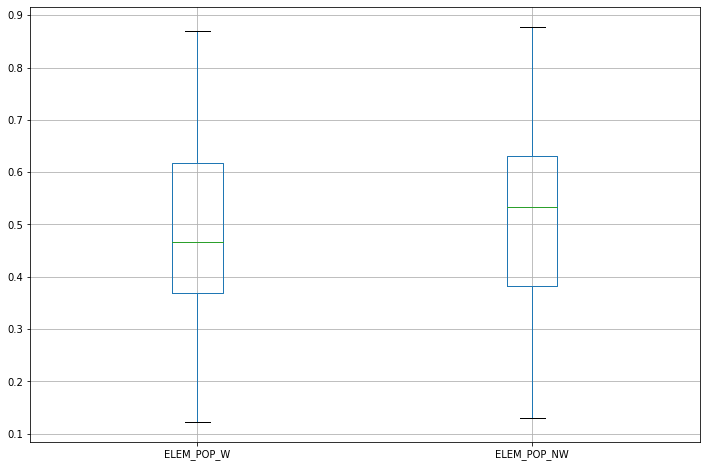

In [139]:
ax, props = new_spas_sa_grouped.boxplot(column=[whites, non_whites], figsize=(12,8), return_type='both')


## Output Plan 14

### Simulated Annealing (SA)

In [140]:
sa_output_df = retrieve_output_data('SA', 'ES', 14)
sa_output_df.head()

#To change everything down to SHC or TS

,SPA,NEW_ELEM_CODE
0,CL01,LUC
1,CL02,LUC
2,CL02.1,LUC
3,CL03,LUC
4,CL04,FHR


In [141]:
new_spas_sa = pd.merge(spas, sa_output_df, on='SPA')
new_spas_sa.head()

,OBJECTID,COUNT_,SPA,ELEM_,INT_,HIGH_,ELEM_CODE,MID_CODE,HIGH_CODE,DISTRICT,...,HIGH_POP_P,TOT_POP_A,TOT_POP_W,TOT_POP_M2,TOT_POP_B,TOT_POP_H,TOT_POP_N,TOT_POP_P,geometry,NEW_ELEM_CODE
0,1,5.0,WL03.4,126,205,311,LOV,HRM,WHS,WL,...,0,1,37,0,2,7,0,0,"POLYGON ((11725868.086 7152149.054, 11725870.6...",LOV
1,2,5.0,WL03,126,205,311,LOV,HRM,WHS,WL,...,0,0,83,5,0,6,1,0,"POLYGON ((11726805.147 7160565.439, 11726826.6...",LUC
2,3,5.0,WL27.2,118,202,305,HAM,BRM,LVH,WL,...,0,0,11,0,1,5,0,0,"POLYGON ((11720159.464 7099502.139, 11720172.1...",KWC
3,4,5.0,WL32.1,132,205,311,MTV,HRM,WHS,WL,...,0,8,205,14,8,23,1,0,"POLYGON ((11694466.485 7097608.657, 11694418.5...",RHL
4,5,5.0,WL02,126,205,311,LOV,HRM,WHS,WL,...,0,9,170,3,0,5,0,0,"POLYGON ((11715899.154 7166497.655, 11715932.1...",LOV


In [142]:
new_spas_sa_ethnic = new_spas_sa[['NEW_{}_CODE'.format(grade) , asians, whites, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade), 'geometry']]
new_spas_sa_ethnic.loc[:, non_whites] = new_spas_sa_ethnic.loc[:, asians] +  new_spas_sa_ethnic.loc[:,blacks] +  new_spas_sa_ethnic.loc[:,mixed] \
                            + new_spas_sa_ethnic.loc[:,hispanics] + new_spas_sa_ethnic.loc[:,natives] + new_spas_sa_ethnic.loc[:,pacifics]
new_spas_sa_grouped_raw = new_spas_sa_ethnic.groupby(['NEW_{}_CODE'.format(grade) ]).sum()
new_spas_sa_grouped = new_spas_sa_grouped_raw.div(new_spas_sa_grouped_raw['ELEM_POP'], axis=0)
new_spas_sa_grouped.drop([asians, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade)], axis='columns', inplace=True)
new_spas_sa_grouped.head()

#when generalizing one place to change and use the FORMAT style

C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ELEM_POP_W,ELEM_POP_NW
NEW_ELEM_CODE,,
ALD,0.572816,0.427184
ALG,0.440523,0.559477
ASH,0.404423,0.595577
BAL,0.387218,0.612782
BAN,0.667939,0.332061


In [143]:
vals = np.concatenate([new_spas_sa_grouped.loc[i,:].values for i in interested_districts])
data_array[13,:] = vals

In [144]:
#NOTE: Run this only once or start from the previous cell on subsequent runs - since we use iterrows and create a new column, the calculated value will change on the next runs

import itertools

abs_diffs = []
for row in new_spas_sa_grouped.iterrows():
#     print([val for val in itertools.permutations(row[1], 2)])
#     break
    diffs = [abs(val[1] - val[0]) for val in itertools.permutations(row[1], 2)]
    total = sum(diffs)/2
    abs_diffs.append(total)

new_spas_sa_grouped.loc[:,'ABS_DIFF'] = abs_diffs
new_spas_sa_grouped.head()



,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
ALD,0.572816,0.427184,0.145631
ALG,0.440523,0.559477,0.118954
ASH,0.404423,0.595577,0.191153
BAL,0.387218,0.612782,0.225564
BAN,0.667939,0.332061,0.335878


In [145]:
segregated_abs_diff_sa14 = new_spas_sa_grouped[new_spas_sa_grouped['ABS_DIFF'] > 0.7]
segregated_abs_diff_sa14

#Absolute difference. For groups where absolute differences is greater than 70% we marked as outliers

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
GUI,0.080997,0.919003,0.838006
HAM,0.859873,0.140127,0.719745
LIN,0.859287,0.140713,0.718574
SUL,0.127976,0.872024,0.744048


In [146]:
ind_diss_sa14 = 0.5 * sum(abs(new_spas_sa_grouped[whites]/new_spas_sa_grouped[whites].sum() - new_spas_sa_grouped[non_whites]/new_spas_sa_grouped[non_whites].sum()))
ind_diss_sa14

0.310957256147372

In [147]:
from numpy import log

entropy = -(new_spas_sa_grouped[non_whites]*log(new_spas_sa_grouped[non_whites]) + new_spas_sa_grouped[whites]*log(new_spas_sa_grouped[whites]))
entropy.replace(float('NaN'),0, inplace=True)

new_spas_sa_grouped.loc[:,'ENTROPY_IND'] = entropy

segregated_entropy_sa14 = new_spas_sa_grouped[new_spas_sa_grouped['ENTROPY_IND'] < 0.4]
segregated_entropy_sa14

# The maximum value for the entropy index (ENTROPY_IND) is ln(k), or ln 2 = 0.69. ie. a comparison between whites and non-whites
# • Districts with higher values of ENTROPY_IND are more diverse.
# • A district with ENTROPY_IND = 0.69 would have equal proportions of all groups.
# • A district with ENTROPY_IND = 0 contains only a single group
# • A lower ENTROPY_IND value depicts more segregation

# The ENTROPY_IND is a more valid segregation index and it gives a better view of segregation than the upper extreme whiskers even though some of the 
#districts that came up on the box plot coincided with that of the ENTROPY_IND.
# The ENTROPY_IND is for multiple criteria but because of the proportion of the pacific islanders which were almost insignificant and kept giving 
# making the ENTROPY_IND 0, making the necessary adjustment and treating whites and non-whites made more sense.

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF,ENTROPY_IND
NEW_ELEM_CODE,,,,
GUI,0.080997,0.919003,0.838006,0.281197
SUL,0.127976,0.872024,0.744048,0.382521


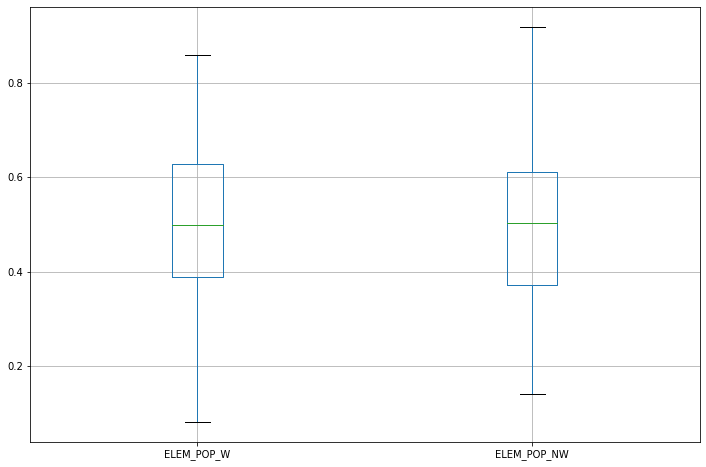

In [148]:
ax, props = new_spas_sa_grouped.boxplot(column=[whites, non_whites], figsize=(12,8), return_type='both')


## Output Plan 15

### Simulated Annealing (SA)

In [149]:
sa_output_df = retrieve_output_data('SA', 'ES', 15)
sa_output_df.head()

#To change everything down to SHC or TS

,SPA,NEW_ELEM_CODE
0,CL01,LUC
1,CL02,LUC
2,CL02.1,LUC
3,CL03,FHR
4,CL04,FHR


In [150]:
new_spas_sa = pd.merge(spas, sa_output_df, on='SPA')
new_spas_sa.head()

,OBJECTID,COUNT_,SPA,ELEM_,INT_,HIGH_,ELEM_CODE,MID_CODE,HIGH_CODE,DISTRICT,...,HIGH_POP_P,TOT_POP_A,TOT_POP_W,TOT_POP_M2,TOT_POP_B,TOT_POP_H,TOT_POP_N,TOT_POP_P,geometry,NEW_ELEM_CODE
0,1,5.0,WL03.4,126,205,311,LOV,HRM,WHS,WL,...,0,1,37,0,2,7,0,0,"POLYGON ((11725868.086 7152149.054, 11725870.6...",LUC
1,2,5.0,WL03,126,205,311,LOV,HRM,WHS,WL,...,0,0,83,5,0,6,1,0,"POLYGON ((11726805.147 7160565.439, 11726826.6...",LOV
2,3,5.0,WL27.2,118,202,305,HAM,BRM,LVH,WL,...,0,0,11,0,1,5,0,0,"POLYGON ((11720159.464 7099502.139, 11720172.1...",KWC
3,4,5.0,WL32.1,132,205,311,MTV,HRM,WHS,WL,...,0,8,205,14,8,23,1,0,"POLYGON ((11694466.485 7097608.657, 11694418.5...",EME
4,5,5.0,WL02,126,205,311,LOV,HRM,WHS,WL,...,0,9,170,3,0,5,0,0,"POLYGON ((11715899.154 7166497.655, 11715932.1...",LOV


In [151]:
new_spas_sa_ethnic = new_spas_sa[['NEW_{}_CODE'.format(grade) , asians, whites, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade), 'geometry']]
new_spas_sa_ethnic.loc[:, non_whites] = new_spas_sa_ethnic.loc[:, asians] +  new_spas_sa_ethnic.loc[:,blacks] +  new_spas_sa_ethnic.loc[:,mixed] \
                            + new_spas_sa_ethnic.loc[:,hispanics] + new_spas_sa_ethnic.loc[:,natives] + new_spas_sa_ethnic.loc[:,pacifics]
new_spas_sa_grouped_raw = new_spas_sa_ethnic.groupby(['NEW_{}_CODE'.format(grade) ]).sum()
new_spas_sa_grouped = new_spas_sa_grouped_raw.div(new_spas_sa_grouped_raw['ELEM_POP'], axis=0)
new_spas_sa_grouped.drop([asians, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade)], axis='columns', inplace=True)
new_spas_sa_grouped.head()

#when generalizing one place to change and use the FORMAT style

C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ELEM_POP_W,ELEM_POP_NW
NEW_ELEM_CODE,,
ALD,0.680217,0.319783
ALG,0.607345,0.392655
ASH,0.389241,0.610759
BAL,0.532481,0.467519
BAN,0.625000,0.375000


In [152]:
vals = np.concatenate([new_spas_sa_grouped.loc[i,:].values for i in interested_districts])
data_array[14,:] = vals

In [153]:
#NOTE: Run this only once or start from the previous cell on subsequent runs - since we use iterrows and create a new column, the calculated value will change on the next runs

import itertools

abs_diffs = []
for row in new_spas_sa_grouped.iterrows():
#     print([val for val in itertools.permutations(row[1], 2)])
#     break
    diffs = [abs(val[1] - val[0]) for val in itertools.permutations(row[1], 2)]
    total = sum(diffs)/2
    abs_diffs.append(total)

new_spas_sa_grouped.loc[:,'ABS_DIFF'] = abs_diffs
new_spas_sa_grouped.head()



,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
ALD,0.680217,0.319783,0.360434
ALG,0.607345,0.392655,0.214689
ASH,0.389241,0.610759,0.221519
BAL,0.532481,0.467519,0.064963
BAN,0.625000,0.375000,0.250000


In [154]:
segregated_abs_diff_sa15 = new_spas_sa_grouped[new_spas_sa_grouped['ABS_DIFF'] > 0.7]
segregated_abs_diff_sa15

#Absolute difference. For groups where absolute differences is greater than 70% we marked as outliers

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
FDE,0.141361,0.858639,0.717277
GUI,0.138175,0.861825,0.723649
HAM,0.877133,0.122867,0.754266
KWC,0.850299,0.149701,0.700599
LIN,0.866803,0.133197,0.733607
SUL,0.127714,0.872286,0.744572


In [155]:
ind_diss_sa15 = 0.5 * sum(abs(new_spas_sa_grouped[whites]/new_spas_sa_grouped[whites].sum() - new_spas_sa_grouped[non_whites]/new_spas_sa_grouped[non_whites].sum()))
ind_diss_sa15

0.3207857577050129

In [156]:
from numpy import log

entropy = -(new_spas_sa_grouped[non_whites]*log(new_spas_sa_grouped[non_whites]) + new_spas_sa_grouped[whites]*log(new_spas_sa_grouped[whites]))
entropy.replace(float('NaN'),0, inplace=True)

new_spas_sa_grouped.loc[:,'ENTROPY_IND'] = entropy

segregated_entropy_sa15 = new_spas_sa_grouped[new_spas_sa_grouped['ENTROPY_IND'] < 0.4]
segregated_entropy_sa15

# The maximum value for the entropy index (ENTROPY_IND) is ln(k), or ln 2 = 0.69. ie. a comparison between whites and non-whites
# • Districts with higher values of ENTROPY_IND are more diverse.
# • A district with ENTROPY_IND = 0.69 would have equal proportions of all groups.
# • A district with ENTROPY_IND = 0 contains only a single group
# • A lower ENTROPY_IND value depicts more segregation

# The ENTROPY_IND is a more valid segregation index and it gives a better view of segregation than the upper extreme whiskers even though some of the 
#districts that came up on the box plot coincided with that of the ENTROPY_IND.
# The ENTROPY_IND is for multiple criteria but because of the proportion of the pacific islanders which were almost insignificant and kept giving 
# making the ENTROPY_IND 0, making the necessary adjustment and treating whites and non-whites made more sense.

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF,ENTROPY_IND
NEW_ELEM_CODE,,,,
HAM,0.877133,0.122867,0.754266,0.372598
LIN,0.866803,0.133197,0.733607,0.392419
SUL,0.127714,0.872286,0.744572,0.382018


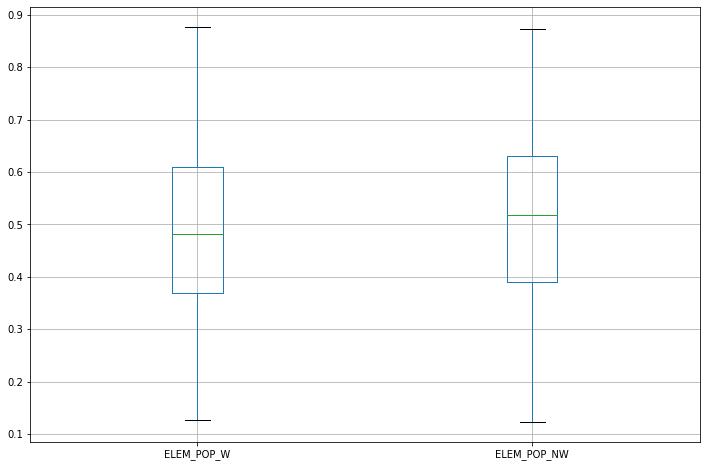

In [157]:
ax, props = new_spas_sa_grouped.boxplot(column=[whites, non_whites], figsize=(12,8), return_type='both')


## Output Plan 16

### Simulated Annealing (SA)

In [158]:
sa_output_df = retrieve_output_data('SA', 'ES', 16)
sa_output_df.head()

#To change everything down to SHC or TS

,SPA,NEW_ELEM_CODE
0,CL01,LUC
1,CL02,LUC
2,CL02.1,LUC
3,CL03,LUC
4,CL04,FHR


In [159]:
new_spas_sa = pd.merge(spas, sa_output_df, on='SPA')
new_spas_sa.head()

,OBJECTID,COUNT_,SPA,ELEM_,INT_,HIGH_,ELEM_CODE,MID_CODE,HIGH_CODE,DISTRICT,...,HIGH_POP_P,TOT_POP_A,TOT_POP_W,TOT_POP_M2,TOT_POP_B,TOT_POP_H,TOT_POP_N,TOT_POP_P,geometry,NEW_ELEM_CODE
0,1,5.0,WL03.4,126,205,311,LOV,HRM,WHS,WL,...,0,1,37,0,2,7,0,0,"POLYGON ((11725868.086 7152149.054, 11725870.6...",LOV
1,2,5.0,WL03,126,205,311,LOV,HRM,WHS,WL,...,0,0,83,5,0,6,1,0,"POLYGON ((11726805.147 7160565.439, 11726826.6...",LUC
2,3,5.0,WL27.2,118,202,305,HAM,BRM,LVH,WL,...,0,0,11,0,1,5,0,0,"POLYGON ((11720159.464 7099502.139, 11720172.1...",KWC
3,4,5.0,WL32.1,132,205,311,MTV,HRM,WHS,WL,...,0,8,205,14,8,23,1,0,"POLYGON ((11694466.485 7097608.657, 11694418.5...",EME
4,5,5.0,WL02,126,205,311,LOV,HRM,WHS,WL,...,0,9,170,3,0,5,0,0,"POLYGON ((11715899.154 7166497.655, 11715932.1...",LOV


In [160]:
new_spas_sa_ethnic = new_spas_sa[['NEW_{}_CODE'.format(grade) , asians, whites, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade), 'geometry']]
new_spas_sa_ethnic.loc[:, non_whites] = new_spas_sa_ethnic.loc[:, asians] +  new_spas_sa_ethnic.loc[:,blacks] +  new_spas_sa_ethnic.loc[:,mixed] \
                            + new_spas_sa_ethnic.loc[:,hispanics] + new_spas_sa_ethnic.loc[:,natives] + new_spas_sa_ethnic.loc[:,pacifics]
new_spas_sa_grouped_raw = new_spas_sa_ethnic.groupby(['NEW_{}_CODE'.format(grade) ]).sum()
new_spas_sa_grouped = new_spas_sa_grouped_raw.div(new_spas_sa_grouped_raw['ELEM_POP'], axis=0)
new_spas_sa_grouped.drop([asians, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade)], axis='columns', inplace=True)
new_spas_sa_grouped.head()

#when generalizing one place to change and use the FORMAT style

C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ELEM_POP_W,ELEM_POP_NW
NEW_ELEM_CODE,,
ALD,0.578199,0.421801
ALG,0.597087,0.402913
ASH,0.456869,0.543131
BAL,0.616774,0.383226
BAN,0.564103,0.435897


In [161]:
vals = np.concatenate([new_spas_sa_grouped.loc[i,:].values for i in interested_districts])
data_array[15,:] = vals

In [162]:
#NOTE: Run this only once or start from the previous cell on subsequent runs - since we use iterrows and create a new column, the calculated value will change on the next runs

import itertools

abs_diffs = []
for row in new_spas_sa_grouped.iterrows():
#     print([val for val in itertools.permutations(row[1], 2)])
#     break
    diffs = [abs(val[1] - val[0]) for val in itertools.permutations(row[1], 2)]
    total = sum(diffs)/2
    abs_diffs.append(total)

new_spas_sa_grouped.loc[:,'ABS_DIFF'] = abs_diffs
new_spas_sa_grouped.head()



,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
ALD,0.578199,0.421801,0.156398
ALG,0.597087,0.402913,0.194175
ASH,0.456869,0.543131,0.086262
BAL,0.616774,0.383226,0.233548
BAN,0.564103,0.435897,0.128205


In [163]:
segregated_abs_diff_sa16 = new_spas_sa_grouped[new_spas_sa_grouped['ABS_DIFF'] > 0.7]
segregated_abs_diff_sa16

#Absolute difference. For groups where absolute differences is greater than 70% we marked as outliers

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
GUI,0.076712,0.923288,0.846575
HAM,0.897361,0.102639,0.794721
SUL,0.111111,0.888889,0.777778


In [164]:
ind_diss_sa16 = 0.5 * sum(abs(new_spas_sa_grouped[whites]/new_spas_sa_grouped[whites].sum() - new_spas_sa_grouped[non_whites]/new_spas_sa_grouped[non_whites].sum()))
ind_diss_sa16

0.3285990512997348

In [165]:
from numpy import log

entropy = -(new_spas_sa_grouped[non_whites]*log(new_spas_sa_grouped[non_whites]) + new_spas_sa_grouped[whites]*log(new_spas_sa_grouped[whites]))
entropy.replace(float('NaN'),0, inplace=True)

new_spas_sa_grouped.loc[:,'ENTROPY_IND'] = entropy

segregated_entropy_sa16 = new_spas_sa_grouped[new_spas_sa_grouped['ENTROPY_IND'] < 0.4]
segregated_entropy_sa16

# The maximum value for the entropy index (ENTROPY_IND) is ln(k), or ln 2 = 0.69. ie. a comparison between whites and non-whites
# • Districts with higher values of ENTROPY_IND are more diverse.
# • A district with ENTROPY_IND = 0.69 would have equal proportions of all groups.
# • A district with ENTROPY_IND = 0 contains only a single group
# • A lower ENTROPY_IND value depicts more segregation

# The ENTROPY_IND is a more valid segregation index and it gives a better view of segregation than the upper extreme whiskers even though some of the 
#districts that came up on the box plot coincided with that of the ENTROPY_IND.
# The ENTROPY_IND is for multiple criteria but because of the proportion of the pacific islanders which were almost insignificant and kept giving 
# making the ENTROPY_IND 0, making the necessary adjustment and treating whites and non-whites made more sense.

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF,ENTROPY_IND
NEW_ELEM_CODE,,,,
GUI,0.076712,0.923288,0.846575,0.270665
HAM,0.897361,0.102639,0.794721,0.330844
SUL,0.111111,0.888889,0.777778,0.348832


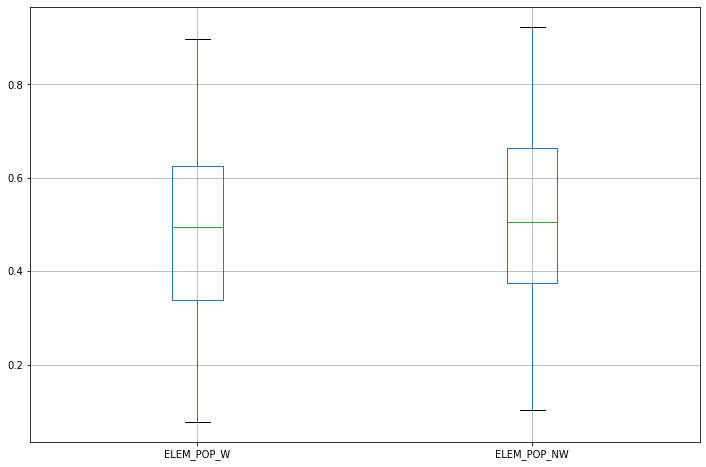

In [166]:
ax, props = new_spas_sa_grouped.boxplot(column=[whites, non_whites], figsize=(12,8), return_type='both')


## Output Plan 17

### Simulated Annealing (SA)

In [167]:
sa_output_df = retrieve_output_data('SA', 'ES', 17)
sa_output_df.head()

#To change everything down to SHC or TS

,SPA,NEW_ELEM_CODE
0,CL01,LUC
1,CL02,LUC
2,CL02.1,WAT
3,CL03,LUC
4,CL04,FHR


In [168]:
new_spas_sa = pd.merge(spas, sa_output_df, on='SPA')
new_spas_sa.head()

,OBJECTID,COUNT_,SPA,ELEM_,INT_,HIGH_,ELEM_CODE,MID_CODE,HIGH_CODE,DISTRICT,...,HIGH_POP_P,TOT_POP_A,TOT_POP_W,TOT_POP_M2,TOT_POP_B,TOT_POP_H,TOT_POP_N,TOT_POP_P,geometry,NEW_ELEM_CODE
0,1,5.0,WL03.4,126,205,311,LOV,HRM,WHS,WL,...,0,1,37,0,2,7,0,0,"POLYGON ((11725868.086 7152149.054, 11725870.6...",LOV
1,2,5.0,WL03,126,205,311,LOV,HRM,WHS,WL,...,0,0,83,5,0,6,1,0,"POLYGON ((11726805.147 7160565.439, 11726826.6...",LOV
2,3,5.0,WL27.2,118,202,305,HAM,BRM,LVH,WL,...,0,0,11,0,1,5,0,0,"POLYGON ((11720159.464 7099502.139, 11720172.1...",KWC
3,4,5.0,WL32.1,132,205,311,MTV,HRM,WHS,WL,...,0,8,205,14,8,23,1,0,"POLYGON ((11694466.485 7097608.657, 11694418.5...",RHL
4,5,5.0,WL02,126,205,311,LOV,HRM,WHS,WL,...,0,9,170,3,0,5,0,0,"POLYGON ((11715899.154 7166497.655, 11715932.1...",LOV


In [169]:
new_spas_sa_ethnic = new_spas_sa[['NEW_{}_CODE'.format(grade) , asians, whites, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade), 'geometry']]
new_spas_sa_ethnic.loc[:, non_whites] = new_spas_sa_ethnic.loc[:, asians] +  new_spas_sa_ethnic.loc[:,blacks] +  new_spas_sa_ethnic.loc[:,mixed] \
                            + new_spas_sa_ethnic.loc[:,hispanics] + new_spas_sa_ethnic.loc[:,natives] + new_spas_sa_ethnic.loc[:,pacifics]
new_spas_sa_grouped_raw = new_spas_sa_ethnic.groupby(['NEW_{}_CODE'.format(grade) ]).sum()
new_spas_sa_grouped = new_spas_sa_grouped_raw.div(new_spas_sa_grouped_raw['ELEM_POP'], axis=0)
new_spas_sa_grouped.drop([asians, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade)], axis='columns', inplace=True)
new_spas_sa_grouped.head()

#when generalizing one place to change and use the FORMAT style

C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ELEM_POP_W,ELEM_POP_NW
NEW_ELEM_CODE,,
ALD,0.564767,0.435233
ALG,0.618037,0.381963
ASH,0.458262,0.541738
BAL,0.359897,0.640103
BAN,0.539823,0.460177


In [170]:
vals = np.concatenate([new_spas_sa_grouped.loc[i,:].values for i in interested_districts])
data_array[16,:] = vals

In [171]:
#NOTE: Run this only once or start from the previous cell on subsequent runs - since we use iterrows and create a new column, the calculated value will change on the next runs

import itertools

abs_diffs = []
for row in new_spas_sa_grouped.iterrows():
#     print([val for val in itertools.permutations(row[1], 2)])
#     break
    diffs = [abs(val[1] - val[0]) for val in itertools.permutations(row[1], 2)]
    total = sum(diffs)/2
    abs_diffs.append(total)

new_spas_sa_grouped.loc[:,'ABS_DIFF'] = abs_diffs
new_spas_sa_grouped.head()



,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
ALD,0.564767,0.435233,0.129534
ALG,0.618037,0.381963,0.236074
ASH,0.458262,0.541738,0.083475
BAL,0.359897,0.640103,0.280206
BAN,0.539823,0.460177,0.079646


In [172]:
segregated_abs_diff_sa17 = new_spas_sa_grouped[new_spas_sa_grouped['ABS_DIFF'] > 0.7]
segregated_abs_diff_sa17

#Absolute difference. For groups where absolute differences is greater than 70% we marked as outliers

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
GUI,0.067669,0.932331,0.864662
HAM,0.856000,0.144000,0.712000
STE,0.141753,0.858247,0.716495


In [173]:
ind_diss_sa17 = 0.5 * sum(abs(new_spas_sa_grouped[whites]/new_spas_sa_grouped[whites].sum() - new_spas_sa_grouped[non_whites]/new_spas_sa_grouped[non_whites].sum()))
ind_diss_sa17

0.318642461459545

In [174]:
from numpy import log

entropy = -(new_spas_sa_grouped[non_whites]*log(new_spas_sa_grouped[non_whites]) + new_spas_sa_grouped[whites]*log(new_spas_sa_grouped[whites]))
entropy.replace(float('NaN'),0, inplace=True)

new_spas_sa_grouped.loc[:,'ENTROPY_IND'] = entropy

segregated_entropy_sa17 = new_spas_sa_grouped[new_spas_sa_grouped['ENTROPY_IND'] < 0.4]
segregated_entropy_sa17

# The maximum value for the entropy index (ENTROPY_IND) is ln(k), or ln 2 = 0.69. ie. a comparison between whites and non-whites
# • Districts with higher values of ENTROPY_IND are more diverse.
# • A district with ENTROPY_IND = 0.69 would have equal proportions of all groups.
# • A district with ENTROPY_IND = 0 contains only a single group
# • A lower ENTROPY_IND value depicts more segregation

# The ENTROPY_IND is a more valid segregation index and it gives a better view of segregation than the upper extreme whiskers even though some of the 
#districts that came up on the box plot coincided with that of the ENTROPY_IND.
# The ENTROPY_IND is for multiple criteria but because of the proportion of the pacific islanders which were almost insignificant and kept giving 
# making the ENTROPY_IND 0, making the necessary adjustment and treating whites and non-whites made more sense.

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF,ENTROPY_IND
NEW_ELEM_CODE,,,,
GUI,0.067669,0.932331,0.864662,0.247568


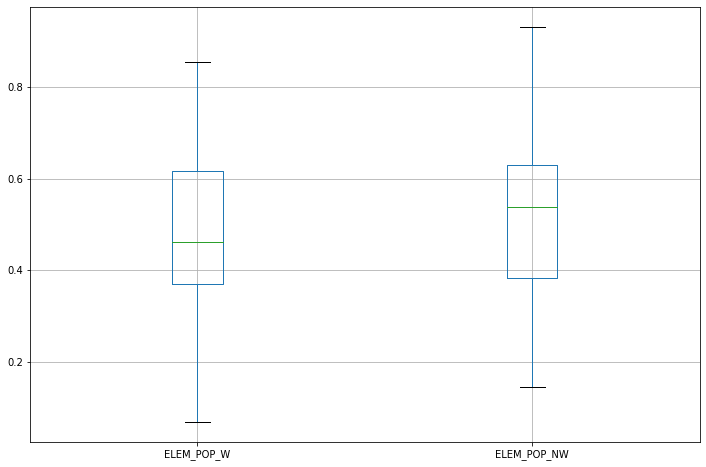

In [175]:
ax, props = new_spas_sa_grouped.boxplot(column=[whites, non_whites], figsize=(12,8), return_type='both')


## Output Plan 18

### Simulated Annealing (SA)

In [176]:
sa_output_df = retrieve_output_data('SA', 'ES', 18)
sa_output_df.head()

#To change everything down to SHC or TS

,SPA,NEW_ELEM_CODE
0,CL01,LUC
1,CL02,LUC
2,CL02.1,LUC
3,CL03,LUC
4,CL04,FHR


In [177]:
new_spas_sa = pd.merge(spas, sa_output_df, on='SPA')
new_spas_sa.head()

,OBJECTID,COUNT_,SPA,ELEM_,INT_,HIGH_,ELEM_CODE,MID_CODE,HIGH_CODE,DISTRICT,...,HIGH_POP_P,TOT_POP_A,TOT_POP_W,TOT_POP_M2,TOT_POP_B,TOT_POP_H,TOT_POP_N,TOT_POP_P,geometry,NEW_ELEM_CODE
0,1,5.0,WL03.4,126,205,311,LOV,HRM,WHS,WL,...,0,1,37,0,2,7,0,0,"POLYGON ((11725868.086 7152149.054, 11725870.6...",LOV
1,2,5.0,WL03,126,205,311,LOV,HRM,WHS,WL,...,0,0,83,5,0,6,1,0,"POLYGON ((11726805.147 7160565.439, 11726826.6...",LOV
2,3,5.0,WL27.2,118,202,305,HAM,BRM,LVH,WL,...,0,0,11,0,1,5,0,0,"POLYGON ((11720159.464 7099502.139, 11720172.1...",KWC
3,4,5.0,WL32.1,132,205,311,MTV,HRM,WHS,WL,...,0,8,205,14,8,23,1,0,"POLYGON ((11694466.485 7097608.657, 11694418.5...",RHL
4,5,5.0,WL02,126,205,311,LOV,HRM,WHS,WL,...,0,9,170,3,0,5,0,0,"POLYGON ((11715899.154 7166497.655, 11715932.1...",LOV


In [178]:
new_spas_sa_ethnic = new_spas_sa[['NEW_{}_CODE'.format(grade) , asians, whites, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade), 'geometry']]
new_spas_sa_ethnic.loc[:, non_whites] = new_spas_sa_ethnic.loc[:, asians] +  new_spas_sa_ethnic.loc[:,blacks] +  new_spas_sa_ethnic.loc[:,mixed] \
                            + new_spas_sa_ethnic.loc[:,hispanics] + new_spas_sa_ethnic.loc[:,natives] + new_spas_sa_ethnic.loc[:,pacifics]
new_spas_sa_grouped_raw = new_spas_sa_ethnic.groupby(['NEW_{}_CODE'.format(grade) ]).sum()
new_spas_sa_grouped = new_spas_sa_grouped_raw.div(new_spas_sa_grouped_raw['ELEM_POP'], axis=0)
new_spas_sa_grouped.drop([asians, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade)], axis='columns', inplace=True)
new_spas_sa_grouped.head()

#when generalizing one place to change and use the FORMAT style

C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ELEM_POP_W,ELEM_POP_NW
NEW_ELEM_CODE,,
ALD,0.413333,0.586667
ALG,0.488112,0.511888
ASH,0.505608,0.494392
BAL,0.449514,0.550486
BAN,0.771160,0.228840


In [179]:
vals = np.concatenate([new_spas_sa_grouped.loc[i,:].values for i in interested_districts])
data_array[17,:] = vals

In [180]:
#NOTE: Run this only once or start from the previous cell on subsequent runs - since we use iterrows and create a new column, the calculated value will change on the next runs

import itertools

abs_diffs = []
for row in new_spas_sa_grouped.iterrows():
#     print([val for val in itertools.permutations(row[1], 2)])
#     break
    diffs = [abs(val[1] - val[0]) for val in itertools.permutations(row[1], 2)]
    total = sum(diffs)/2
    abs_diffs.append(total)

new_spas_sa_grouped.loc[:,'ABS_DIFF'] = abs_diffs
new_spas_sa_grouped.head()



,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
ALD,0.413333,0.586667,0.173333
ALG,0.488112,0.511888,0.023776
ASH,0.505608,0.494392,0.011217
BAL,0.449514,0.550486,0.100972
BAN,0.771160,0.228840,0.542320


In [181]:
segregated_abs_diff_sa18 = new_spas_sa_grouped[new_spas_sa_grouped['ABS_DIFF'] > 0.7]
segregated_abs_diff_sa18

#Absolute difference. For groups where absolute differences is greater than 70% we marked as outliers

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
HAM,0.859259,0.140741,0.718519
SUL,0.113475,0.886525,0.773050


In [182]:
ind_diss_sa18 = 0.5 * sum(abs(new_spas_sa_grouped[whites]/new_spas_sa_grouped[whites].sum() - new_spas_sa_grouped[non_whites]/new_spas_sa_grouped[non_whites].sum()))
ind_diss_sa18

0.3246013190404555

In [183]:
from numpy import log

entropy = -(new_spas_sa_grouped[non_whites]*log(new_spas_sa_grouped[non_whites]) + new_spas_sa_grouped[whites]*log(new_spas_sa_grouped[whites]))
entropy.replace(float('NaN'),0, inplace=True)

new_spas_sa_grouped.loc[:,'ENTROPY_IND'] = entropy

segregated_entropy_sa18 = new_spas_sa_grouped[new_spas_sa_grouped['ENTROPY_IND'] < 0.4]
segregated_entropy_sa18

# The maximum value for the entropy index (ENTROPY_IND) is ln(k), or ln 2 = 0.69. ie. a comparison between whites and non-whites
# • Districts with higher values of ENTROPY_IND are more diverse.
# • A district with ENTROPY_IND = 0.69 would have equal proportions of all groups.
# • A district with ENTROPY_IND = 0 contains only a single group
# • A lower ENTROPY_IND value depicts more segregation

# The ENTROPY_IND is a more valid segregation index and it gives a better view of segregation than the upper extreme whiskers even though some of the 
#districts that came up on the box plot coincided with that of the ENTROPY_IND.
# The ENTROPY_IND is for multiple criteria but because of the proportion of the pacific islanders which were almost insignificant and kept giving 
# making the ENTROPY_IND 0, making the necessary adjustment and treating whites and non-whites made more sense.

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF,ENTROPY_IND
NEW_ELEM_CODE,,,,
SUL,0.113475,0.886525,0.77305,0.35372


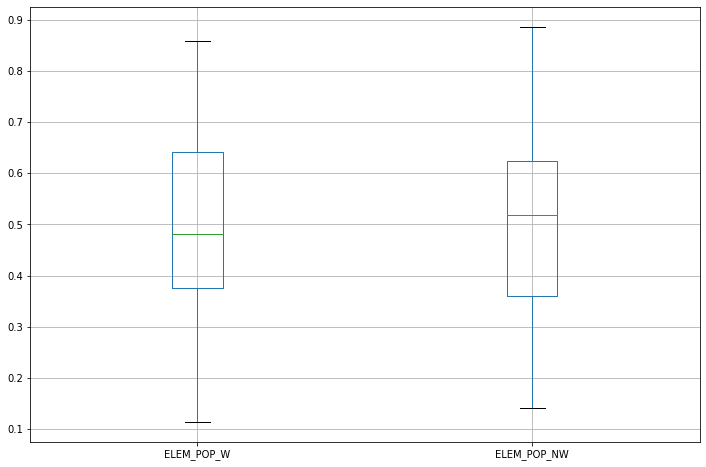

In [184]:
ax, props = new_spas_sa_grouped.boxplot(column=[whites, non_whites], figsize=(12,8), return_type='both')


## Output Plan 19

### Simulated Annealing (SA)

In [185]:
sa_output_df = retrieve_output_data('SA', 'ES', 19)
sa_output_df.head()

#To change everything down to SHC or TS

,SPA,NEW_ELEM_CODE
0,CL01,LUC
1,CL02,LUC
2,CL02.1,WAT
3,CL03,WAT
4,CL04,WAT


In [186]:
new_spas_sa = pd.merge(spas, sa_output_df, on='SPA')
new_spas_sa.head()

,OBJECTID,COUNT_,SPA,ELEM_,INT_,HIGH_,ELEM_CODE,MID_CODE,HIGH_CODE,DISTRICT,...,HIGH_POP_P,TOT_POP_A,TOT_POP_W,TOT_POP_M2,TOT_POP_B,TOT_POP_H,TOT_POP_N,TOT_POP_P,geometry,NEW_ELEM_CODE
0,1,5.0,WL03.4,126,205,311,LOV,HRM,WHS,WL,...,0,1,37,0,2,7,0,0,"POLYGON ((11725868.086 7152149.054, 11725870.6...",LOV
1,2,5.0,WL03,126,205,311,LOV,HRM,WHS,WL,...,0,0,83,5,0,6,1,0,"POLYGON ((11726805.147 7160565.439, 11726826.6...",LOV
2,3,5.0,WL27.2,118,202,305,HAM,BRM,LVH,WL,...,0,0,11,0,1,5,0,0,"POLYGON ((11720159.464 7099502.139, 11720172.1...",HAM
3,4,5.0,WL32.1,132,205,311,MTV,HRM,WHS,WL,...,0,8,205,14,8,23,1,0,"POLYGON ((11694466.485 7097608.657, 11694418.5...",RHL
4,5,5.0,WL02,126,205,311,LOV,HRM,WHS,WL,...,0,9,170,3,0,5,0,0,"POLYGON ((11715899.154 7166497.655, 11715932.1...",LOV


In [187]:
new_spas_sa_ethnic = new_spas_sa[['NEW_{}_CODE'.format(grade) , asians, whites, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade), 'geometry']]
new_spas_sa_ethnic.loc[:, non_whites] = new_spas_sa_ethnic.loc[:, asians] +  new_spas_sa_ethnic.loc[:,blacks] +  new_spas_sa_ethnic.loc[:,mixed] \
                            + new_spas_sa_ethnic.loc[:,hispanics] + new_spas_sa_ethnic.loc[:,natives] + new_spas_sa_ethnic.loc[:,pacifics]
new_spas_sa_grouped_raw = new_spas_sa_ethnic.groupby(['NEW_{}_CODE'.format(grade) ]).sum()
new_spas_sa_grouped = new_spas_sa_grouped_raw.div(new_spas_sa_grouped_raw['ELEM_POP'], axis=0)
new_spas_sa_grouped.drop([asians, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade)], axis='columns', inplace=True)
new_spas_sa_grouped.head()

#when generalizing one place to change and use the FORMAT style

C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ELEM_POP_W,ELEM_POP_NW
NEW_ELEM_CODE,,
ALD,0.558824,0.441176
ALG,0.423927,0.576073
ASH,0.503529,0.496471
BAL,0.547434,0.452566
BAN,0.699140,0.300860


In [188]:
vals = np.concatenate([new_spas_sa_grouped.loc[i,:].values for i in interested_districts])
data_array[18,:] = vals

In [189]:
#NOTE: Run this only once or start from the previous cell on subsequent runs - since we use iterrows and create a new column, the calculated value will change on the next runs

import itertools

abs_diffs = []
for row in new_spas_sa_grouped.iterrows():
#     print([val for val in itertools.permutations(row[1], 2)])
#     break
    diffs = [abs(val[1] - val[0]) for val in itertools.permutations(row[1], 2)]
    total = sum(diffs)/2
    abs_diffs.append(total)

new_spas_sa_grouped.loc[:,'ABS_DIFF'] = abs_diffs
new_spas_sa_grouped.head()



,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
ALD,0.558824,0.441176,0.117647
ALG,0.423927,0.576073,0.152146
ASH,0.503529,0.496471,0.007059
BAL,0.547434,0.452566,0.094868
BAN,0.699140,0.300860,0.398281


In [190]:
segregated_abs_diff_sa19 = new_spas_sa_grouped[new_spas_sa_grouped['ABS_DIFF'] > 0.7]
segregated_abs_diff_sa19

#Absolute difference. For groups where absolute differences is greater than 70% we marked as outliers

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
GUI,0.081044,0.918956,0.837912
LIN,0.860215,0.139785,0.720430
SUL,0.145995,0.854005,0.708010


In [191]:
ind_diss_sa19 = 0.5 * sum(abs(new_spas_sa_grouped[whites]/new_spas_sa_grouped[whites].sum() - new_spas_sa_grouped[non_whites]/new_spas_sa_grouped[non_whites].sum()))
ind_diss_sa19

0.3122454218896442

In [192]:
from numpy import log

entropy = -(new_spas_sa_grouped[non_whites]*log(new_spas_sa_grouped[non_whites]) + new_spas_sa_grouped[whites]*log(new_spas_sa_grouped[whites]))
entropy.replace(float('NaN'),0, inplace=True)

new_spas_sa_grouped.loc[:,'ENTROPY_IND'] = entropy

segregated_entropy_sa19 = new_spas_sa_grouped[new_spas_sa_grouped['ENTROPY_IND'] < 0.4]
segregated_entropy_sa19

# The maximum value for the entropy index (ENTROPY_IND) is ln(k), or ln 2 = 0.69. ie. a comparison between whites and non-whites
# • Districts with higher values of ENTROPY_IND are more diverse.
# • A district with ENTROPY_IND = 0.69 would have equal proportions of all groups.
# • A district with ENTROPY_IND = 0 contains only a single group
# • A lower ENTROPY_IND value depicts more segregation

# The ENTROPY_IND is a more valid segregation index and it gives a better view of segregation than the upper extreme whiskers even though some of the 
#districts that came up on the box plot coincided with that of the ENTROPY_IND.
# The ENTROPY_IND is for multiple criteria but because of the proportion of the pacific islanders which were almost insignificant and kept giving 
# making the ENTROPY_IND 0, making the necessary adjustment and treating whites and non-whites made more sense.

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF,ENTROPY_IND
NEW_ELEM_CODE,,,,
GUI,0.081044,0.918956,0.837912,0.281312


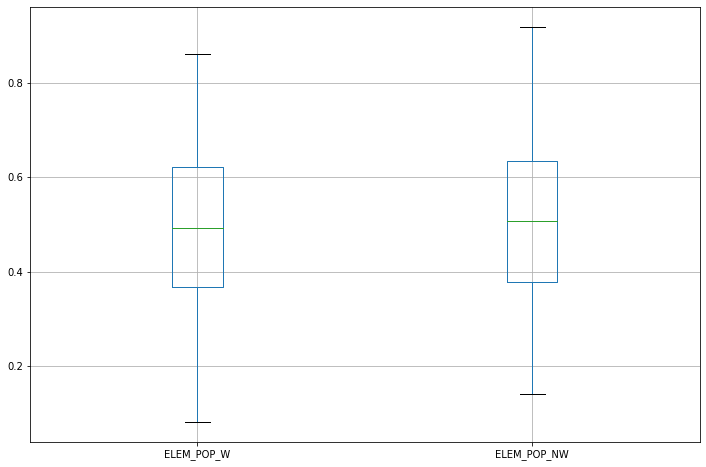

In [193]:
ax, props = new_spas_sa_grouped.boxplot(column=[whites, non_whites], figsize=(12,8), return_type='both')


## Output Plan 20

### Simulated Annealing (SA)

In [194]:
sa_output_df = retrieve_output_data('SA', 'ES', 20)
sa_output_df.head()

#To change everything down to SHC or TS

,SPA,NEW_ELEM_CODE
0,CL01,LUC
1,CL02,LUC
2,CL02.1,WAT
3,CL03,LUC
4,CL04,FHR


In [195]:
new_spas_sa = pd.merge(spas, sa_output_df, on='SPA')
new_spas_sa.head()

,OBJECTID,COUNT_,SPA,ELEM_,INT_,HIGH_,ELEM_CODE,MID_CODE,HIGH_CODE,DISTRICT,...,HIGH_POP_P,TOT_POP_A,TOT_POP_W,TOT_POP_M2,TOT_POP_B,TOT_POP_H,TOT_POP_N,TOT_POP_P,geometry,NEW_ELEM_CODE
0,1,5.0,WL03.4,126,205,311,LOV,HRM,WHS,WL,...,0,1,37,0,2,7,0,0,"POLYGON ((11725868.086 7152149.054, 11725870.6...",LOV
1,2,5.0,WL03,126,205,311,LOV,HRM,WHS,WL,...,0,0,83,5,0,6,1,0,"POLYGON ((11726805.147 7160565.439, 11726826.6...",LOV
2,3,5.0,WL27.2,118,202,305,HAM,BRM,LVH,WL,...,0,0,11,0,1,5,0,0,"POLYGON ((11720159.464 7099502.139, 11720172.1...",KWC
3,4,5.0,WL32.1,132,205,311,MTV,HRM,WHS,WL,...,0,8,205,14,8,23,1,0,"POLYGON ((11694466.485 7097608.657, 11694418.5...",EME
4,5,5.0,WL02,126,205,311,LOV,HRM,WHS,WL,...,0,9,170,3,0,5,0,0,"POLYGON ((11715899.154 7166497.655, 11715932.1...",LOV


In [196]:
new_spas_sa_ethnic = new_spas_sa[['NEW_{}_CODE'.format(grade) , asians, whites, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade), 'geometry']]
new_spas_sa_ethnic.loc[:, non_whites] = new_spas_sa_ethnic.loc[:, asians] +  new_spas_sa_ethnic.loc[:,blacks] +  new_spas_sa_ethnic.loc[:,mixed] \
                            + new_spas_sa_ethnic.loc[:,hispanics] + new_spas_sa_ethnic.loc[:,natives] + new_spas_sa_ethnic.loc[:,pacifics]
new_spas_sa_grouped_raw = new_spas_sa_ethnic.groupby(['NEW_{}_CODE'.format(grade) ]).sum()
new_spas_sa_grouped = new_spas_sa_grouped_raw.div(new_spas_sa_grouped_raw['ELEM_POP'], axis=0)
new_spas_sa_grouped.drop([asians, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade)], axis='columns', inplace=True)
new_spas_sa_grouped.head()

#when generalizing one place to change and use the FORMAT style

C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ELEM_POP_W,ELEM_POP_NW
NEW_ELEM_CODE,,
ALD,0.658031,0.341969
ALG,0.510417,0.489583
ASH,0.396040,0.603960
BAL,0.641809,0.358191
BAN,0.698980,0.301020


In [197]:
vals = np.concatenate([new_spas_sa_grouped.loc[i,:].values for i in interested_districts])
data_array[19,:] = vals

In [198]:
#NOTE: Run this only once or start from the previous cell on subsequent runs - since we use iterrows and create a new column, the calculated value will change on the next runs

import itertools

abs_diffs = []
for row in new_spas_sa_grouped.iterrows():
#     print([val for val in itertools.permutations(row[1], 2)])
#     break
    diffs = [abs(val[1] - val[0]) for val in itertools.permutations(row[1], 2)]
    total = sum(diffs)/2
    abs_diffs.append(total)

new_spas_sa_grouped.loc[:,'ABS_DIFF'] = abs_diffs
new_spas_sa_grouped.head()



,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
ALD,0.658031,0.341969,0.316062
ALG,0.510417,0.489583,0.020833
ASH,0.396040,0.603960,0.207921
BAL,0.641809,0.358191,0.283619
BAN,0.698980,0.301020,0.397959


In [199]:
segregated_abs_diff_sa20 = new_spas_sa_grouped[new_spas_sa_grouped['ABS_DIFF'] > 0.7]
segregated_abs_diff_sa20

#Absolute difference. For groups where absolute differences is greater than 70% we marked as outliers

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
FDE,0.119639,0.880361,0.760722
GUI,0.089918,0.910082,0.820163
HAM,0.861789,0.138211,0.723577
SUL,0.138075,0.861925,0.723849


In [200]:
ind_diss_sa20 = 0.5 * sum(abs(new_spas_sa_grouped[whites]/new_spas_sa_grouped[whites].sum() - new_spas_sa_grouped[non_whites]/new_spas_sa_grouped[non_whites].sum()))
ind_diss_sa20

0.3255822657323285

In [201]:
from numpy import log

entropy = -(new_spas_sa_grouped[non_whites]*log(new_spas_sa_grouped[non_whites]) + new_spas_sa_grouped[whites]*log(new_spas_sa_grouped[whites]))
entropy.replace(float('NaN'),0, inplace=True)

new_spas_sa_grouped.loc[:,'ENTROPY_IND'] = entropy

segregated_entropy_sa20 = new_spas_sa_grouped[new_spas_sa_grouped['ENTROPY_IND'] < 0.4]
segregated_entropy_sa20

# The maximum value for the entropy index (ENTROPY_IND) is ln(k), or ln 2 = 0.69. ie. a comparison between whites and non-whites
# • Districts with higher values of ENTROPY_IND are more diverse.
# • A district with ENTROPY_IND = 0.69 would have equal proportions of all groups.
# • A district with ENTROPY_IND = 0 contains only a single group
# • A lower ENTROPY_IND value depicts more segregation

# The ENTROPY_IND is a more valid segregation index and it gives a better view of segregation than the upper extreme whiskers even though some of the 
#districts that came up on the box plot coincided with that of the ENTROPY_IND.
# The ENTROPY_IND is for multiple criteria but because of the proportion of the pacific islanders which were almost insignificant and kept giving 
# making the ENTROPY_IND 0, making the necessary adjustment and treating whites and non-whites made more sense.

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF,ENTROPY_IND
NEW_ELEM_CODE,,,,
FDE,0.119639,0.880361,0.760722,0.366205
GUI,0.089918,0.910082,0.820163,0.302349


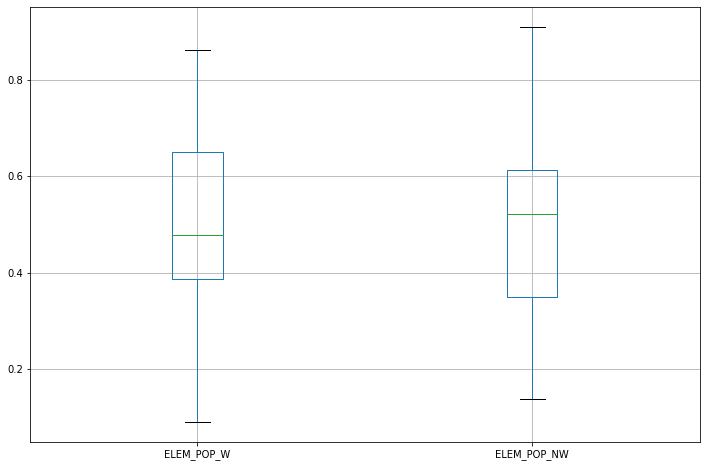

In [202]:
ax, props = new_spas_sa_grouped.boxplot(column=[whites, non_whites], figsize=(12,8), return_type='both')


## Output Plan 21

### Simulated Annealing (SA)

In [203]:
sa_output_df = retrieve_output_data('SA', 'ES', 21)
sa_output_df.head()

#To change everything down to SHC or TS

,SPA,NEW_ELEM_CODE
0,CL01,LUC
1,CL02,LUC
2,CL02.1,LUC
3,CL03,FHR
4,CL04,WAT


In [204]:
new_spas_sa = pd.merge(spas, sa_output_df, on='SPA')
new_spas_sa.head()

,OBJECTID,COUNT_,SPA,ELEM_,INT_,HIGH_,ELEM_CODE,MID_CODE,HIGH_CODE,DISTRICT,...,HIGH_POP_P,TOT_POP_A,TOT_POP_W,TOT_POP_M2,TOT_POP_B,TOT_POP_H,TOT_POP_N,TOT_POP_P,geometry,NEW_ELEM_CODE
0,1,5.0,WL03.4,126,205,311,LOV,HRM,WHS,WL,...,0,1,37,0,2,7,0,0,"POLYGON ((11725868.086 7152149.054, 11725870.6...",LOV
1,2,5.0,WL03,126,205,311,LOV,HRM,WHS,WL,...,0,0,83,5,0,6,1,0,"POLYGON ((11726805.147 7160565.439, 11726826.6...",LOV
2,3,5.0,WL27.2,118,202,305,HAM,BRM,LVH,WL,...,0,0,11,0,1,5,0,0,"POLYGON ((11720159.464 7099502.139, 11720172.1...",HAM
3,4,5.0,WL32.1,132,205,311,MTV,HRM,WHS,WL,...,0,8,205,14,8,23,1,0,"POLYGON ((11694466.485 7097608.657, 11694418.5...",RHL
4,5,5.0,WL02,126,205,311,LOV,HRM,WHS,WL,...,0,9,170,3,0,5,0,0,"POLYGON ((11715899.154 7166497.655, 11715932.1...",LOV


In [205]:
new_spas_sa_ethnic = new_spas_sa[['NEW_{}_CODE'.format(grade) , asians, whites, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade), 'geometry']]
new_spas_sa_ethnic.loc[:, non_whites] = new_spas_sa_ethnic.loc[:, asians] +  new_spas_sa_ethnic.loc[:,blacks] +  new_spas_sa_ethnic.loc[:,mixed] \
                            + new_spas_sa_ethnic.loc[:,hispanics] + new_spas_sa_ethnic.loc[:,natives] + new_spas_sa_ethnic.loc[:,pacifics]
new_spas_sa_grouped_raw = new_spas_sa_ethnic.groupby(['NEW_{}_CODE'.format(grade) ]).sum()
new_spas_sa_grouped = new_spas_sa_grouped_raw.div(new_spas_sa_grouped_raw['ELEM_POP'], axis=0)
new_spas_sa_grouped.drop([asians, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade)], axis='columns', inplace=True)
new_spas_sa_grouped.head()

#when generalizing one place to change and use the FORMAT style

C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ELEM_POP_W,ELEM_POP_NW
NEW_ELEM_CODE,,
ALD,0.595847,0.404153
ALG,0.435570,0.564430
ASH,0.529825,0.470175
BAL,0.588571,0.411429
BAN,0.636364,0.363636


In [206]:
vals = np.concatenate([new_spas_sa_grouped.loc[i,:].values for i in interested_districts])
data_array[20,:] = vals

In [207]:
#NOTE: Run this only once or start from the previous cell on subsequent runs - since we use iterrows and create a new column, the calculated value will change on the next runs

import itertools

abs_diffs = []
for row in new_spas_sa_grouped.iterrows():
#     print([val for val in itertools.permutations(row[1], 2)])
#     break
    diffs = [abs(val[1] - val[0]) for val in itertools.permutations(row[1], 2)]
    total = sum(diffs)/2
    abs_diffs.append(total)

new_spas_sa_grouped.loc[:,'ABS_DIFF'] = abs_diffs
new_spas_sa_grouped.head()



,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
ALD,0.595847,0.404153,0.191693
ALG,0.435570,0.564430,0.128860
ASH,0.529825,0.470175,0.059649
BAL,0.588571,0.411429,0.177143
BAN,0.636364,0.363636,0.272727


In [208]:
segregated_abs_diff_sa21 = new_spas_sa_grouped[new_spas_sa_grouped['ABS_DIFF'] > 0.7]
segregated_abs_diff_sa21

#Absolute difference. For groups where absolute differences is greater than 70% we marked as outliers

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
GUI,0.138475,0.861525,0.723050
LIN,0.854015,0.145985,0.708029
SUL,0.121951,0.878049,0.756098


In [209]:
ind_diss_sa21 = 0.5 * sum(abs(new_spas_sa_grouped[whites]/new_spas_sa_grouped[whites].sum() - new_spas_sa_grouped[non_whites]/new_spas_sa_grouped[non_whites].sum()))
ind_diss_sa21

0.3296818780391565

In [210]:
from numpy import log

entropy = -(new_spas_sa_grouped[non_whites]*log(new_spas_sa_grouped[non_whites]) + new_spas_sa_grouped[whites]*log(new_spas_sa_grouped[whites]))
entropy.replace(float('NaN'),0, inplace=True)

new_spas_sa_grouped.loc[:,'ENTROPY_IND'] = entropy

segregated_entropy_sa21 = new_spas_sa_grouped[new_spas_sa_grouped['ENTROPY_IND'] < 0.4]
segregated_entropy_sa21

# The maximum value for the entropy index (ENTROPY_IND) is ln(k), or ln 2 = 0.69. ie. a comparison between whites and non-whites
# • Districts with higher values of ENTROPY_IND are more diverse.
# • A district with ENTROPY_IND = 0.69 would have equal proportions of all groups.
# • A district with ENTROPY_IND = 0 contains only a single group
# • A lower ENTROPY_IND value depicts more segregation

# The ENTROPY_IND is a more valid segregation index and it gives a better view of segregation than the upper extreme whiskers even though some of the 
#districts that came up on the box plot coincided with that of the ENTROPY_IND.
# The ENTROPY_IND is for multiple criteria but because of the proportion of the pacific islanders which were almost insignificant and kept giving 
# making the ENTROPY_IND 0, making the necessary adjustment and treating whites and non-whites made more sense.

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF,ENTROPY_IND
NEW_ELEM_CODE,,,,
SUL,0.121951,0.878049,0.756098,0.370795


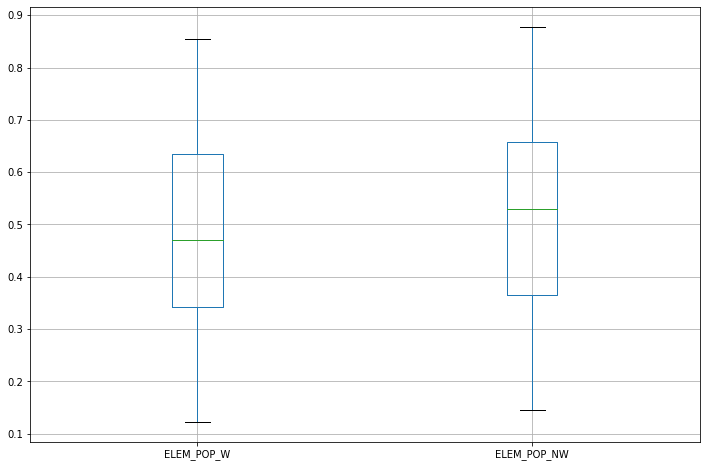

In [211]:
ax, props = new_spas_sa_grouped.boxplot(column=[whites, non_whites], figsize=(12,8), return_type='both')


## Output Plan 22

### Simulated Annealing (SA)

In [212]:
sa_output_df = retrieve_output_data('SA', 'ES', 22)
sa_output_df.head()

#To change everything down to SHC or TS

,SPA,NEW_ELEM_CODE
0,CL01,LUC
1,CL02,LUC
2,CL02.1,LUC
3,CL03,FHR
4,CL04,FHR


In [213]:
new_spas_sa = pd.merge(spas, sa_output_df, on='SPA')
new_spas_sa.head()

,OBJECTID,COUNT_,SPA,ELEM_,INT_,HIGH_,ELEM_CODE,MID_CODE,HIGH_CODE,DISTRICT,...,HIGH_POP_P,TOT_POP_A,TOT_POP_W,TOT_POP_M2,TOT_POP_B,TOT_POP_H,TOT_POP_N,TOT_POP_P,geometry,NEW_ELEM_CODE
0,1,5.0,WL03.4,126,205,311,LOV,HRM,WHS,WL,...,0,1,37,0,2,7,0,0,"POLYGON ((11725868.086 7152149.054, 11725870.6...",LOV
1,2,5.0,WL03,126,205,311,LOV,HRM,WHS,WL,...,0,0,83,5,0,6,1,0,"POLYGON ((11726805.147 7160565.439, 11726826.6...",LOV
2,3,5.0,WL27.2,118,202,305,HAM,BRM,LVH,WL,...,0,0,11,0,1,5,0,0,"POLYGON ((11720159.464 7099502.139, 11720172.1...",HAM
3,4,5.0,WL32.1,132,205,311,MTV,HRM,WHS,WL,...,0,8,205,14,8,23,1,0,"POLYGON ((11694466.485 7097608.657, 11694418.5...",EME
4,5,5.0,WL02,126,205,311,LOV,HRM,WHS,WL,...,0,9,170,3,0,5,0,0,"POLYGON ((11715899.154 7166497.655, 11715932.1...",LOV


In [214]:
new_spas_sa_ethnic = new_spas_sa[['NEW_{}_CODE'.format(grade) , asians, whites, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade), 'geometry']]
new_spas_sa_ethnic.loc[:, non_whites] = new_spas_sa_ethnic.loc[:, asians] +  new_spas_sa_ethnic.loc[:,blacks] +  new_spas_sa_ethnic.loc[:,mixed] \
                            + new_spas_sa_ethnic.loc[:,hispanics] + new_spas_sa_ethnic.loc[:,natives] + new_spas_sa_ethnic.loc[:,pacifics]
new_spas_sa_grouped_raw = new_spas_sa_ethnic.groupby(['NEW_{}_CODE'.format(grade) ]).sum()
new_spas_sa_grouped = new_spas_sa_grouped_raw.div(new_spas_sa_grouped_raw['ELEM_POP'], axis=0)
new_spas_sa_grouped.drop([asians, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade)], axis='columns', inplace=True)
new_spas_sa_grouped.head()

#when generalizing one place to change and use the FORMAT style

C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ELEM_POP_W,ELEM_POP_NW
NEW_ELEM_CODE,,
ALD,0.585714,0.414286
ALG,0.489917,0.510083
ASH,0.408309,0.591691
BAL,0.603734,0.396266
BAN,0.630435,0.369565


In [215]:
vals = np.concatenate([new_spas_sa_grouped.loc[i,:].values for i in interested_districts])
data_array[21,:] = vals

In [216]:
#NOTE: Run this only once or start from the previous cell on subsequent runs - since we use iterrows and create a new column, the calculated value will change on the next runs

import itertools

abs_diffs = []
for row in new_spas_sa_grouped.iterrows():
#     print([val for val in itertools.permutations(row[1], 2)])
#     break
    diffs = [abs(val[1] - val[0]) for val in itertools.permutations(row[1], 2)]
    total = sum(diffs)/2
    abs_diffs.append(total)

new_spas_sa_grouped.loc[:,'ABS_DIFF'] = abs_diffs
new_spas_sa_grouped.head()



,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
ALD,0.585714,0.414286,0.171429
ALG,0.489917,0.510083,0.020166
ASH,0.408309,0.591691,0.183381
BAL,0.603734,0.396266,0.207469
BAN,0.630435,0.369565,0.260870


In [217]:
segregated_abs_diff_sa22 = new_spas_sa_grouped[new_spas_sa_grouped['ABS_DIFF'] > 0.7]
segregated_abs_diff_sa22

#Absolute difference. For groups where absolute differences is greater than 70% we marked as outliers

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
KWC,0.913043,0.086957,0.826087
RLC,0.139400,0.860600,0.721200
SUL,0.109551,0.890449,0.780899
WAT,0.852000,0.148000,0.704000


In [218]:
ind_diss_sa22 = 0.5 * sum(abs(new_spas_sa_grouped[whites]/new_spas_sa_grouped[whites].sum() - new_spas_sa_grouped[non_whites]/new_spas_sa_grouped[non_whites].sum()))
ind_diss_sa22

0.33776213208353334

In [219]:
from numpy import log

entropy = -(new_spas_sa_grouped[non_whites]*log(new_spas_sa_grouped[non_whites]) + new_spas_sa_grouped[whites]*log(new_spas_sa_grouped[whites]))
entropy.replace(float('NaN'),0, inplace=True)

new_spas_sa_grouped.loc[:,'ENTROPY_IND'] = entropy

segregated_entropy_sa22 = new_spas_sa_grouped[new_spas_sa_grouped['ENTROPY_IND'] < 0.4]
segregated_entropy_sa22

# The maximum value for the entropy index (ENTROPY_IND) is ln(k), or ln 2 = 0.69. ie. a comparison between whites and non-whites
# • Districts with higher values of ENTROPY_IND are more diverse.
# • A district with ENTROPY_IND = 0.69 would have equal proportions of all groups.
# • A district with ENTROPY_IND = 0 contains only a single group
# • A lower ENTROPY_IND value depicts more segregation

# The ENTROPY_IND is a more valid segregation index and it gives a better view of segregation than the upper extreme whiskers even though some of the 
#districts that came up on the box plot coincided with that of the ENTROPY_IND.
# The ENTROPY_IND is for multiple criteria but because of the proportion of the pacific islanders which were almost insignificant and kept giving 
# making the ENTROPY_IND 0, making the necessary adjustment and treating whites and non-whites made more sense.

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF,ENTROPY_IND
NEW_ELEM_CODE,,,,
KWC,0.913043,0.086957,0.826087,0.295439
SUL,0.109551,0.890449,0.780899,0.345575


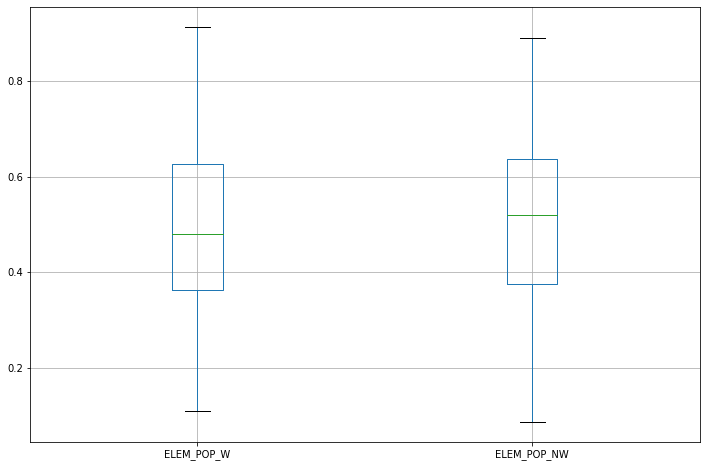

In [220]:
ax, props = new_spas_sa_grouped.boxplot(column=[whites, non_whites], figsize=(12,8), return_type='both')


## Output Plan 23

### Simulated Annealing (SA)

In [221]:
sa_output_df = retrieve_output_data('SA', 'ES', 23)
sa_output_df.head()

#To change everything down to SHC or TS

,SPA,NEW_ELEM_CODE
0,CL01,LUC
1,CL02,LUC
2,CL02.1,WAT
3,CL03,LUC
4,CL04,LUC


In [222]:
new_spas_sa = pd.merge(spas, sa_output_df, on='SPA')
new_spas_sa.head()

,OBJECTID,COUNT_,SPA,ELEM_,INT_,HIGH_,ELEM_CODE,MID_CODE,HIGH_CODE,DISTRICT,...,HIGH_POP_P,TOT_POP_A,TOT_POP_W,TOT_POP_M2,TOT_POP_B,TOT_POP_H,TOT_POP_N,TOT_POP_P,geometry,NEW_ELEM_CODE
0,1,5.0,WL03.4,126,205,311,LOV,HRM,WHS,WL,...,0,1,37,0,2,7,0,0,"POLYGON ((11725868.086 7152149.054, 11725870.6...",LUC
1,2,5.0,WL03,126,205,311,LOV,HRM,WHS,WL,...,0,0,83,5,0,6,1,0,"POLYGON ((11726805.147 7160565.439, 11726826.6...",LUC
2,3,5.0,WL27.2,118,202,305,HAM,BRM,LVH,WL,...,0,0,11,0,1,5,0,0,"POLYGON ((11720159.464 7099502.139, 11720172.1...",KWC
3,4,5.0,WL32.1,132,205,311,MTV,HRM,WHS,WL,...,0,8,205,14,8,23,1,0,"POLYGON ((11694466.485 7097608.657, 11694418.5...",RHL
4,5,5.0,WL02,126,205,311,LOV,HRM,WHS,WL,...,0,9,170,3,0,5,0,0,"POLYGON ((11715899.154 7166497.655, 11715932.1...",LOV


In [223]:
new_spas_sa_ethnic = new_spas_sa[['NEW_{}_CODE'.format(grade) , asians, whites, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade), 'geometry']]
new_spas_sa_ethnic.loc[:, non_whites] = new_spas_sa_ethnic.loc[:, asians] +  new_spas_sa_ethnic.loc[:,blacks] +  new_spas_sa_ethnic.loc[:,mixed] \
                            + new_spas_sa_ethnic.loc[:,hispanics] + new_spas_sa_ethnic.loc[:,natives] + new_spas_sa_ethnic.loc[:,pacifics]
new_spas_sa_grouped_raw = new_spas_sa_ethnic.groupby(['NEW_{}_CODE'.format(grade) ]).sum()
new_spas_sa_grouped = new_spas_sa_grouped_raw.div(new_spas_sa_grouped_raw['ELEM_POP'], axis=0)
new_spas_sa_grouped.drop([asians, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade)], axis='columns', inplace=True)
new_spas_sa_grouped.head()

#when generalizing one place to change and use the FORMAT style

C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ELEM_POP_W,ELEM_POP_NW
NEW_ELEM_CODE,,
ALD,0.449438,0.550562
ALG,0.640177,0.359823
ASH,0.528115,0.471885
BAL,0.348889,0.651111
BAN,0.789916,0.210084


In [224]:
vals = np.concatenate([new_spas_sa_grouped.loc[i,:].values for i in interested_districts])
data_array[22,:] = vals

In [225]:
#NOTE: Run this only once or start from the previous cell on subsequent runs - since we use iterrows and create a new column, the calculated value will change on the next runs

import itertools

abs_diffs = []
for row in new_spas_sa_grouped.iterrows():
#     print([val for val in itertools.permutations(row[1], 2)])
#     break
    diffs = [abs(val[1] - val[0]) for val in itertools.permutations(row[1], 2)]
    total = sum(diffs)/2
    abs_diffs.append(total)

new_spas_sa_grouped.loc[:,'ABS_DIFF'] = abs_diffs
new_spas_sa_grouped.head()



,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
ALD,0.449438,0.550562,0.101124
ALG,0.640177,0.359823,0.280353
ASH,0.528115,0.471885,0.056229
BAL,0.348889,0.651111,0.302222
BAN,0.789916,0.210084,0.579832


In [226]:
segregated_abs_diff_sa23 = new_spas_sa_grouped[new_spas_sa_grouped['ABS_DIFF'] > 0.7]
segregated_abs_diff_sa23

#Absolute difference. For groups where absolute differences is greater than 70% we marked as outliers

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
EVE,0.000000,1.000000,1.000000
FDE,0.142857,0.857143,0.714286
GUI,0.132832,0.867168,0.734336
SUL,0.103491,0.896509,0.793017


In [227]:
ind_diss_sa23 = 0.5 * sum(abs(new_spas_sa_grouped[whites]/new_spas_sa_grouped[whites].sum() - new_spas_sa_grouped[non_whites]/new_spas_sa_grouped[non_whites].sum()))
ind_diss_sa23

0.34617975703440934

In [228]:
from numpy import log

entropy = -(new_spas_sa_grouped[non_whites]*log(new_spas_sa_grouped[non_whites]) + new_spas_sa_grouped[whites]*log(new_spas_sa_grouped[whites]))
entropy.replace(float('NaN'),0, inplace=True)

new_spas_sa_grouped.loc[:,'ENTROPY_IND'] = entropy

segregated_entropy_sa23 = new_spas_sa_grouped[new_spas_sa_grouped['ENTROPY_IND'] < 0.4]
segregated_entropy_sa23

# The maximum value for the entropy index (ENTROPY_IND) is ln(k), or ln 2 = 0.69. ie. a comparison between whites and non-whites
# • Districts with higher values of ENTROPY_IND are more diverse.
# • A district with ENTROPY_IND = 0.69 would have equal proportions of all groups.
# • A district with ENTROPY_IND = 0 contains only a single group
# • A lower ENTROPY_IND value depicts more segregation

# The ENTROPY_IND is a more valid segregation index and it gives a better view of segregation than the upper extreme whiskers even though some of the 
#districts that came up on the box plot coincided with that of the ENTROPY_IND.
# The ENTROPY_IND is for multiple criteria but because of the proportion of the pacific islanders which were almost insignificant and kept giving 
# making the ENTROPY_IND 0, making the necessary adjustment and treating whites and non-whites made more sense.

C:\Users\james\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF,ENTROPY_IND
NEW_ELEM_CODE,,,,
EVE,0.000000,1.000000,1.000000,0.000000
GUI,0.132832,0.867168,0.734336,0.391735
SUL,0.103491,0.896509,0.793017,0.332687


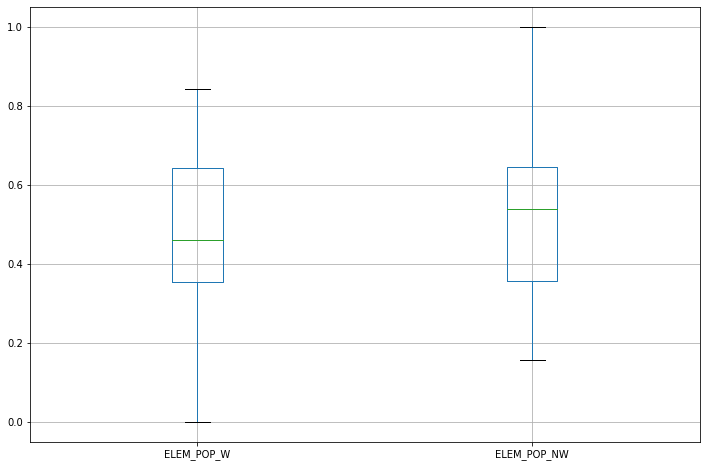

In [229]:
ax, props = new_spas_sa_grouped.boxplot(column=[whites, non_whites], figsize=(12,8), return_type='both')


## Output Plan 24

### Simulated Annealing (SA)

In [230]:
sa_output_df = retrieve_output_data('SA', 'ES', 24)
sa_output_df.head()

#To change everything down to SHC or TS

,SPA,NEW_ELEM_CODE
0,CL01,LUC
1,CL02,LUC
2,CL02.1,WAT
3,CL03,WAT
4,CL04,WAT


In [231]:
new_spas_sa = pd.merge(spas, sa_output_df, on='SPA')
new_spas_sa.head()

,OBJECTID,COUNT_,SPA,ELEM_,INT_,HIGH_,ELEM_CODE,MID_CODE,HIGH_CODE,DISTRICT,...,HIGH_POP_P,TOT_POP_A,TOT_POP_W,TOT_POP_M2,TOT_POP_B,TOT_POP_H,TOT_POP_N,TOT_POP_P,geometry,NEW_ELEM_CODE
0,1,5.0,WL03.4,126,205,311,LOV,HRM,WHS,WL,...,0,1,37,0,2,7,0,0,"POLYGON ((11725868.086 7152149.054, 11725870.6...",LOV
1,2,5.0,WL03,126,205,311,LOV,HRM,WHS,WL,...,0,0,83,5,0,6,1,0,"POLYGON ((11726805.147 7160565.439, 11726826.6...",LOV
2,3,5.0,WL27.2,118,202,305,HAM,BRM,LVH,WL,...,0,0,11,0,1,5,0,0,"POLYGON ((11720159.464 7099502.139, 11720172.1...",HAM
3,4,5.0,WL32.1,132,205,311,MTV,HRM,WHS,WL,...,0,8,205,14,8,23,1,0,"POLYGON ((11694466.485 7097608.657, 11694418.5...",RHL
4,5,5.0,WL02,126,205,311,LOV,HRM,WHS,WL,...,0,9,170,3,0,5,0,0,"POLYGON ((11715899.154 7166497.655, 11715932.1...",LOV


In [232]:
new_spas_sa_ethnic = new_spas_sa[['NEW_{}_CODE'.format(grade) , asians, whites, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade), 'geometry']]
new_spas_sa_ethnic.loc[:, non_whites] = new_spas_sa_ethnic.loc[:, asians] +  new_spas_sa_ethnic.loc[:,blacks] +  new_spas_sa_ethnic.loc[:,mixed] \
                            + new_spas_sa_ethnic.loc[:,hispanics] + new_spas_sa_ethnic.loc[:,natives] + new_spas_sa_ethnic.loc[:,pacifics]
new_spas_sa_grouped_raw = new_spas_sa_ethnic.groupby(['NEW_{}_CODE'.format(grade) ]).sum()
new_spas_sa_grouped = new_spas_sa_grouped_raw.div(new_spas_sa_grouped_raw['ELEM_POP'], axis=0)
new_spas_sa_grouped.drop([asians, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade)], axis='columns', inplace=True)
new_spas_sa_grouped.head()

#when generalizing one place to change and use the FORMAT style

C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ELEM_POP_W,ELEM_POP_NW
NEW_ELEM_CODE,,
ALD,0.506289,0.493711
ALG,0.509670,0.490330
ASH,0.495992,0.504008
BAL,0.470942,0.529058
BAN,0.702381,0.297619


In [233]:
vals = np.concatenate([new_spas_sa_grouped.loc[i,:].values for i in interested_districts])
data_array[23,:] = vals

In [234]:
#NOTE: Run this only once or start from the previous cell on subsequent runs - since we use iterrows and create a new column, the calculated value will change on the next runs

import itertools

abs_diffs = []
for row in new_spas_sa_grouped.iterrows():
#     print([val for val in itertools.permutations(row[1], 2)])
#     break
    diffs = [abs(val[1] - val[0]) for val in itertools.permutations(row[1], 2)]
    total = sum(diffs)/2
    abs_diffs.append(total)

new_spas_sa_grouped.loc[:,'ABS_DIFF'] = abs_diffs
new_spas_sa_grouped.head()



,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
ALD,0.506289,0.493711,0.012579
ALG,0.509670,0.490330,0.019340
ASH,0.495992,0.504008,0.008016
BAL,0.470942,0.529058,0.058116
BAN,0.702381,0.297619,0.404762


In [235]:
segregated_abs_diff_sa24 = new_spas_sa_grouped[new_spas_sa_grouped['ABS_DIFF'] > 0.7]
segregated_abs_diff_sa24

#Absolute difference. For groups where absolute differences is greater than 70% we marked as outliers

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
GUI,0.136275,0.863725,0.727451
HAM,0.862745,0.137255,0.725490


In [236]:
ind_diss_sa24 = 0.5 * sum(abs(new_spas_sa_grouped[whites]/new_spas_sa_grouped[whites].sum() - new_spas_sa_grouped[non_whites]/new_spas_sa_grouped[non_whites].sum()))
ind_diss_sa24

0.2916806175653218

In [237]:
from numpy import log

entropy = -(new_spas_sa_grouped[non_whites]*log(new_spas_sa_grouped[non_whites]) + new_spas_sa_grouped[whites]*log(new_spas_sa_grouped[whites]))
entropy.replace(float('NaN'),0, inplace=True)

new_spas_sa_grouped.loc[:,'ENTROPY_IND'] = entropy

segregated_entropy_sa24 = new_spas_sa_grouped[new_spas_sa_grouped['ENTROPY_IND'] < 0.4]
segregated_entropy_sa24

# The maximum value for the entropy index (ENTROPY_IND) is ln(k), or ln 2 = 0.69. ie. a comparison between whites and non-whites
# • Districts with higher values of ENTROPY_IND are more diverse.
# • A district with ENTROPY_IND = 0.69 would have equal proportions of all groups.
# • A district with ENTROPY_IND = 0 contains only a single group
# • A lower ENTROPY_IND value depicts more segregation

# The ENTROPY_IND is a more valid segregation index and it gives a better view of segregation than the upper extreme whiskers even though some of the 
#districts that came up on the box plot coincided with that of the ENTROPY_IND.
# The ENTROPY_IND is for multiple criteria but because of the proportion of the pacific islanders which were almost insignificant and kept giving 
# making the ENTROPY_IND 0, making the necessary adjustment and treating whites and non-whites made more sense.

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF,ENTROPY_IND
NEW_ELEM_CODE,,,,
GUI,0.136275,0.863725,0.727451,0.398143
HAM,0.862745,0.137255,0.725490,0.399949


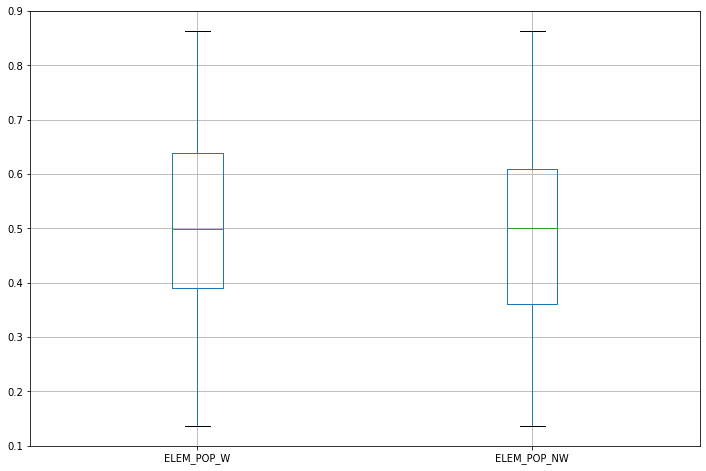

In [238]:
ax, props = new_spas_sa_grouped.boxplot(column=[whites, non_whites], figsize=(12,8), return_type='both')


## Output Plan 25

### Simulated Annealing (SA)

In [239]:
sa_output_df = retrieve_output_data('SA', 'ES', 25)
sa_output_df.head()

#To change everything down to SHC or TS

,SPA,NEW_ELEM_CODE
0,CL01,LUC
1,CL02,LUC
2,CL02.1,WAT
3,CL03,WAT
4,CL04,FHR


In [240]:
new_spas_sa = pd.merge(spas, sa_output_df, on='SPA')
new_spas_sa.head()

,OBJECTID,COUNT_,SPA,ELEM_,INT_,HIGH_,ELEM_CODE,MID_CODE,HIGH_CODE,DISTRICT,...,HIGH_POP_P,TOT_POP_A,TOT_POP_W,TOT_POP_M2,TOT_POP_B,TOT_POP_H,TOT_POP_N,TOT_POP_P,geometry,NEW_ELEM_CODE
0,1,5.0,WL03.4,126,205,311,LOV,HRM,WHS,WL,...,0,1,37,0,2,7,0,0,"POLYGON ((11725868.086 7152149.054, 11725870.6...",LOV
1,2,5.0,WL03,126,205,311,LOV,HRM,WHS,WL,...,0,0,83,5,0,6,1,0,"POLYGON ((11726805.147 7160565.439, 11726826.6...",LOV
2,3,5.0,WL27.2,118,202,305,HAM,BRM,LVH,WL,...,0,0,11,0,1,5,0,0,"POLYGON ((11720159.464 7099502.139, 11720172.1...",KWC
3,4,5.0,WL32.1,132,205,311,MTV,HRM,WHS,WL,...,0,8,205,14,8,23,1,0,"POLYGON ((11694466.485 7097608.657, 11694418.5...",RHL
4,5,5.0,WL02,126,205,311,LOV,HRM,WHS,WL,...,0,9,170,3,0,5,0,0,"POLYGON ((11715899.154 7166497.655, 11715932.1...",LOV


In [241]:
new_spas_sa_ethnic = new_spas_sa[['NEW_{}_CODE'.format(grade) , asians, whites, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade), 'geometry']]
new_spas_sa_ethnic.loc[:, non_whites] = new_spas_sa_ethnic.loc[:, asians] +  new_spas_sa_ethnic.loc[:,blacks] +  new_spas_sa_ethnic.loc[:,mixed] \
                            + new_spas_sa_ethnic.loc[:,hispanics] + new_spas_sa_ethnic.loc[:,natives] + new_spas_sa_ethnic.loc[:,pacifics]
new_spas_sa_grouped_raw = new_spas_sa_ethnic.groupby(['NEW_{}_CODE'.format(grade) ]).sum()
new_spas_sa_grouped = new_spas_sa_grouped_raw.div(new_spas_sa_grouped_raw['ELEM_POP'], axis=0)
new_spas_sa_grouped.drop([asians, mixed, blacks, hispanics, natives, pacifics, '{}_POP'.format(grade)], axis='columns', inplace=True)
new_spas_sa_grouped.head()

#when generalizing one place to change and use the FORMAT style

C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ELEM_POP_W,ELEM_POP_NW
NEW_ELEM_CODE,,
ALD,0.631373,0.368627
ALG,0.572707,0.427293
ASH,0.460925,0.539075
BAL,0.641316,0.358684
BAN,0.777228,0.222772


In [242]:
vals = np.concatenate([new_spas_sa_grouped.loc[i,:].values for i in interested_districts])
data_array[24,:] = vals

In [243]:
#NOTE: Run this only once or start from the previous cell on subsequent runs - since we use iterrows and create a new column, the calculated value will change on the next runs

import itertools

abs_diffs = []
for row in new_spas_sa_grouped.iterrows():
#     print([val for val in itertools.permutations(row[1], 2)])
#     break
    diffs = [abs(val[1] - val[0]) for val in itertools.permutations(row[1], 2)]
    total = sum(diffs)/2
    abs_diffs.append(total)

new_spas_sa_grouped.loc[:,'ABS_DIFF'] = abs_diffs
new_spas_sa_grouped.head()



,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
ALD,0.631373,0.368627,0.262745
ALG,0.572707,0.427293,0.145414
ASH,0.460925,0.539075,0.078150
BAL,0.641316,0.358684,0.282631
BAN,0.777228,0.222772,0.554455


In [244]:
segregated_abs_diff_sa25 = new_spas_sa_grouped[new_spas_sa_grouped['ABS_DIFF'] > 0.7]
segregated_abs_diff_sa25

#Absolute difference. For groups where absolute differences is greater than 70% we marked as outliers

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF
NEW_ELEM_CODE,,,
HAM,0.876712,0.123288,0.753425
LIN,0.863636,0.136364,0.727273
SUL,0.105546,0.894454,0.788909


In [245]:
ind_diss_sa25 = 0.5 * sum(abs(new_spas_sa_grouped[whites]/new_spas_sa_grouped[whites].sum() - new_spas_sa_grouped[non_whites]/new_spas_sa_grouped[non_whites].sum()))
ind_diss_sa25

0.33171192686747275

In [246]:
from numpy import log

entropy = -(new_spas_sa_grouped[non_whites]*log(new_spas_sa_grouped[non_whites]) + new_spas_sa_grouped[whites]*log(new_spas_sa_grouped[whites]))
entropy.replace(float('NaN'),0, inplace=True)

new_spas_sa_grouped.loc[:,'ENTROPY_IND'] = entropy

segregated_entropy_sa25 = new_spas_sa_grouped[new_spas_sa_grouped['ENTROPY_IND'] < 0.4]
segregated_entropy_sa25

# The maximum value for the entropy index (ENTROPY_IND) is ln(k), or ln 2 = 0.69. ie. a comparison between whites and non-whites
# • Districts with higher values of ENTROPY_IND are more diverse.
# • A district with ENTROPY_IND = 0.69 would have equal proportions of all groups.
# • A district with ENTROPY_IND = 0 contains only a single group
# • A lower ENTROPY_IND value depicts more segregation

# The ENTROPY_IND is a more valid segregation index and it gives a better view of segregation than the upper extreme whiskers even though some of the 
#districts that came up on the box plot coincided with that of the ENTROPY_IND.
# The ENTROPY_IND is for multiple criteria but because of the proportion of the pacific islanders which were almost insignificant and kept giving 
# making the ENTROPY_IND 0, making the necessary adjustment and treating whites and non-whites made more sense.

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF,ENTROPY_IND
NEW_ELEM_CODE,,,,
HAM,0.876712,0.123288,0.753425,0.373425
LIN,0.863636,0.136364,0.727273,0.398307
SUL,0.105546,0.894454,0.788909,0.337100


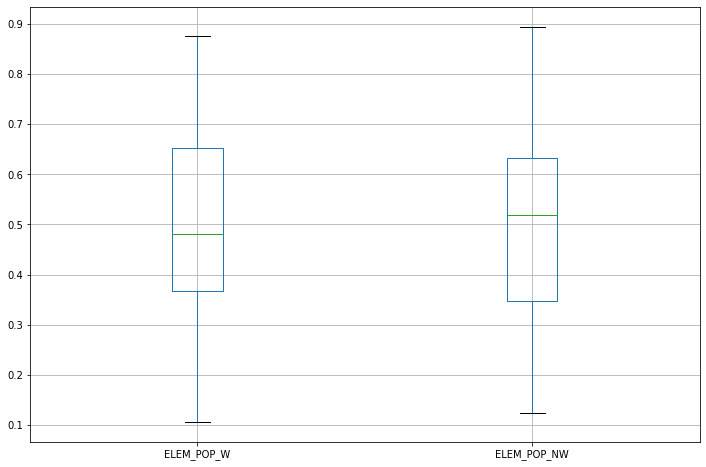

In [247]:
ax, props = new_spas_sa_grouped.boxplot(column=[whites, non_whites], figsize=(12,8), return_type='both')


## Conclusions for New Data after Algorithms


Overall, using the dissimilarity index (~ 0.3), there does not appear to be much segregation within the districts.

However, individually, using the absolute differences (0.7 cut-off) and entropy index (0.4 cut-off), there seems to be evidence of segregation in some districts. Anywhere there is a clear match of districts between the absolute differences (0.7 cut-off) and entropy index (0.4 cut-off), we deem such districts worth investigating. For example, for output plans 1, 2, 3, 7, 10, 13, 16, 24 and 25 there was a clear match of districts. We plot one such match of output 25 for HAM, LIN, and SUL. 
There were other cases where there was a partial match. We deem those districts that matched worth investigating also. For example, for output plans 4, 5, 6, 8, 9, 11, 12, 14, 15, 17, 18, 19, 20, 21, 22, and 23. There are no clear winners here. 


In [248]:
print(segregated_abs_diff_sa1)
print(segregated_abs_diff_sa2)
print(segregated_abs_diff_sa3)
print(segregated_abs_diff_sa4)
print(segregated_abs_diff_sa5)
print(segregated_abs_diff_sa6)
print(segregated_abs_diff_sa7)
print(segregated_abs_diff_sa8)
print(segregated_abs_diff_sa9)
print(segregated_abs_diff_sa10)
print(segregated_abs_diff_sa11)
print(segregated_abs_diff_sa12)
print(segregated_abs_diff_sa13)
print(segregated_abs_diff_sa14)
print(segregated_abs_diff_sa15)
print(segregated_abs_diff_sa16)
print(segregated_abs_diff_sa17)
print(segregated_abs_diff_sa18)
print(segregated_abs_diff_sa19)
print(segregated_abs_diff_sa20)
print(segregated_abs_diff_sa21)
print(segregated_abs_diff_sa22)
print(segregated_abs_diff_sa23)
print(segregated_abs_diff_sa24)
print(segregated_abs_diff_sa25)

               ELEM_POP_W  ELEM_POP_NW  ABS_DIFF
NEW_ELEM_CODE                                   
FDE              0.091954     0.908046  0.816092
GUI              0.069565     0.930435  0.860870
SUL              0.115502     0.884498  0.768997
               ELEM_POP_W  ELEM_POP_NW  ABS_DIFF
NEW_ELEM_CODE                                   
GUI              0.133333     0.866667  0.733333
SUL              0.111111     0.888889  0.777778
               ELEM_POP_W  ELEM_POP_NW  ABS_DIFF
NEW_ELEM_CODE                                   
SUL              0.120053     0.879947  0.759894
WAT              0.893939     0.106061  0.787879
               ELEM_POP_W  ELEM_POP_NW  ABS_DIFF
NEW_ELEM_CODE                                   
FHR              0.877551     0.122449  0.755102
GUI              0.147378     0.852622  0.705244
LIN              0.877193     0.122807  0.754386
SUL              0.113475     0.886525  0.773050
               ELEM_POP_W  ELEM_POP_NW  ABS_DIFF
NEW_ELEM_CODE       

In [249]:
print(segregated_entropy_sa1)
print(segregated_entropy_sa2)
print(segregated_entropy_sa3)
print(segregated_entropy_sa4)
print(segregated_entropy_sa5)
print(segregated_entropy_sa6)
print(segregated_entropy_sa7)
print(segregated_entropy_sa8)
print(segregated_entropy_sa9)
print(segregated_entropy_sa10)
print(segregated_entropy_sa11)
print(segregated_entropy_sa12)
print(segregated_entropy_sa13)
print(segregated_entropy_sa14)
print(segregated_entropy_sa15)
print(segregated_entropy_sa16)
print(segregated_entropy_sa17)
print(segregated_entropy_sa18)
print(segregated_entropy_sa19)
print(segregated_entropy_sa20)
print(segregated_entropy_sa21)
print(segregated_entropy_sa22)
print(segregated_entropy_sa23)
print(segregated_entropy_sa24)
print(segregated_entropy_sa25)

               ELEM_POP_W  ELEM_POP_NW  ABS_DIFF  ENTROPY_IND
NEW_ELEM_CODE                                                
FDE              0.091954     0.908046  0.816092     0.307036
GUI              0.069565     0.930435  0.860870     0.252513
SUL              0.115502     0.884498  0.768997     0.357865
               ELEM_POP_W  ELEM_POP_NW  ABS_DIFF  ENTROPY_IND
NEW_ELEM_CODE                                                
GUI              0.133333     0.866667  0.733333     0.392674
SUL              0.111111     0.888889  0.777778     0.348832
               ELEM_POP_W  ELEM_POP_NW  ABS_DIFF  ENTROPY_IND
NEW_ELEM_CODE                                                
SUL              0.120053     0.879947  0.759894     0.367030
WAT              0.893939     0.106061  0.787879     0.338199
               ELEM_POP_W  ELEM_POP_NW  ABS_DIFF  ENTROPY_IND
NEW_ELEM_CODE                                                
FHR              0.877551     0.122449  0.755102     0.371776
LIN     

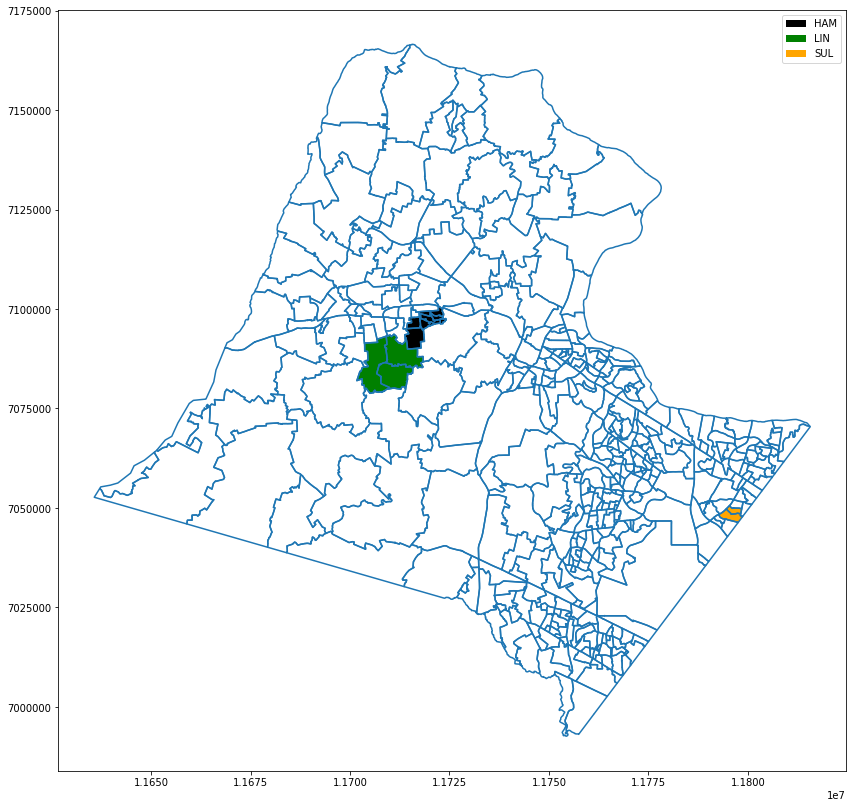

In [250]:
legend_handles = [Patch(facecolor='black', label='HAM'),
                Patch(facecolor='green', label='LIN'),
                Patch(facecolor='orange', label='SUL')]

ax = spas.boundary.plot(figsize=(15,14))
spas[spas['ELEM_CODE'] == 'HAM'].plot(ax=ax, color='black')
spas[spas['ELEM_CODE'] == 'LIN'].plot(ax=ax, color='green')
spas[spas['ELEM_CODE'] == 'SUL'].plot(ax=ax, color='orange')
# ax.legend
ax.legend(handles=legend_handles)

How do I fit in the gerrychain in all of this?

In [251]:
from numpy import concatenate
import pandas as pd

interested_districts = ["GUI", "SUL", "LIN", "FHR", "HAM", "KWC", "WAT", "EVE", "FDE"]
col_level_1 = concatenate([[i]*2 for i in interested_districts])
col_level_2 = ['W', 'NW'] * len(interested_districts)
cols_combined = zip(col_level_1, col_level_2)
col_index = pd.MultiIndex.from_tuples(cols_combined, names=["District", "Group"])
row_index = pd.Index(range(1,26))
combined_df = pd.DataFrame(data=data_array, index = row_index, columns = col_index)
combined_df 

District       GUI                 SUL                 LIN            \
Group            W        NW         W        NW         W        NW   
1         0.069565  0.930435  0.115502  0.884498  0.845178  0.154822   
2         0.133333  0.866667  0.111111  0.888889  0.826347  0.173653   
3         0.151102  0.848898  0.120053  0.879947  0.821138  0.178862   
4         0.147378  0.852622  0.113475  0.886525  0.877193  0.122807   
5         0.094523  0.905477  0.138075  0.861925  0.810345  0.189655   
6         0.156277  0.843723  0.109551  0.890449  0.700201  0.299799   
7         0.069565  0.930435  0.122396  0.877604  0.818662  0.181338   
8         0.069565  0.930435  0.127168  0.872832  0.862876  0.137124   
9         0.088210  0.911790  0.155251  0.844749  0.808696  0.191304   
10        0.151102  0.848898  0.128743  0.871257  0.753452  0.246548   
11        0.093470  0.906530  0.145995  0.854005  0.847953  0.152047   
12        0.093795  0.906205  0.138444  0.861556  0.909871  0.090129   
13        0.156983  0.843017  0.121951  0.878049  0.869718  0.130282   
14        0.080997  0.919003  0.127976  0.872024  0.859287  0.140713   
15        0.138175  0.861825  0.127714  0.872286  0.866803  0.133197   
16        0.076712  0.923288  0.111111  0.888889  0.817955  0.182045   
17        0.067669  0.932331  0.166102  0.833898  0.836923  0.163077   
18        0.151899  0.848101  0.113475  0.886525  0.732773  0.267227   
19        0.081044  0.918956  0.145995  0.854005  0.860215  0.139785   
20        0.089918  0.910082  0.138075  0.861925  0.770833  0.229167   
21        0.138475  0.861525  0.121951  0.878049  0.854015  0.145985   
22        0.162080  0.837920  0.109551  0.890449  0.741824  0.258176   
23        0.132832  0.867168  0.103491  0.896509  0.690184  0.309816   
24        0.136275  0.863725  0.171480  0.828520  0.820463  0.179537   
25        0.249480  0.750520  0.105546  0.894454  0.863636  0.136364   

District       FHR                 HAM                 KWC            \
Group            W        NW         W        NW         W        NW   
1         0.806452  0.193548  0.828283  0.171717  0.720430  0.279570   
2         0.835391  0.164609  0.804124  0.195876  0.821053  0.178947   
3         0.686591  0.313409  0.818182  0.181818  0.726027  0.273973   
4         0.877551  0.122449  0.824885  0.175115  0.788462  0.211538   
5         0.797900  0.202100  0.863636  0.136364  0.836364  0.163636   
6         0.810000  0.190000  0.856209  0.143791  0.914286  0.085714   
7         0.740541  0.259459  0.887500  0.112500  0.815951  0.184049   
8         0.819905  0.180095  0.824324  0.175676  0.831050  0.168950   
9         0.631696  0.368304  0.844660  0.155340  0.727273  0.272727   
10        0.724409  0.275591  0.787356  0.212644  0.784247  0.215753   
11        0.699029  0.300971  0.807843  0.192157  0.795987  0.204013   
12        0.728155  0.271845  0.785185  0.214815  0.870307  0.129693   
13        0.766129  0.233871  0.775362  0.224638  0.721649  0.278351   
14        0.756410  0.243590  0.859873  0.140127  0.768939  0.231061   
15        0.781977  0.218023  0.877133  0.122867  0.850299  0.149701   
16        0.734280  0.265720  0.897361  0.102639  0.761468  0.238532   
17        0.741240  0.258760  0.856000  0.144000  0.848315  0.151685   
18        0.684049  0.315951  0.859259  0.140741  0.842271  0.157729   
19        0.318828  0.681172  0.848889  0.151111  0.800000  0.200000   
20        0.688144  0.311856  0.861789  0.138211  0.728736  0.271264   
21        0.711744  0.288256  0.826531  0.173469  0.816568  0.183432   
22        0.710900  0.289100  0.783069  0.216931  0.913043  0.086957   
23        0.666667  0.333333  0.792857  0.207143  0.840278  0.159722   
24        0.642857  0.357143  0.862745  0.137255  0.822695  0.177305   
25        0.680851  0.319149  0.876712  0.123288  0.763240  0.236760   

District       WAT                 EVE                 FDE            
Group            W        NW         W 

Text(0, 0.5, 'Percentages')

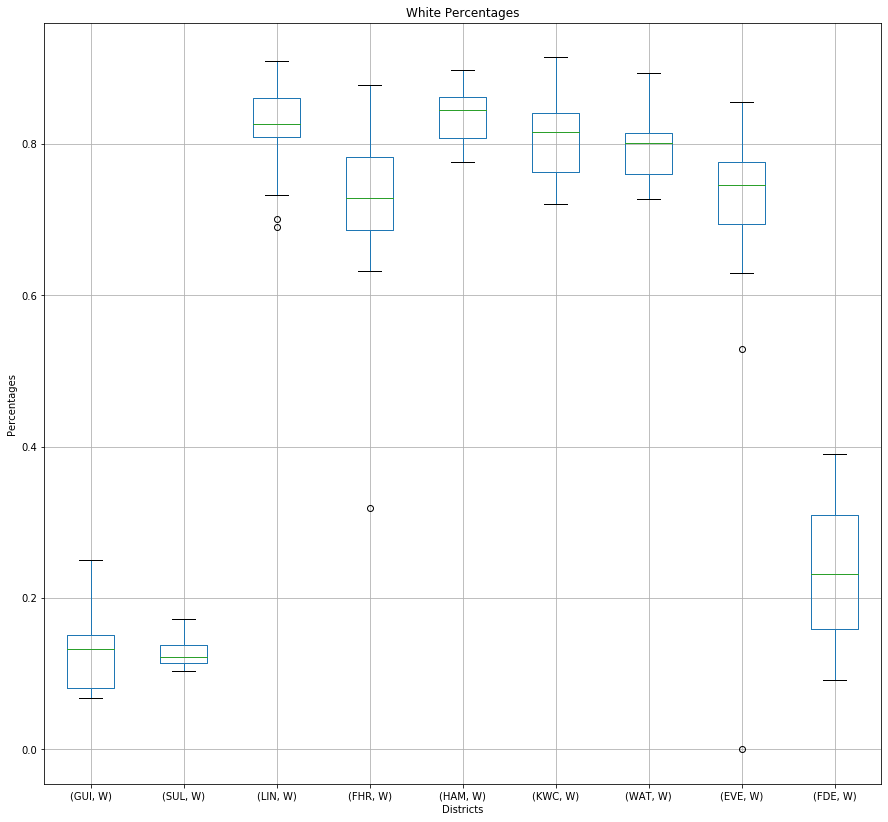

In [252]:
white_column=[('GUI','W'), ('SUL','W'), ('LIN','W'),  ('FHR','W'),  ('HAM','W'),  ('KWC','W'), ('WAT','W'), ('EVE','W'), ('FDE', 'W')]
ax, props = combined_df.boxplot(column=white_column, figsize=(15,14), return_type='both')
ax.set_title('White Percentages')
ax.set_xlabel('Districts')
ax.set_ylabel('Percentages')

Text(0, 0.5, 'Percentages')

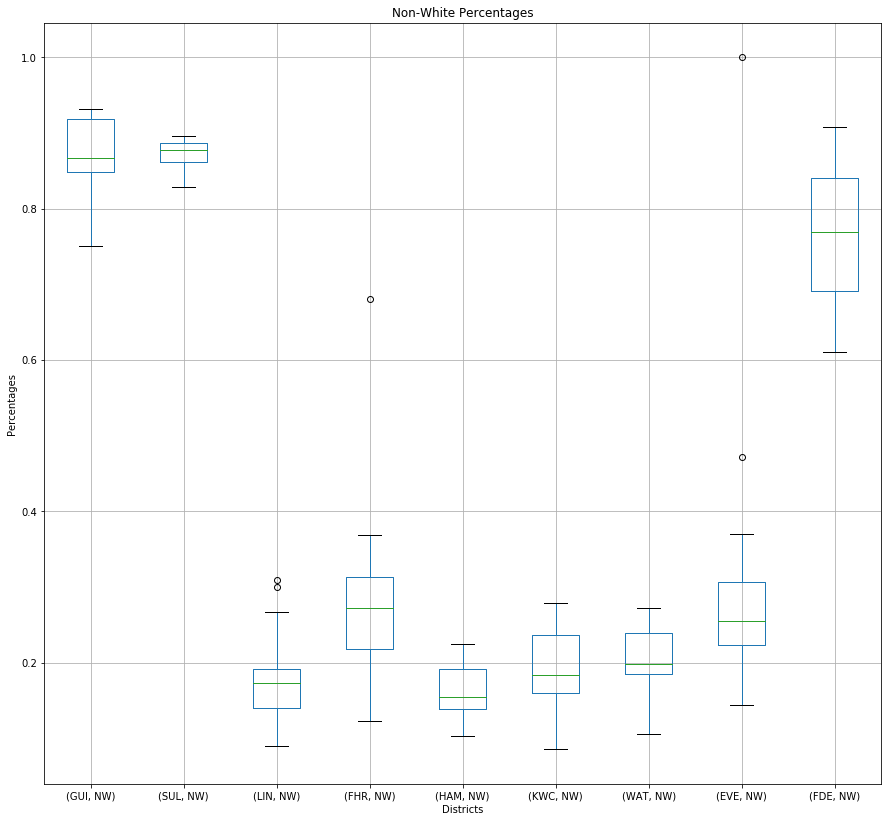

In [253]:
nonwhite_column=[('GUI','NW'), ('SUL','NW'), ('LIN','NW'),  ('FHR','NW'),  ('HAM','NW'),  ('KWC','NW'), ('WAT','NW'), ('EVE','NW'), ('FDE','NW')]
ax, props = combined_df.boxplot(column=nonwhite_column, figsize=(15,14), return_type='both')
ax.set_title('Non-White Percentages')
ax.set_xlabel('Districts')
ax.set_ylabel('Percentages')

Text(0, 0.5, 'Percentages')

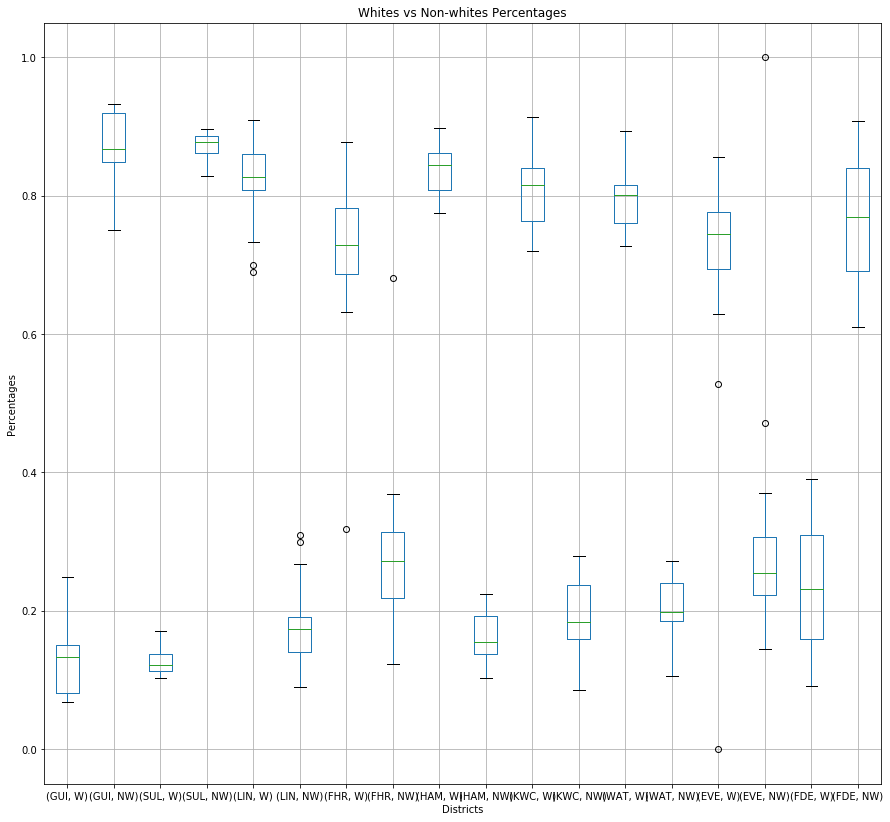

In [254]:
ax, props = combined_df.boxplot(figsize=(15,14), return_type='both')
ax.set_title('Whites vs Non-whites Percentages')
ax.set_xlabel('Districts')
ax.set_ylabel('Percentages')

In [255]:
segregated_entropy_sa1

,ELEM_POP_W,ELEM_POP_NW,ABS_DIFF,ENTROPY_IND
NEW_ELEM_CODE,,,,
FDE,0.091954,0.908046,0.816092,0.307036
GUI,0.069565,0.930435,0.860870,0.252513
SUL,0.115502,0.884498,0.768997,0.357865
